# Graphes et Nettoyage

## import des dataframes

In [3]:
import pandas as pd
import os
from tabulate import tabulate

# Chemin vers le répertoire contenant les fichiers CSV
directory_path = 'Database/'

# Liste des noms de fichiers CSV à importer
file_names = [
    'customers.csv', 'order_items.csv', 'order_pymts.csv', 
    'order_reviews.csv', 'orders.csv', 'products.csv', 
    'sellers.csv', 'translation.csv'
]

# Dictionnaire pour stocker les DataFrames
dataframes = {}

# Importer chaque fichier CSV et stocker dans le dictionnaire
import_results = []

for file_name in file_names:
    print(f"Importation du fichier : {file_name}")
    file_path = os.path.join(directory_path, file_name)
    df_name = file_name.replace('.csv', '')  # Nom de la clé du dictionnaire sans extension
    dataframes[df_name] = pd.read_csv(file_path)
    
    # Préparer les données pour le tableau
    df_head = dataframes[df_name].head(5)
    head_list = df_head.values.tolist()
    headers = df_head.columns.tolist()
    
    # Ajouter les résultats d'importation pour ce fichier
    import_results.append({
        'File': df_name,
        'Head': tabulate(head_list, headers=headers, tablefmt='pipe')
    })

# Afficher les résultats d'importation
print("\nRésultats d'importation des fichiers CSV :")
for result in import_results:
    print(f"\nFichier : {result['File']}")
    print(result['Head'])

# Accéder aux DataFrames importés
customers = dataframes['customers']
order_items = dataframes['order_items']
order_pymts = dataframes['order_pymts']
order_reviews = dataframes['order_reviews']
orders = dataframes['orders']
products = dataframes['products']
sellers = dataframes['sellers']
translation = dataframes['translation']


Importation du fichier : customers.csv
Importation du fichier : order_items.csv
Importation du fichier : order_pymts.csv
Importation du fichier : order_reviews.csv
Importation du fichier : orders.csv
Importation du fichier : products.csv
Importation du fichier : sellers.csv
Importation du fichier : translation.csv

Résultats d'importation des fichiers CSV :

Fichier : customers
|   index | customer_id                      | customer_unique_id               |   customer_zip_code_prefix | customer_city         | customer_state   |
|--------:|:---------------------------------|:---------------------------------|---------------------------:|:----------------------|:-----------------|
|       0 | 06b8999e2fba1a1fbc88172c00ba8bc7 | 861eff4711a542e4b93843c6dd7febb0 |                      14409 | franca                | SP               |
|       1 | 18955e83d337fd6b2def6b18a428ac77 | 290c77bc529b7ac935b93aa66c333dc3 |                       9790 | sao bernardo do campo | SP               |
|  

## Courbe du nombre de commandes en fonction du temps

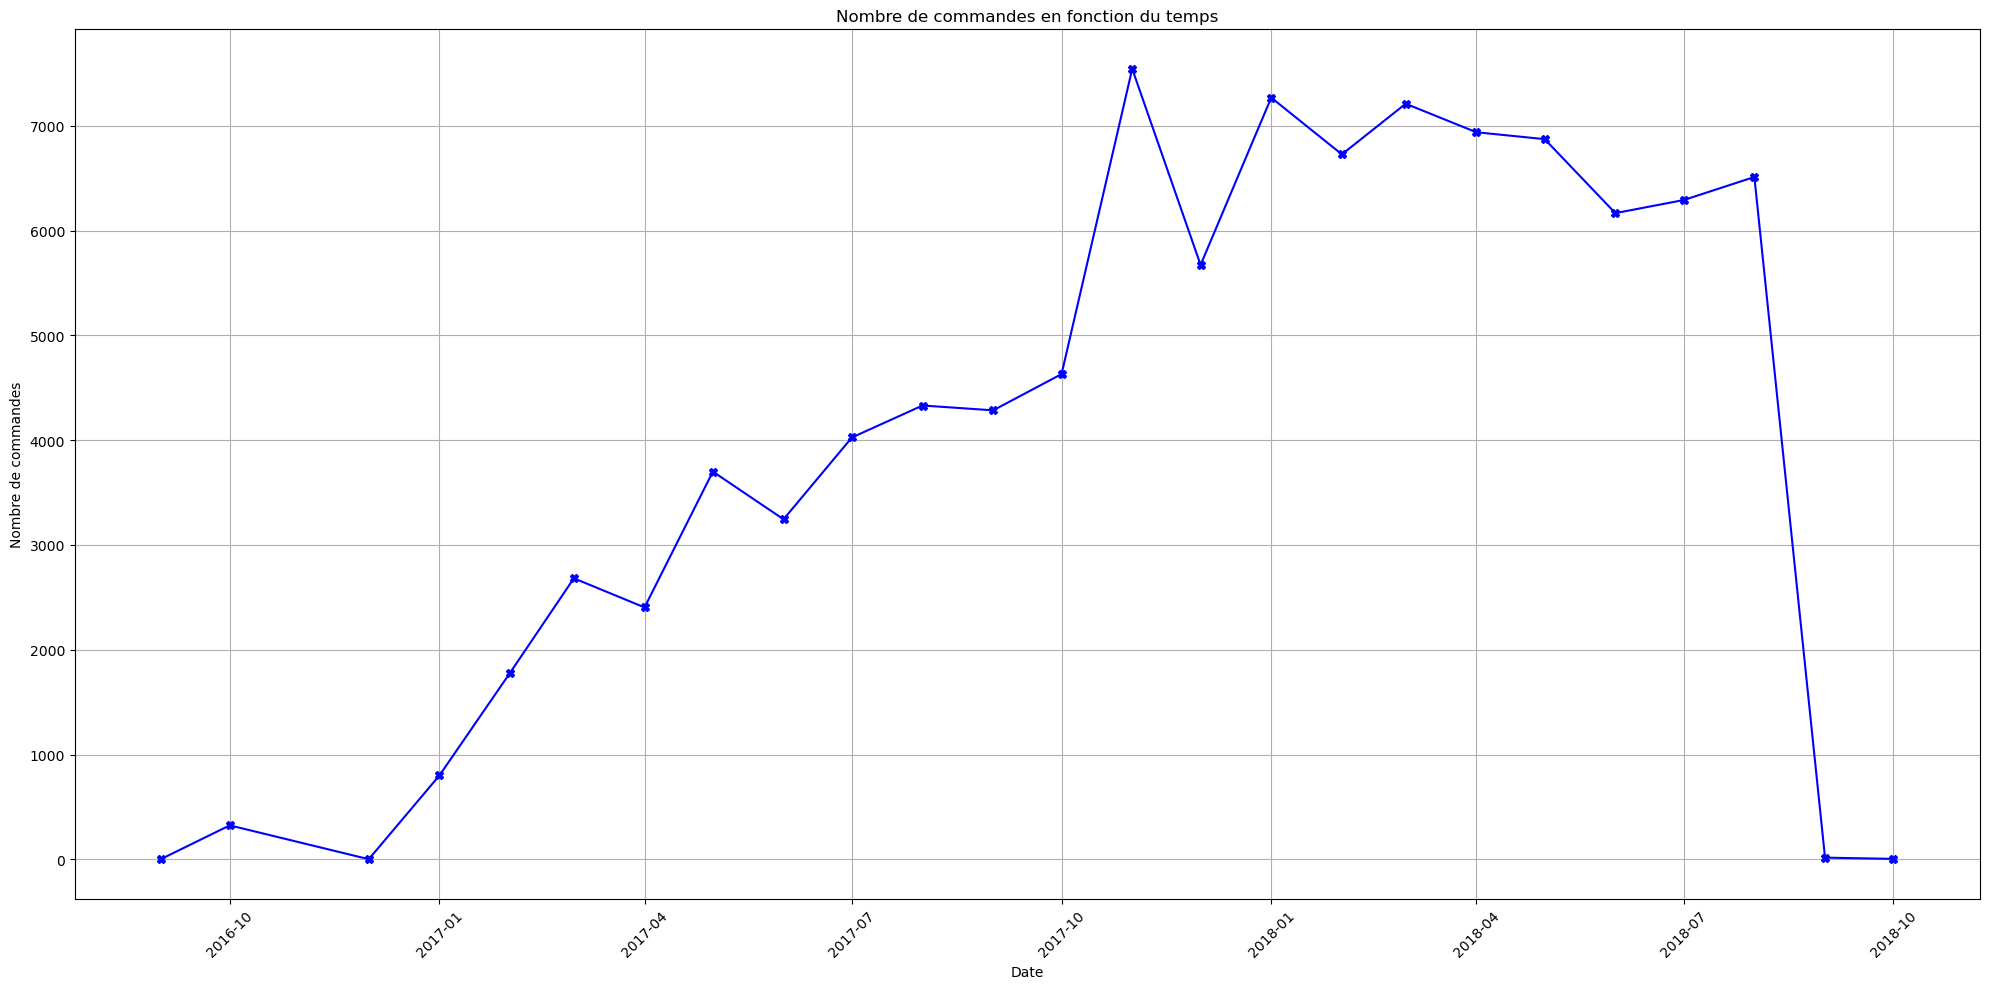

In [5]:
import matplotlib.pyplot as plt

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Grouper les commandes par date (par mois, ou autre période si nécessaire)
order_counts = orders.groupby(
    orders['order_purchase_timestamp'].dt.to_period('M')
).size()  # Comptage par mois

# Convertir l'index en datetime pour le tracé
order_counts.index = order_counts.index.to_timestamp()

# Tracer la courbe
plt.figure(figsize=(20, 10))
plt.plot(
    order_counts.index, order_counts.values, 
    marker='X', linestyle='-', color='b'
)
plt.title('Nombre de commandes en fonction du temps')
plt.xlabel('Date')
plt.ylabel('Nombre de commandes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Barplot répartition des moyens de paiements

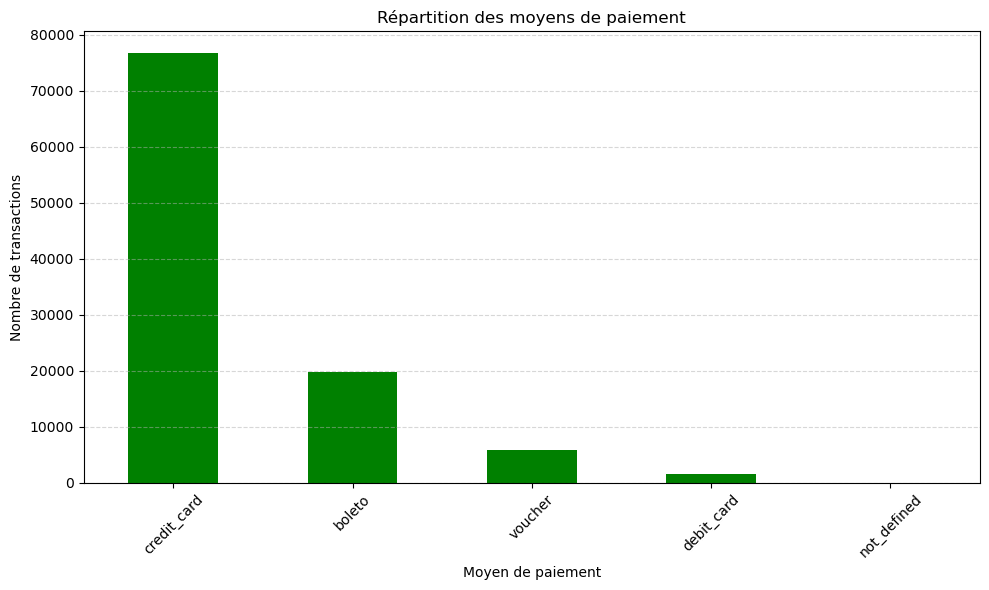

In [7]:
if 'payment_type' in order_pymts.columns:
    # Compter les occurrences de chaque moyen de paiement
    payment_counts = order_pymts['payment_type'].value_counts()
    
    # Tracer le barplot
    plt.figure(figsize=(10, 6))
    payment_counts.plot(kind='bar', color='green')
    plt.title('Répartition des moyens de paiement')
    plt.xlabel('Moyen de paiement')
    plt.ylabel('Nombre de transactions')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("La colonne 'payment_method' n'existe pas dans le DataFrame.")


## Barplot répartition des statuts de commande

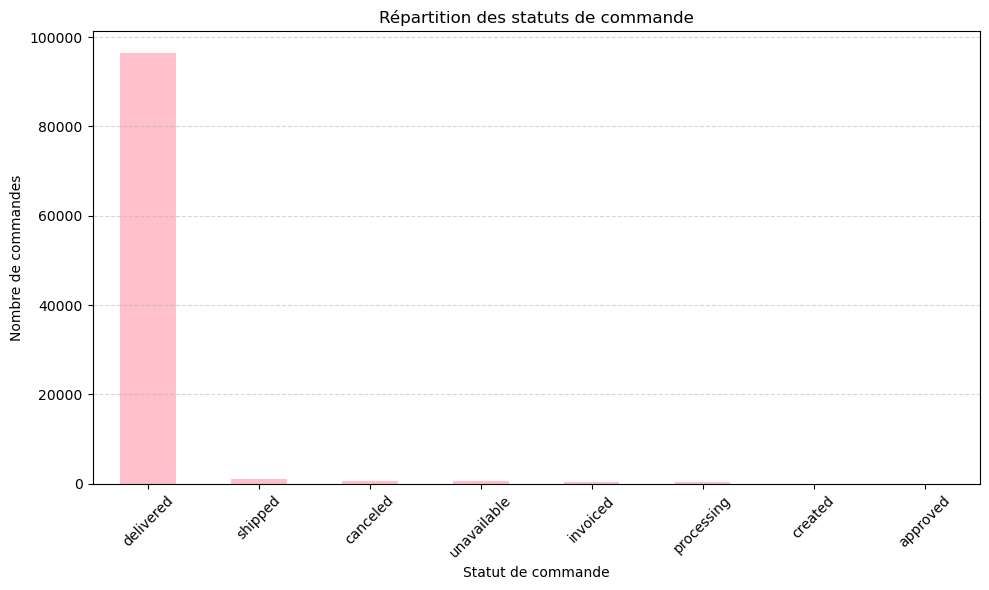

In [9]:
status_column = 'order_status'
if status_column in orders.columns:
    # Compter les occurrences de chaque statut de commande
    status_counts = orders[status_column].value_counts()
    
    # Tracer le barplot
    plt.figure(figsize=(10, 6))
    status_counts.plot(kind='bar', color='pink')
    plt.title('Répartition des statuts de commande')
    plt.xlabel('Statut de commande')
    plt.ylabel('Nombre de commandes')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print(f"La colonne '{status_column}' n'existe pas dans le DataFrame.")


## Histogramme nombre de paiements

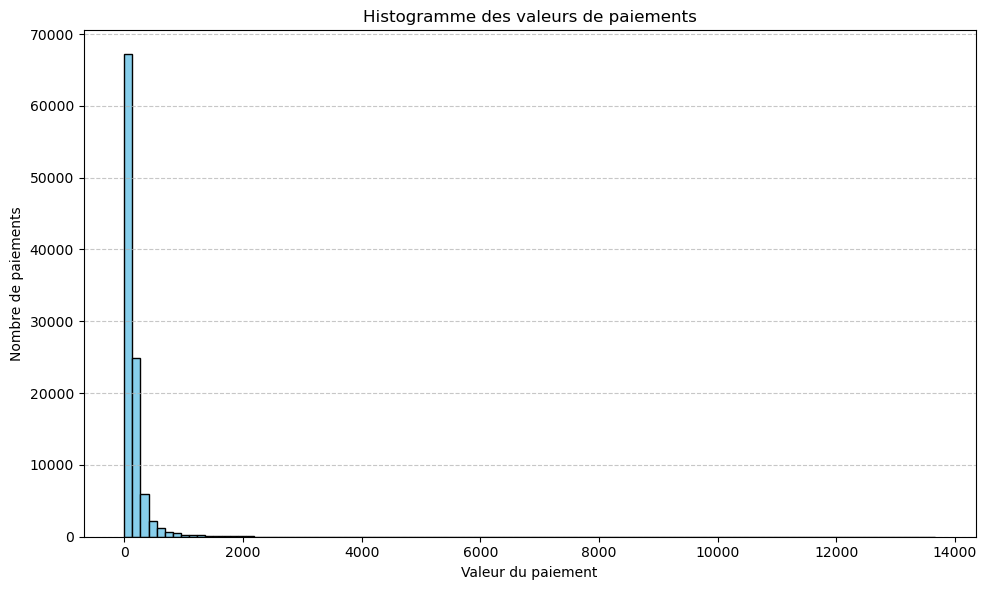

In [11]:
payment_value_column = 'payment_value'

if payment_value_column in order_pymts.columns:
    # Créer l'histogramme des valeurs de paiements
    plt.figure(figsize=(10, 6))
    plt.hist(
        order_pymts[payment_value_column], bins=100, 
        color='skyblue', edgecolor='black'
    )
    plt.title('Histogramme des valeurs de paiements')
    plt.xlabel('Valeur du paiement')
    plt.ylabel('Nombre de paiements')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print(f"La colonne '{payment_value_column}' n'existe pas dans le DataFrame.")


## Histogramme montant des commandes

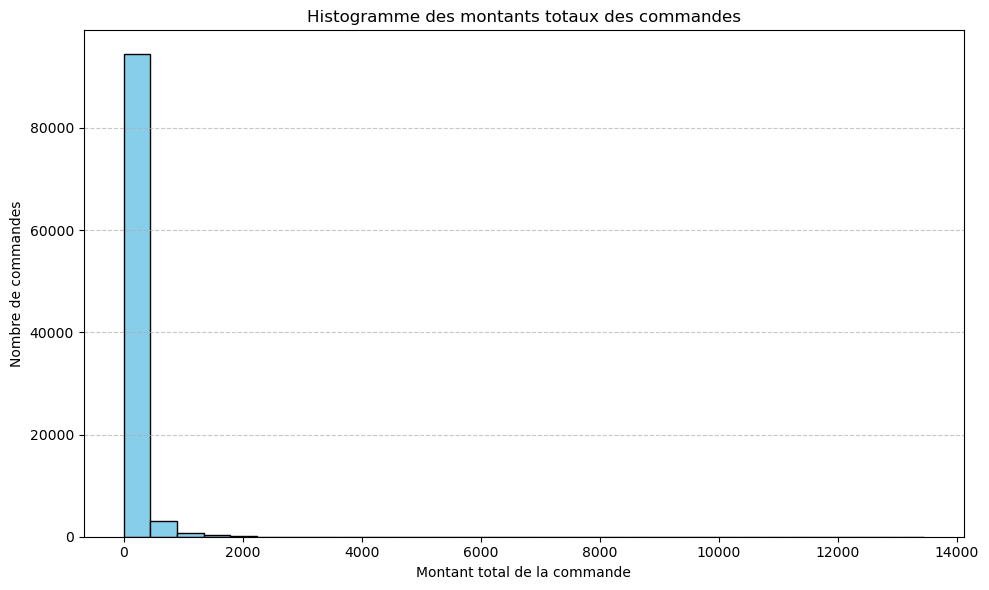

In [13]:
price_column = 'price'

if price_column in order_items.columns:
    # Calculer le montant total de chaque commande (en ne tenant compte que du prix)
    total_order_amounts = order_items.groupby('order_id')[price_column].sum()
    
    # Créer l'histogramme des montants totaux des commandes
    plt.figure(figsize=(10, 6))
    plt.hist(
        total_order_amounts.dropna(), bins=30, 
        color='skyblue', edgecolor='black'
    )
    plt.title('Histogramme des montants totaux des commandes')
    plt.xlabel('Montant total de la commande')
    plt.ylabel('Nombre de commandes')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print(f"La colonne '{price_column}' n'existe pas dans le DataFrame.")


## Nettoyage

### Commandes non livrées

In [16]:
if 'order_delivered_customer_date' in orders.columns:
    # Compter les commandes non livrées avant suppression
    non_delivered_orders_count_before = orders['order_delivered_customer_date'].isna().sum()
    print(f"Nombre de commandes non livrées avant suppression : {non_delivered_orders_count_before}")

    # Supprimer les commandes non livrées
    orders_delivered = orders.dropna(subset=['order_delivered_customer_date'])
    
    # Recalculer le nombre de commandes non livrées après suppression
    non_delivered_orders_count_after = orders_delivered['order_delivered_customer_date'].isna().sum()
    print(f"Nombre de commandes non livrées après suppression : {non_delivered_orders_count_after}")

    # Afficher le nombre total de commandes après suppression
    print(f"Nombre total de commandes après suppression : {orders_delivered.shape[0]}")
else:
    print("La colonne 'order_delivered_customer_date' n'existe pas dans le DataFrame.")


Nombre de commandes non livrées avant suppression : 2965
Nombre de commandes non livrées après suppression : 0
Nombre total de commandes après suppression : 96476


### Clients sans commande

In [18]:
# Calculer le nombre de clients sans commande après suppression des commandes non livrées
if 'customer_id' in customers.columns and 'customer_id' in orders_delivered.columns:
    # Trouver les clients avec au moins une commande dans le DataFrame filtré
    clients_with_orders = orders_delivered['customer_id'].unique()
    
    # Trouver tous les clients
    all_customers = customers['customer_id'].unique()
    
    # Trouver les clients sans commande
    clients_without_orders = set(all_customers) - set(clients_with_orders)
    
    clients_without_orders_count_after = len(clients_without_orders)
    print(f"Nombre de clients sans commande après suppression : {clients_without_orders_count_after}")

    # Nombre total de clients avant suppression
    total_customers_before = customers.shape[0]
    print(f"Nombre total de clients avant suppression des clients sans commande : {total_customers_before}")

    # Supprimer les clients sans commande du DataFrame customers
    customers_cleaned = customers[~customers['customer_id'].isin(clients_without_orders)]
    
    # Nombre total de clients après suppression
    total_customers_after = customers_cleaned.shape[0]
    print(f"Nombre total de clients après suppression des clients sans commande : {total_customers_after}")
    
    # Nombre de clients supprimés
    clients_removed = total_customers_before - total_customers_after
    print(f"Nombre de clients supprimés : {clients_removed}")
else:
    print("Les colonnes 'customer_id' dans 'customers' ou 'orders' n'existent pas dans le DataFrame.")


Nombre de clients sans commande après suppression : 2965
Nombre total de clients avant suppression des clients sans commande : 99441
Nombre total de clients après suppression des clients sans commande : 96476
Nombre de clients supprimés : 2965


# RFM

## Création des variables

In [21]:
import pandas as pd

# Assurez-vous que 'order_purchase_timestamp' est au format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# 1. Simuler la date d'aujourd'hui
simulated_today = pd.Timestamp('2018-10-18 17:30:18')
print(f"Date simulée d'aujourd'hui : {simulated_today}")

# 2. Date de la dernière commande dans le dataset
last_order_date = orders['order_purchase_timestamp'].max()
print(f"Date de la dernière commande : {last_order_date}")

# 3. Récence : Calculer le nombre de jours depuis la dernière commande pour chaque client
recency_df = orders.groupby('customer_id').agg(
    last_purchase=('order_purchase_timestamp', 'max')
).reset_index()

# 4. Calculer la récence pour chaque client en utilisant la date simulée
recency_df['recency'] = (simulated_today - recency_df['last_purchase']).dt.days

# Afficher les dates de la dernière commande pour les clients avec une récence faible
print("\nDates de la dernière commande pour les clients avec récence faible :")
print(recency_df.sort_values(by='last_purchase', ascending=False).head())

# 5. Fréquence : Nombre total de commandes par client
frequency_df = orders.groupby('customer_id').size().reset_index(name='frequency')

# 6. Montant : Calculer le montant total dépensé par client à partir de la table order_items (prix * quantité)
monetary_df = order_items.groupby('order_id').agg(order_value=('price', 'sum')).reset_index()
monetary_df = pd.merge(orders[['order_id', 'customer_id']], monetary_df, on='order_id')
monetary_df = monetary_df.groupby('customer_id').agg(monetary=('order_value', 'sum')).reset_index()

# 7. Fusionner les variables RFM en une seule table
rfm_df = pd.merge(recency_df[['customer_id', 'recency']], frequency_df, on='customer_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_id')

# 8. Trier par récence (les plus récentes commandes en premier)
rfm_sorted_by_recency = rfm_df.sort_values(by='recency')

# Afficher les clients avec la récence la plus faible
print("\nClients ayant la récence la plus faible (commandes les plus récentes) :")
print(rfm_sorted_by_recency.head())


Date simulée d'aujourd'hui : 2018-10-18 17:30:18
Date de la dernière commande : 2018-10-17 17:30:18

Dates de la dernière commande pour les clients avec récence faible :
                            customer_id       last_purchase  recency
63970  a4b417188addbc05b26b72d5e44837a1 2018-10-17 17:30:18        1
51713  856336203359aa6a61bf3826f7d84c49 2018-10-16 20:16:02        1
29531  4c2ec60c29d10c34bd49cb88aa85cfc4 2018-10-03 18:55:29       14
74611  bf6181a85bbb4115736c0a8db1a53be3 2018-10-01 15:30:09       17
15595  2823ffda607a2316375088e0d00005ec 2018-09-29 09:13:03       19

Clients ayant la récence la plus faible (commandes les plus récentes) :
                            customer_id  recency  frequency  monetary
29063  4b7decb9b58e2569548b8b4c8e20e8d7       45          1    145.00
28365  49a6ae8a95c6a78d90945b983ab1ecfc       50          1    103.69
52937  898b7fee99c4e42170ab69ba59be0a8b       50          1     84.99
4331   0b5f6687d659478f1747caed607c4ec5       50          1    

## Scoring

In [23]:
import pandas as pd

# Assurez-vous que 'order_purchase_timestamp' est au format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# 1. Simuler la date d'aujourd'hui (18 octobre 2018)
simulated_today = pd.Timestamp('2018-10-18 17:30:18')
print(f"Date simulée d'aujourd'hui : {simulated_today}")

# 2. Date de la dernière commande dans le dataset
last_order_date = orders['order_purchase_timestamp'].max()
print(f"Date de la dernière commande : {last_order_date}")

# 3. Récence : Calculer le nombre de jours depuis la dernière commande pour chaque client
recency_df = orders.groupby('customer_id').agg(
    last_purchase=('order_purchase_timestamp', 'max')
).reset_index()
recency_df['recency'] = (simulated_today - recency_df['last_purchase']).dt.days

# 4. Fréquence : Nombre total de commandes par client
frequency_df = orders.groupby('customer_id').size().reset_index(name='frequency')

# 5. Montant : Calculer le montant total dépensé par client à partir de la table order_items (prix * quantité)
monetary_df = order_items.groupby('order_id').agg(order_value=('price', 'sum')).reset_index()
monetary_df = pd.merge(orders[['order_id', 'customer_id']], monetary_df, on='order_id')
monetary_df = monetary_df.groupby('customer_id').agg(monetary=('order_value', 'sum')).reset_index()

# 6. Fusionner les variables RFM en une seule table
rfm_df = pd.merge(recency_df[['customer_id', 'recency']], frequency_df, on='customer_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_id')

# 7. Calculer le score RFM
def score_rfm(df):
    df['recency_score'] = pd.qcut(df['recency'], 4, labels=False, duplicates='drop').fillna(-1)
    df['recency_score'] = 5 - df['recency_score']  # Inverser le score de récence

    df['frequency_score'] = pd.qcut(df['frequency'], 4, labels=False, duplicates='drop').fillna(-1)
    df['frequency_score'] = 1 + df['frequency_score']  # Plus la fréquence est basse, plus le score est bas

    df['monetary_score'] = pd.qcut(df['monetary'], 4, labels=False, duplicates='drop').fillna(-1)
    df['monetary_score'] = 1 + df['monetary_score']  # Plus le montant est élevé, plus le score est élevé

    # Concaténer les scores dans le format "recency_score-frequency_score-monetary_score"
    df['rfm_score'] = (df['recency_score'].astype(int).astype(str) + '-' +
                       df['frequency_score'].astype(int).astype(str) + '-' +
                       df['monetary_score'].astype(int).astype(str))
    return df

# Appliquer la fonction de scoring
rfm_df = score_rfm(rfm_df)

# Afficher les clients avec leurs scores RFM
print("\nClients avec leurs scores RFM :")
print(rfm_df[['customer_id', 'recency', 'frequency', 'monetary', 'rfm_score']].head())


Date simulée d'aujourd'hui : 2018-10-18 17:30:18
Date de la dernière commande : 2018-10-17 17:30:18

Clients avec leurs scores RFM :
                        customer_id  recency  frequency  monetary rfm_score
0  00012a2ce6f8dcda20d059ce98491703      338          1     89.80     3-0-3
1  000161a058600d5901f007fab4c27140      459          1     54.90     2-0-2
2  0001fd6190edaaf884bcaf3d49edf079      597          1    179.99     2-0-4
3  0002414f95344307404f0ace7a26f1d5      428          1    149.90     2-0-3
4  000379cdec625522490c315e70c7a9fb      199          1     93.00     4-0-3


## Graphe

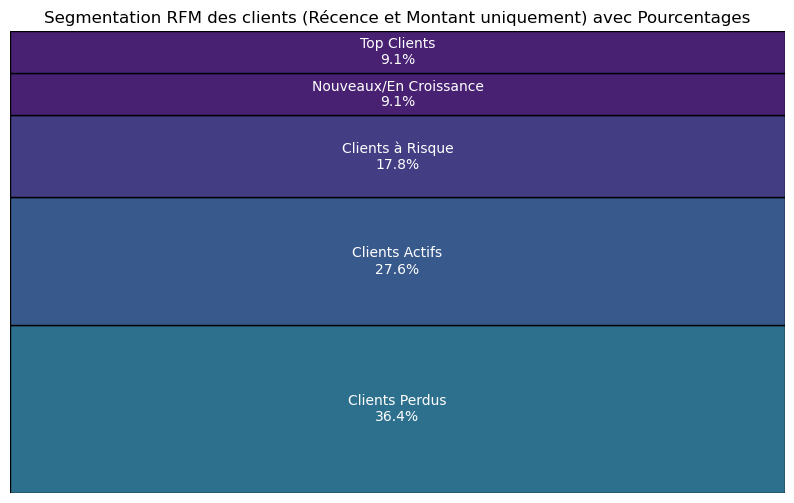

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Assurez-vous que 'order_purchase_timestamp' est au format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# 1. Simuler la date d'aujourd'hui (18 octobre 2018)
simulated_today = pd.Timestamp('2018-10-18 17:30:18')

# 2. Récence : Calculer le nombre de jours depuis la dernière commande pour chaque client
recency_df = orders.groupby('customer_id').agg(
    last_purchase=('order_purchase_timestamp', 'max')
).reset_index()
recency_df['recency'] = (simulated_today - recency_df['last_purchase']).dt.days

# 3. Fréquence : Nombre total de commandes par client
frequency_df = orders.groupby('customer_id').size().reset_index(name='frequency')

# 4. Montant : Calculer le montant total dépensé par client
monetary_df = order_items.groupby('order_id').agg(order_value=('price', 'sum')).reset_index()
monetary_df = pd.merge(orders[['order_id', 'customer_id']], monetary_df, on='order_id')
monetary_df = monetary_df.groupby('customer_id').agg(monetary=('order_value', 'sum')).reset_index()

# 5. Fusionner les variables RFM en une seule table
rfm_df = pd.merge(recency_df[['customer_id', 'recency']], frequency_df, on='customer_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_id')

# 6. Calculer le score RFM sans la fréquence
def score_rfm(df):
    df['recency_score'] = pd.qcut(df['recency'], 4, labels=False, duplicates='drop').fillna(-1)
    df['recency_score'] = 5 - df['recency_score']  # Plus la récence est faible, plus le score est élevé

    df['monetary_score'] = pd.qcut(df['monetary'], 4, labels=False, duplicates='drop').fillna(-1)
    df['monetary_score'] = 1 + df['monetary_score']  # Plus le montant est élevé, plus le score est élevé

    # Concaténer les scores dans le format "recency_score-monetary_score"
    df['rfm_score'] = (df['recency_score'].astype(int).astype(str) + '-' +
                       df['monetary_score'].astype(int).astype(str))
    return df

# Appliquer la fonction de scoring
rfm_df = score_rfm(rfm_df)

# 7. Segmenter les clients en fonction de la récence et du montant monétaire (sans fréquence)
def segment_rfm(df):
    conditions = [
        (df['recency_score'] == 5) & (df['monetary_score'] >= 4),  # Clients récents et dépensant beaucoup
        (df['recency_score'] >= 3) & (df['monetary_score'] == 3),  # Clients actifs et dépensant bien
        (df['recency_score'] <= 2) & (df['monetary_score'] >= 3),  # Clients à risque mais dépensant beaucoup
        (df['recency_score'] >= 1) & (df['monetary_score'] == 2),  # Clients perdus et dépensant peu
        (df['recency_score'] == 5) & (df['monetary_score'] <= 2)   # Nouveaux clients ou en croissance
    ]
    choices = [
        'Top Clients', 'Clients Actifs', 'Clients à Risque',
        'Clients Perdus', 'Nouveaux/En Croissance'
    ]
    df['segment'] = np.select(conditions, choices, default=None)  # Retirer la catégorie "Autres"
    df = df.dropna(subset=['segment'])  # Supprimer les lignes qui ne correspondent à aucun segment
    return df

rfm_df = segment_rfm(rfm_df)

# 8. Visualiser les segments via un treemap avec Matplotlib (sans squarify)
segment_counts = rfm_df['segment'].value_counts()

# Fonction pour dessiner des rectangles pour le treemap avec % dans les labels
def draw_treemap(ax, labels, sizes):
    total_size = sum(sizes)
    x, y = 0, 0
    width = 1.0
    for label, size in zip(labels, sizes):
        height = size / total_size
        percentage = size / total_size * 100  # Calcul du pourcentage
        rect = Rectangle((x, y), width, height, edgecolor='black', 
                         facecolor=plt.cm.viridis(size / total_size))
        ax.add_patch(rect)
        ax.text(x + 0.5 * width, y + 0.5 * height,
                f"{label}\n{percentage:.1f}%", ha='center', va='center',
                fontsize=10, color='white')
        y += height

# Dessiner le treemap
fig, ax = plt.subplots(figsize=(10, 6))
draw_treemap(ax, segment_counts.index, segment_counts.values)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title("Segmentation RFM des clients (Récence et Montant uniquement) avec Pourcentages")
ax.set_axis_off()
plt.show()


## Nouvelles variables

In [27]:
import pandas as pd

# Assurez-vous que 'order_purchase_timestamp' et 'order_delivered_customer_date' sont au format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# 1. Simuler la date d'aujourd'hui (18 octobre 2018)
simulated_today = pd.Timestamp('2018-10-18 17:30:18')
print(f"Date simulée d'aujourd'hui : {simulated_today}")

# 2. Date de la dernière commande dans le dataset
last_order_date = orders['order_purchase_timestamp'].max()
print(f"Date de la dernière commande : {last_order_date}")

# 3. Récence : Calculer le nombre de jours depuis la dernière commande pour chaque client
recency_df = orders.groupby('customer_id').agg(
    last_purchase=('order_purchase_timestamp', 'max')
).reset_index()
recency_df['recency'] = (simulated_today - recency_df['last_purchase']).dt.days

# 4. Montant : Calculer le montant total dépensé par client à partir de la table order_items (prix * quantité)
monetary_df = order_items.groupby('order_id').agg(order_value=('price', 'sum')).reset_index()
monetary_df = pd.merge(orders[['order_id', 'customer_id']], monetary_df, on='order_id')
monetary_df = monetary_df.groupby('customer_id').agg(monetary=('order_value', 'sum')).reset_index()

# 5. Score des avis : Calculer le score moyen des avis par client
review_score_df = order_reviews.groupby('order_id').agg(
    avg_review_score=('review_score', 'mean')
).reset_index()
review_score_df = pd.merge(orders[['order_id', 'customer_id']], review_score_df, on='order_id')
review_score_df = review_score_df.groupby('customer_id').agg(
    avg_review_score=('avg_review_score', 'mean')
).reset_index()

# 6. Délai de livraison : Calculer le délai de livraison moyen par client (en excluant les valeurs manquantes)
delivery_delay_df = orders.copy()
delivery_delay_df['delivery_delay'] = (
    orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']
).dt.days
delivery_delay_df = delivery_delay_df[~delivery_delay_df['delivery_delay'].isna()]  # Supprimer les valeurs manquantes
delivery_delay_df = delivery_delay_df.groupby('customer_id').agg(
    avg_delivery_delay=('delivery_delay', 'mean')
).reset_index()

# 7. Nombre d'articles : Calculer le nombre total d'articles commandés par client
items_df = order_items.groupby('order_id').agg(total_items=('order_item_id', 'count')).reset_index()
items_df = pd.merge(orders[['order_id', 'customer_id']], items_df, on='order_id')
items_df = items_df.groupby('customer_id').agg(total_items=('total_items', 'sum')).reset_index()

# 8. Fusionner les variables RFM et les nouvelles variables en une seule table
rfm_df = pd.merge(recency_df[['customer_id', 'recency']], monetary_df, on='customer_id')
rfm_df = pd.merge(rfm_df, review_score_df, on='customer_id')
rfm_df = pd.merge(rfm_df, delivery_delay_df, on='customer_id', how='left')  # Utiliser une jointure gauche pour conserver tous les clients
rfm_df = pd.merge(rfm_df, items_df, on='customer_id')

# 9. Calculer le score RFM avec les nouvelles variables (sans la fréquence)
def score_rfm(df):
    df['recency_score'] = pd.qcut(df['recency'], 4, labels=False, duplicates='drop').fillna(-1)
    df['recency_score'] = 5 - df['recency_score']  # Inverser le score de récence

    df['monetary_score'] = pd.qcut(df['monetary'], 4, labels=False, duplicates='drop').fillna(-1)
    df['monetary_score'] = 1 + df['monetary_score']  # Plus le montant est élevé, plus le score est élevé

    df['review_score'] = pd.qcut(df['avg_review_score'], 4, labels=False, duplicates='drop').fillna(-1)
    df['review_score'] = 1 + df['review_score']  # Plus le score d'avis est élevé, plus le score est élevé

    df['delivery_score'] = pd.qcut(df['avg_delivery_delay'], 4, labels=False, duplicates='drop').fillna(-1)
    df['delivery_score'] = 5 - df['delivery_score']  # Moins le délai de livraison est long, plus le score est élevé
    
    df['items_score'] = pd.qcut(df['total_items'], 4, labels=False, duplicates='drop').fillna(-1)
    df['items_score'] = 1 + df['items_score']  # Plus il y a d'articles commandés, plus le score est élevé

    # Concaténer les scores dans le format "recency_score-monetary_score-review_score-delivery_score-items_score"
    df['rfm_score'] = (
        df['recency_score'].astype(int).astype(str) + '-' +
        df['monetary_score'].astype(int).astype(str) + '-' +
        df['review_score'].astype(int).astype(str) + '-' +
        df['delivery_score'].astype(int).astype(str) + '-' +
        df['items_score'].astype(int).astype(str)
    )
    return df

# Appliquer la fonction de scoring
rfm_df = score_rfm(rfm_df)

# Afficher les clients avec leurs scores RFM et nouvelles variables
print("\nClients avec leurs scores RFM et nouvelles variables :")
print(rfm_df[['customer_id', 'recency', 'monetary', 'avg_review_score', 'avg_delivery_delay', 'total_items', 'rfm_score']].head())


Date simulée d'aujourd'hui : 2018-10-18 17:30:18
Date de la dernière commande : 2018-10-17 17:30:18

Clients avec leurs scores RFM et nouvelles variables :
                        customer_id  recency  monetary  avg_review_score  \
0  00012a2ce6f8dcda20d059ce98491703      338     89.80               1.0   
1  000161a058600d5901f007fab4c27140      459     54.90               4.0   
2  0001fd6190edaaf884bcaf3d49edf079      597    179.99               5.0   
3  0002414f95344307404f0ace7a26f1d5      428    149.90               5.0   
4  000379cdec625522490c315e70c7a9fb      199     93.00               4.0   

   avg_delivery_delay  total_items  rfm_score  
0                13.0            1  3-3-1-3-1  
1                 9.0            1  2-2-1-4-1  
2                 5.0            1  2-4-2-5-1  
3                28.0            1  2-3-2-2-1  
4                11.0            1  4-3-1-3-1  


## KMeans/CAH/DBscan

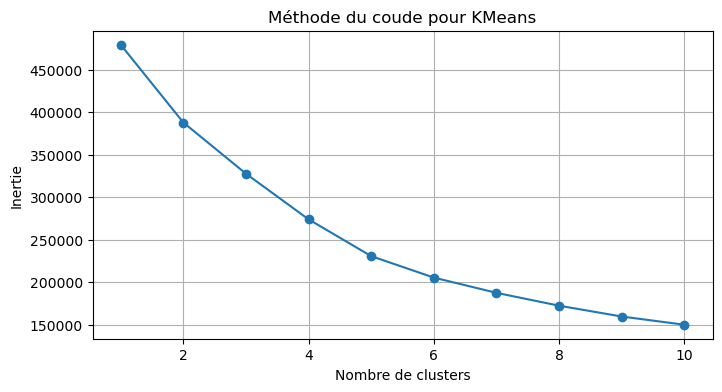

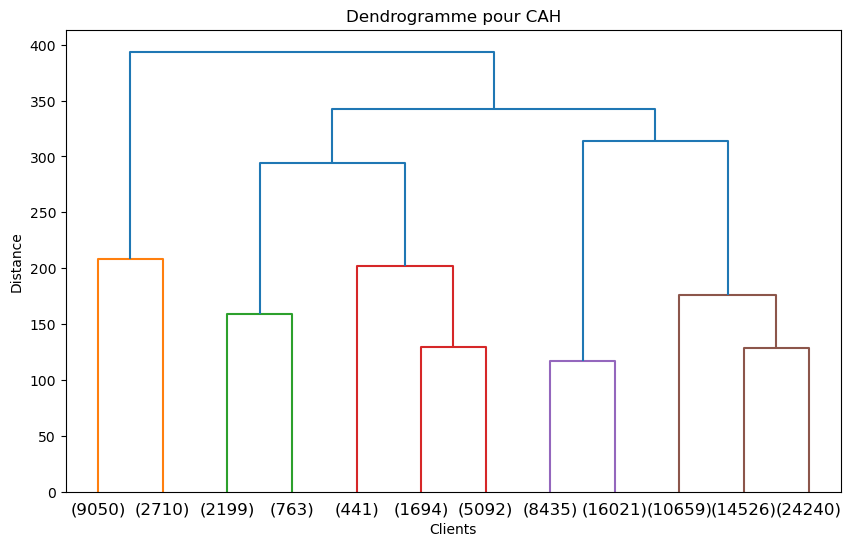

                        customer_id  kmeans_cluster  cah_cluster  \
0  00012a2ce6f8dcda20d059ce98491703             0.0          1.0   
1  000161a058600d5901f007fab4c27140             2.0          3.0   
2  0001fd6190edaaf884bcaf3d49edf079             2.0          3.0   
3  0002414f95344307404f0ace7a26f1d5             2.0          3.0   
4  000379cdec625522490c315e70c7a9fb             1.0          2.0   

   dbscan_cluster  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  


In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# 1. Préparation et normalisation des données
X = rfm_df[['recency', 'monetary', 'avg_review_score', 'avg_delivery_delay', 'total_items']]

# Vérifier et gérer les valeurs manquantes
X = X.dropna()  # Supprime les lignes avec des valeurs manquantes
# X = X.fillna(X.mean())  # Alternativement, vous pouvez imputer les NaN par la moyenne

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Clustering avec KMeans
# Trouver le nombre optimal de clusters avec la méthode du coude
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)  # Explicitement définir n_init à 10
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Méthode du coude pour KMeans")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()

# Appliquer KMeans avec un nombre de clusters choisi
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)  # Explicitement définir n_init à 10
rfm_df.loc[X.index, 'kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# 3. Clustering avec CAH (Dendrogramme)
plt.figure(figsize=(10, 6))

# Dendrogramme avec un maximum de 10 clusters
dendrogram = sch.dendrogram(
    sch.linkage(X_scaled, method='ward'),
    truncate_mode='lastp',  # Limiter le nombre de clusters affichés
    p=12,                   # Nombre maximum de clusters à afficher
)

plt.title('Dendrogramme pour CAH')
plt.xlabel('Clients')
plt.ylabel('Distance')
plt.show()

# Appliquer CAH avec découpage en clusters (par exemple : 4 clusters)
cah = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
rfm_df.loc[X.index, 'cah_cluster'] = cah.fit_predict(X_scaled)

# 4. Clustering avec DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm_df.loc[X.index, 'dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Afficher un aperçu des clusters
print(rfm_df[['customer_id', 'kmeans_cluster', 'cah_cluster', 'dbscan_cluster']].head())


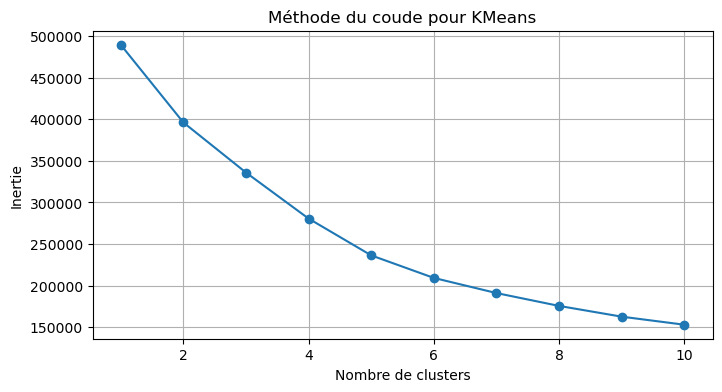

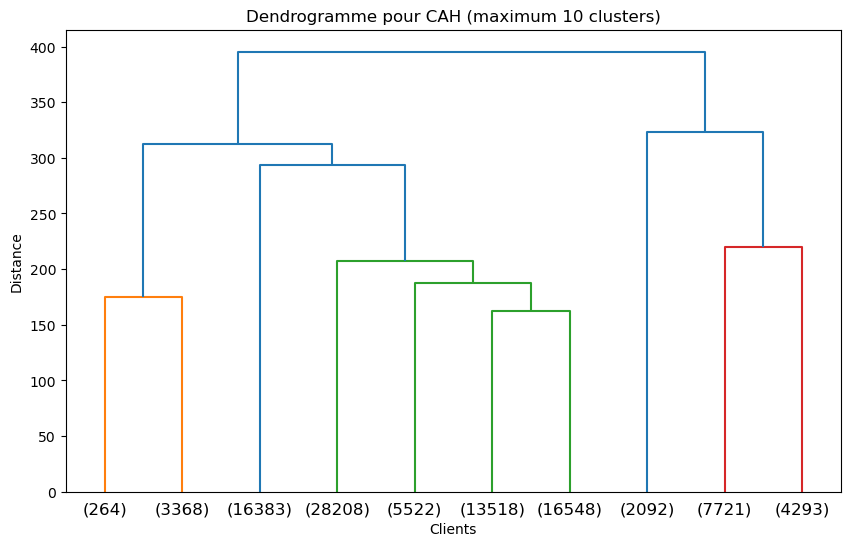

                        customer_id  kmeans_cluster  cah_cluster  \
0  00012a2ce6f8dcda20d059ce98491703             3.0          5.0   
1  000161a058600d5901f007fab4c27140             1.0          2.0   
2  0001fd6190edaaf884bcaf3d49edf079             1.0          4.0   
3  0002414f95344307404f0ace7a26f1d5             0.0          4.0   
4  000379cdec625522490c315e70c7a9fb             6.0          6.0   

   dbscan_cluster  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  


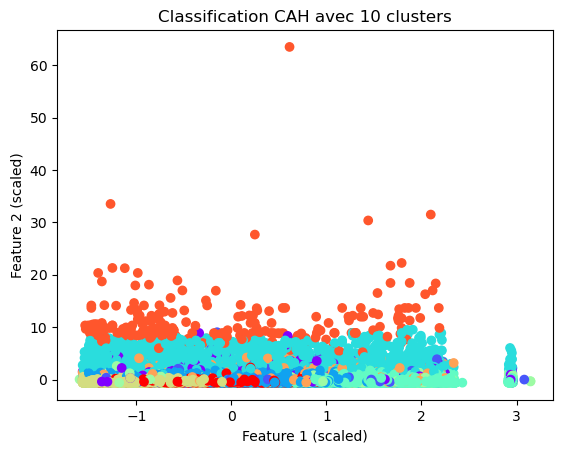

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# 1. Préparation et normalisation des données
X = rfm_df[['recency', 'monetary', 'avg_review_score', 'avg_delivery_delay', 'total_items']]

# Vérifier et gérer les valeurs manquantes
# X = X.dropna()  # Supprime les lignes avec des valeurs manquantes
X = X.fillna(X.mean())  # Imputer les NaN par la moyenne

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Clustering avec KMeans
# Trouver le nombre optimal de clusters avec la méthode du coude
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)  # Explicitement définir n_init à 10
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Méthode du coude pour KMeans")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()

# Appliquer KMeans avec un nombre de clusters choisi
kmeans = KMeans(n_clusters=10, random_state=0, n_init=10)  # Explicitement définir n_init à 10
rfm_df.loc[X.index, 'kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# 3. Clustering avec CAH (Dendrogramme)
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(
    sch.linkage(X_scaled, method='ward'),
    truncate_mode='lastp',  # Limiter le nombre de clusters affichés
    p=10,                   # Nombre maximum de clusters à afficher
)

plt.title('Dendrogramme pour CAH (maximum 10 clusters)')
plt.xlabel('Clients')
plt.ylabel('Distance')
plt.show()

# Appliquer CAH avec découpage en clusters 
cah = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')
rfm_df.loc[X.index, 'cah_cluster'] = cah.fit_predict(X_scaled)

# 4. Clustering avec DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm_df.loc[X.index, 'dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Afficher un aperçu des clusters
print(rfm_df[['customer_id', 'kmeans_cluster', 'cah_cluster', 'dbscan_cluster']].head())

# Afficher la classification CAH
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cah.labels_, cmap='rainbow')
plt.title(f"Classification CAH avec {10} clusters")
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()


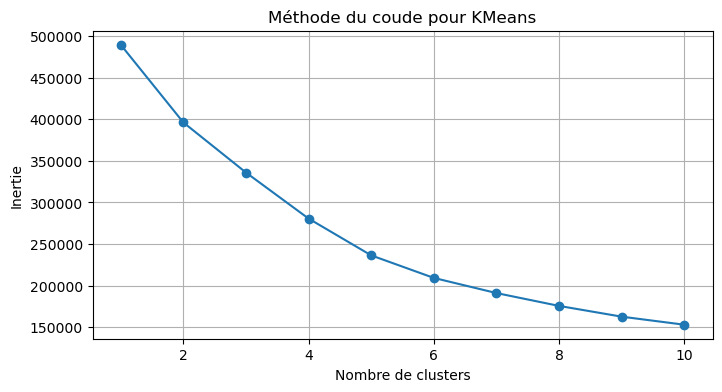

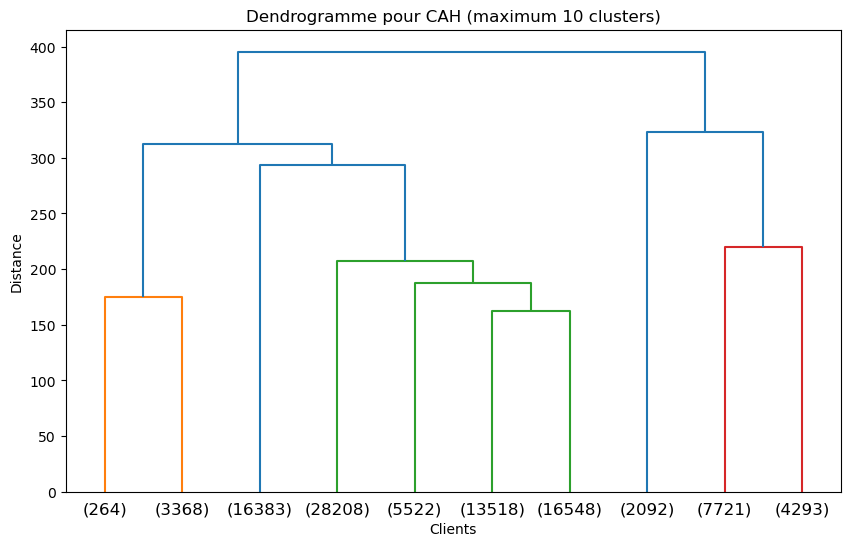

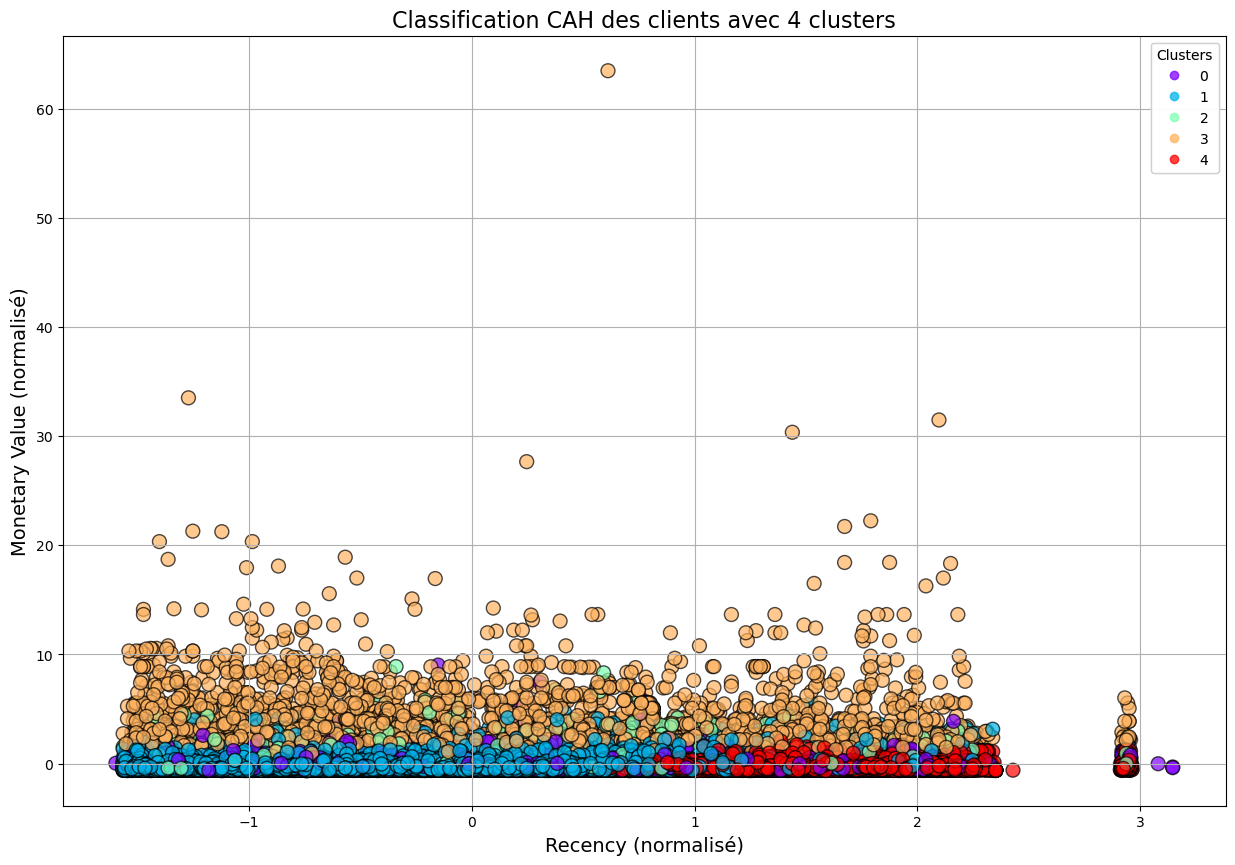

                        customer_id  kmeans_cluster  cah_cluster  \
0  00012a2ce6f8dcda20d059ce98491703             2.0          0.0   
1  000161a058600d5901f007fab4c27140             5.0          1.0   
2  0001fd6190edaaf884bcaf3d49edf079             5.0          4.0   
3  0002414f95344307404f0ace7a26f1d5             1.0          4.0   
4  000379cdec625522490c315e70c7a9fb             0.0          1.0   

   dbscan_cluster  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  


In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# 1. Préparation et normalisation des données
X = rfm_df[['recency', 'monetary', 'avg_review_score', 'avg_delivery_delay', 'total_items']]

# Vérifier et gérer les valeurs manquantes
# X = X.dropna()  # Supprime les lignes avec des valeurs manquantes
X = X.fillna(X.mean())

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Clustering avec KMeans
# Trouver le nombre optimal de clusters avec la méthode du coude
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)  # Explicitement définir n_init à 10
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Méthode du coude pour KMeans")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()

# Appliquer KMeans avec un nombre de clusters choisi
kmeans = KMeans(n_clusters=8, random_state=0, n_init=10)  # Explicitement définir n_init à 10
rfm_df.loc[X.index, 'kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# 3. Clustering avec CAH (Dendrogramme)
plt.figure(figsize=(10, 6))

# Dendrogramme avec un maximum de 10 clusters
dendrogram = sch.dendrogram(
    sch.linkage(X_scaled, method='ward'),
    truncate_mode='lastp',  # Limiter le nombre de clusters affichés
    p=10,                   # Nombre maximum de clusters à afficher
)

plt.title('Dendrogramme pour CAH (maximum 10 clusters)')
plt.xlabel('Clients')
plt.ylabel('Distance')
plt.show()

# Appliquer CAH avec découpage en clusters
cah = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
rfm_df.loc[X.index, 'cah_cluster'] = cah.fit_predict(X_scaled)

# Afficher la classification CAH avec amélioration de la lisibilité
plt.figure(figsize=(15, 10))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cah.labels_, cmap='rainbow',
                      edgecolor='k', s=100, alpha=0.7)

# Ajouter un titre descriptif
plt.title("Classification CAH des clients avec 4 clusters", fontsize=16)
plt.xlabel('Recency (normalisé)', fontsize=14)
plt.ylabel('Monetary Value (normalisé)', fontsize=14)

# Ajouter une légende
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.grid(True)
plt.show()

# 4. Clustering avec DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm_df.loc[X.index, 'dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Afficher un aperçu des clusters
print(rfm_df[['customer_id', 'kmeans_cluster', 'cah_cluster', 'dbscan_cluster']].head())


## Recherche hyperparametres

Étape 1 : Préparation et normalisation des données
Données après traitement des valeurs manquantes :
            recency      monetary  avg_review_score  avg_delivery_delay
count  19583.000000  19583.000000      19583.000000        19583.000000
mean     289.038401    136.848234          4.107534           11.979391
std      152.379272    210.953412          1.326632            9.104829
min       50.000000      2.290000          1.000000            0.000000
25%      167.000000     45.900000          4.000000            6.000000
50%      269.000000     86.900000          5.000000           10.000000
75%      397.000000    149.900000          5.000000           15.000000
max      744.000000   6499.000000          5.000000          187.000000

Étape 2 : Recherche des meilleurs hyperparamètres pour KMeans
Meilleurs hyperparamètres pour KMeans : {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 5, 'n_init': 3, 'tol': 0.0001}
Meilleur score de silhouette pour KMeans :

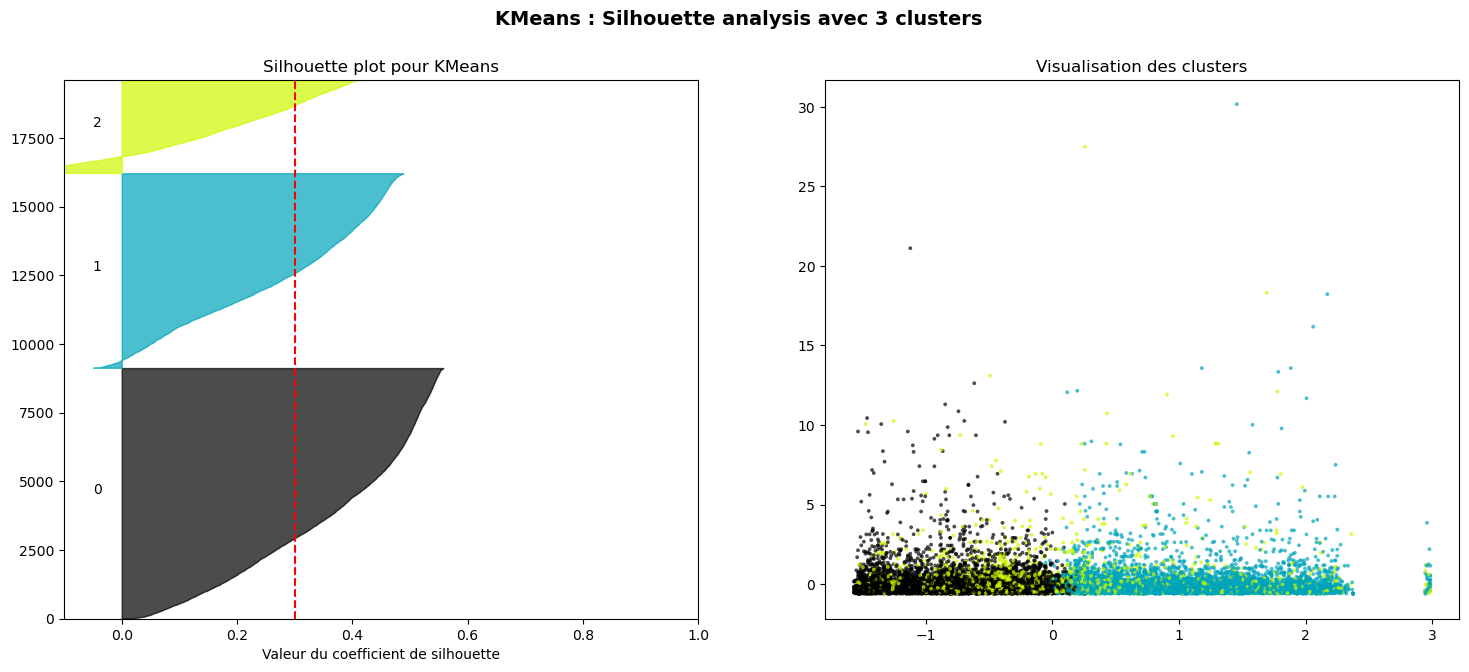

KMeans : Pour n_clusters = 4, le score de silhouette moyen est 0.315


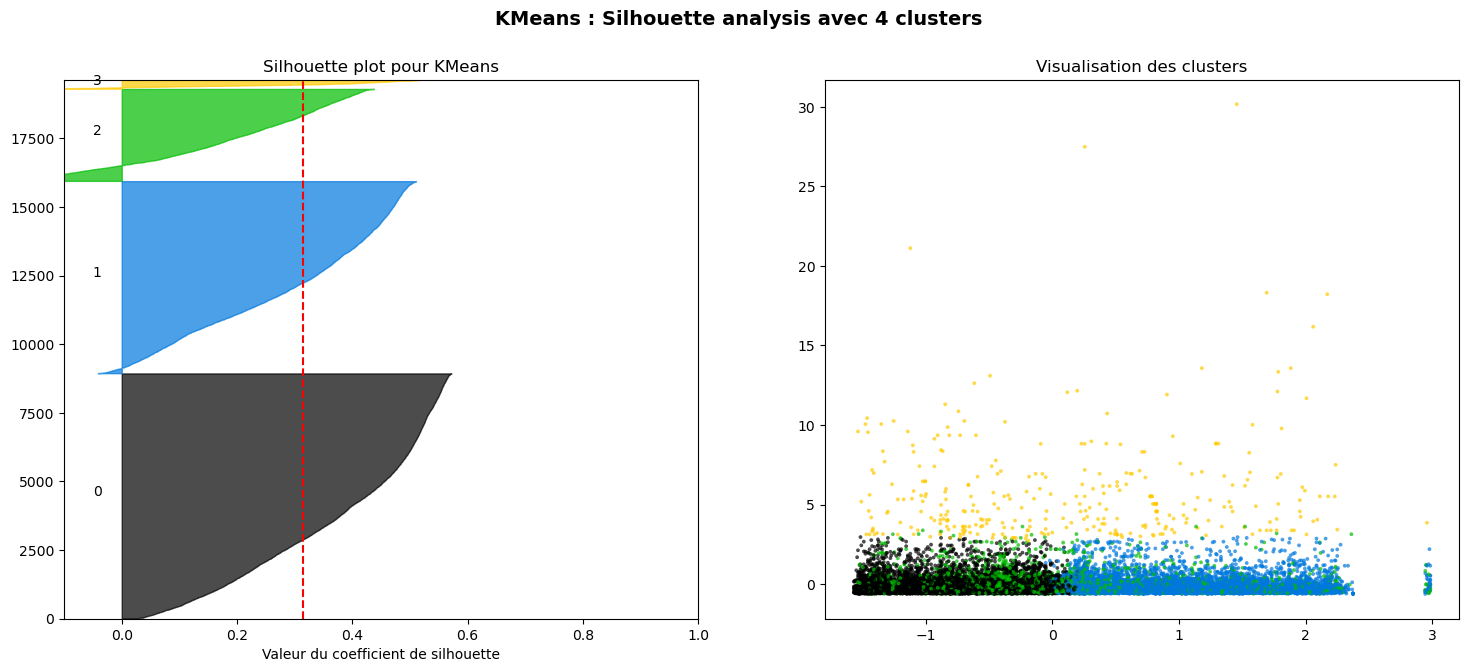

KMeans : Pour n_clusters = 5, le score de silhouette moyen est 0.328


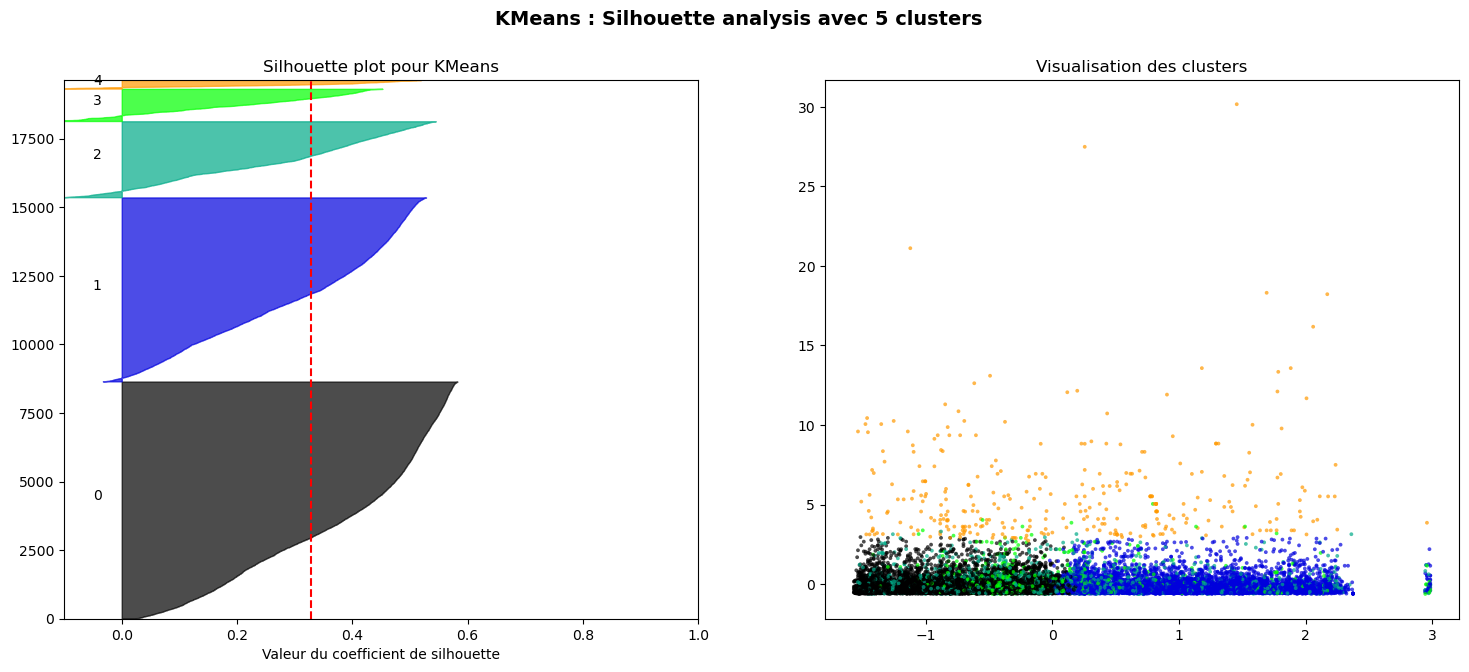

KMeans : Pour n_clusters = 6, le score de silhouette moyen est 0.310


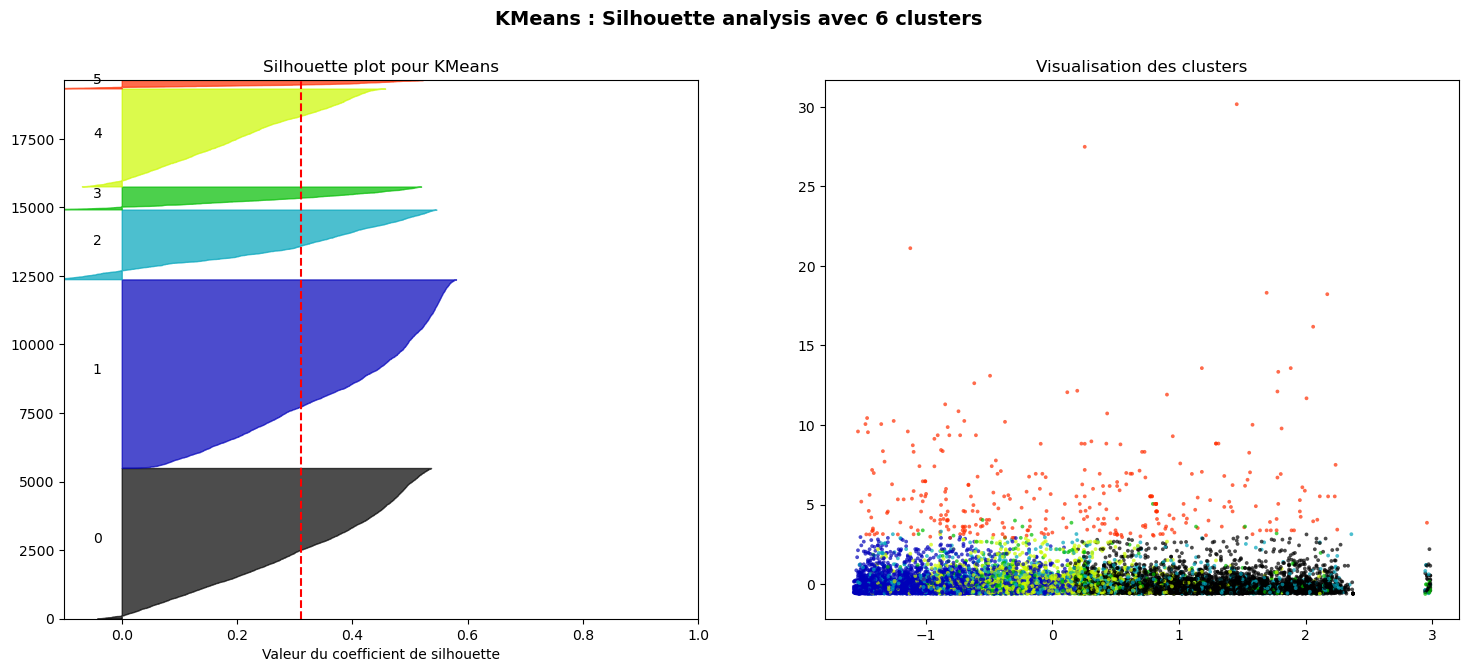

KMeans : Pour n_clusters = 7, le score de silhouette moyen est 0.317


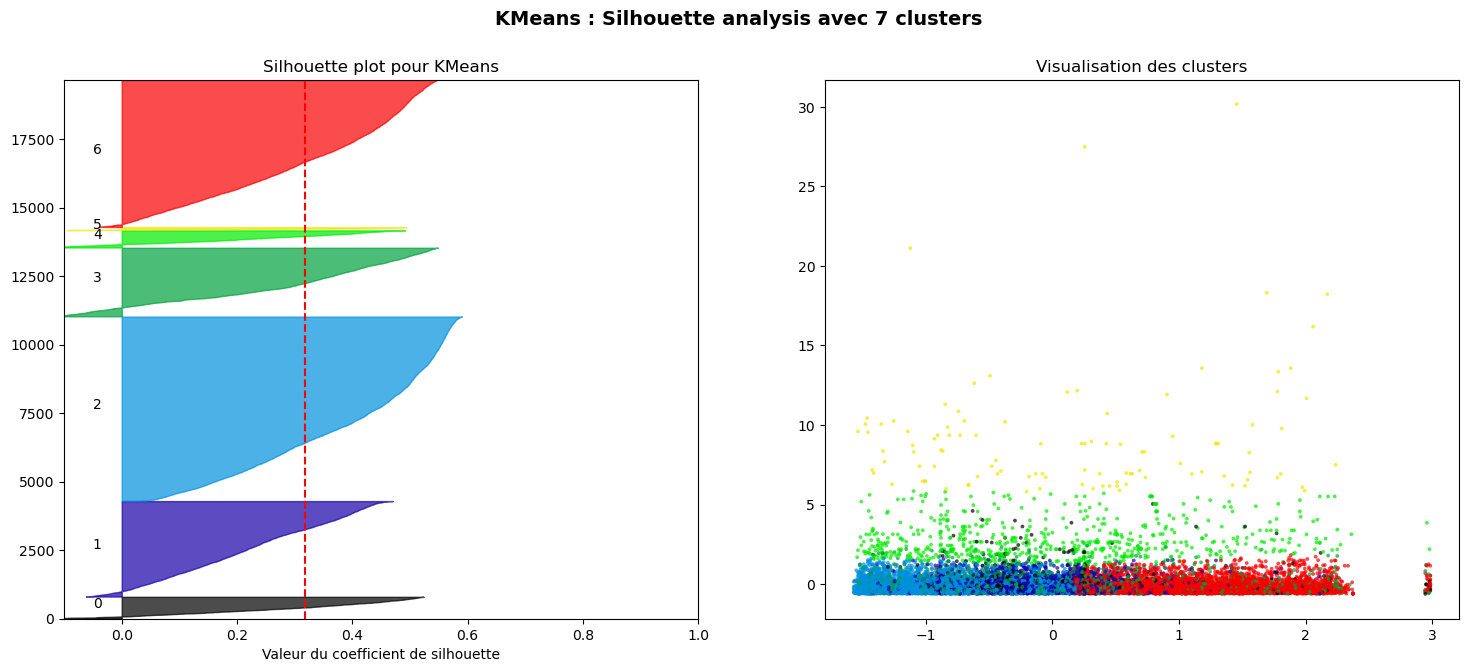

KMeans : Pour n_clusters = 8, le score de silhouette moyen est 0.275


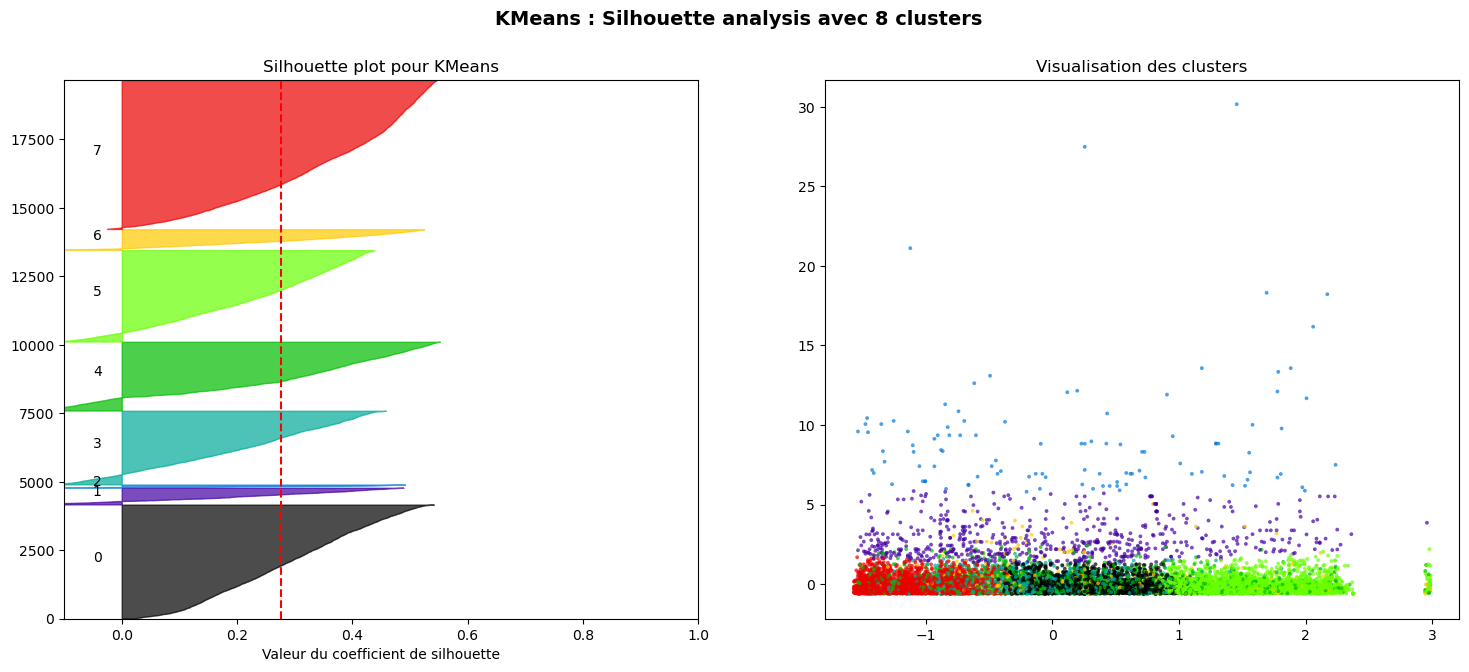

KMeans : Pour n_clusters = 9, le score de silhouette moyen est 0.272


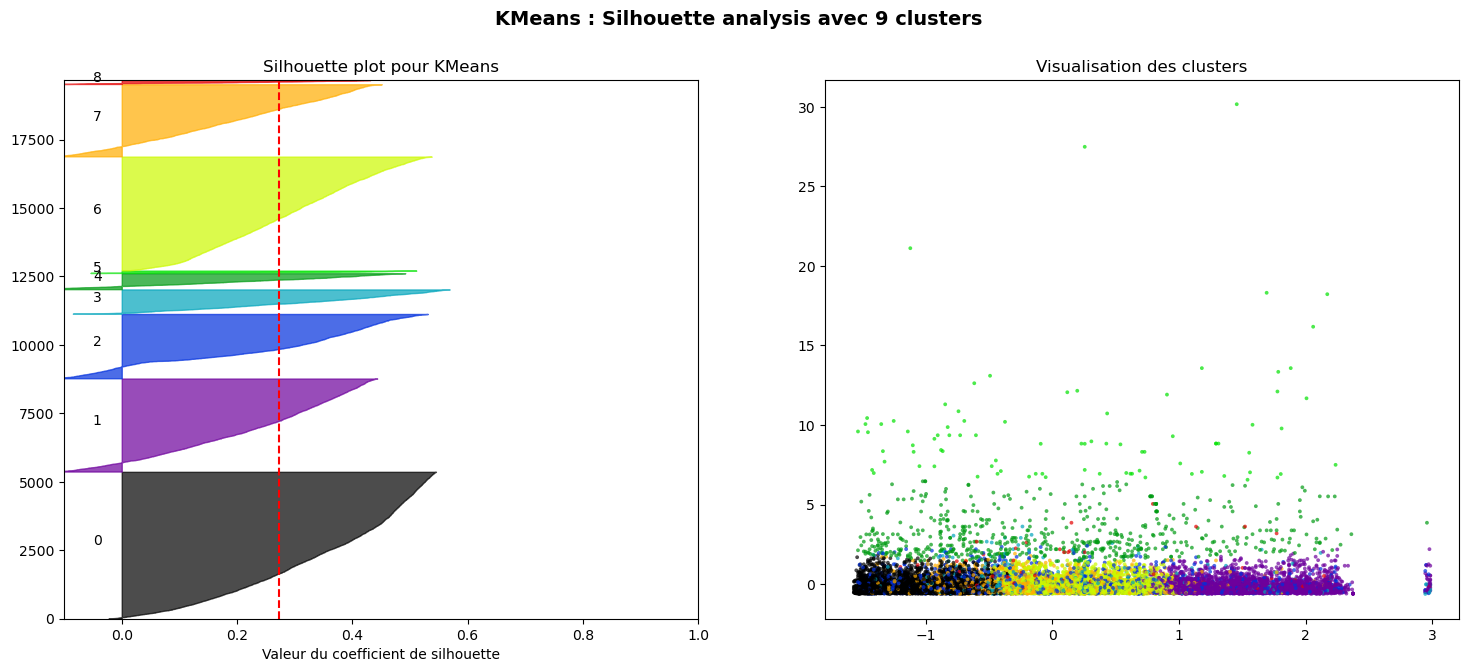

KMeans : Pour n_clusters = 10, le score de silhouette moyen est 0.277


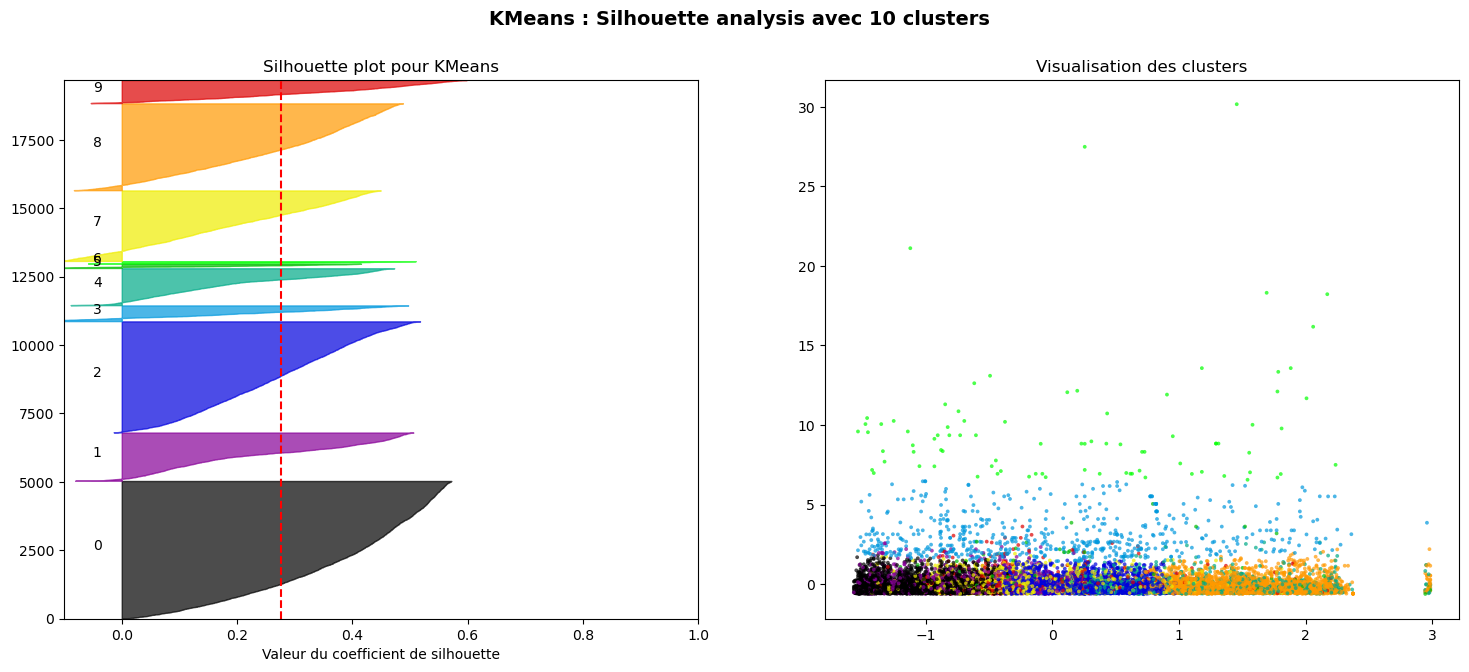

KMeans : Pour n_clusters = 11, le score de silhouette moyen est 0.261


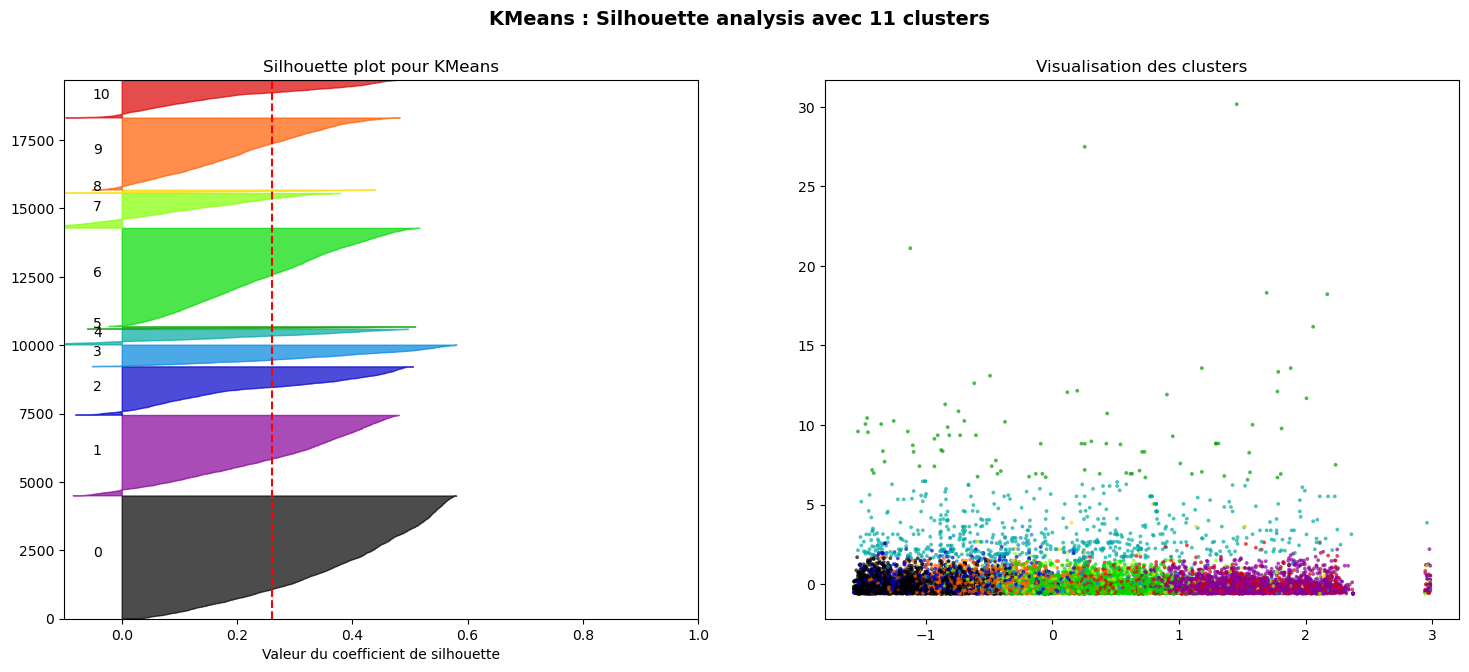


Étape 4 : Recherche des meilleurs hyperparamètres pour CAH
Meilleurs hyperparamètres pour CAH : {'linkage': 'single', 'metric': 'euclidean', 'n_clusters': 2}
Meilleur score de silhouette pour CAH : 0.9162358675845936

Étape 5 : Visualisation de la silhouette pour CAH
CAH : Pour n_clusters = 2, le score de silhouette moyen est 0.916


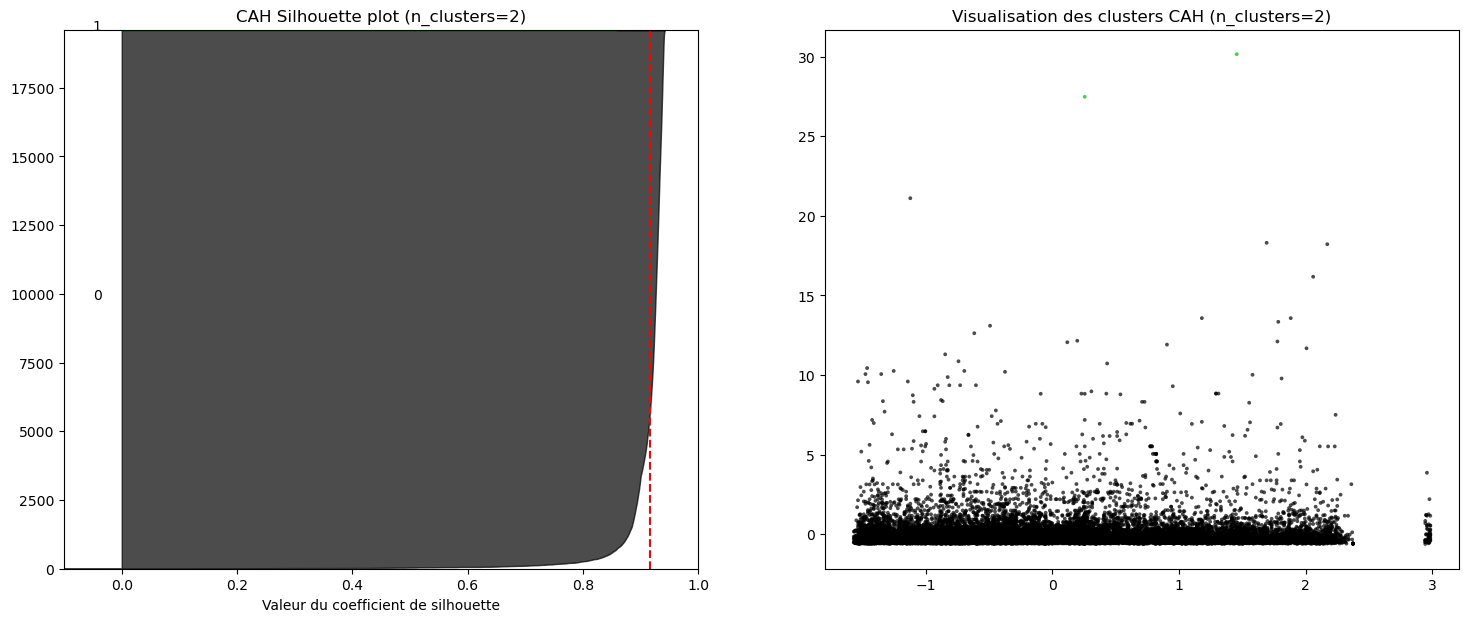

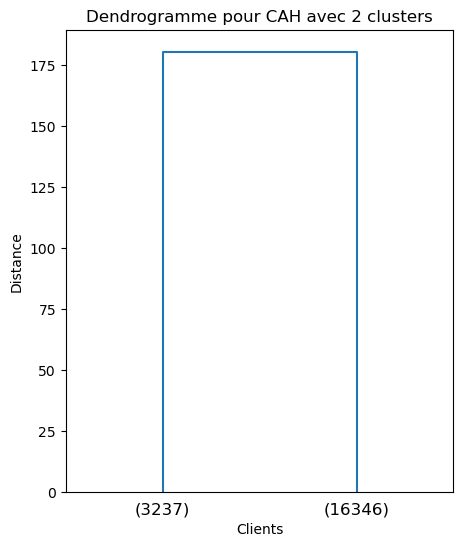

CAH : Pour n_clusters = 3, le score de silhouette moyen est 0.871


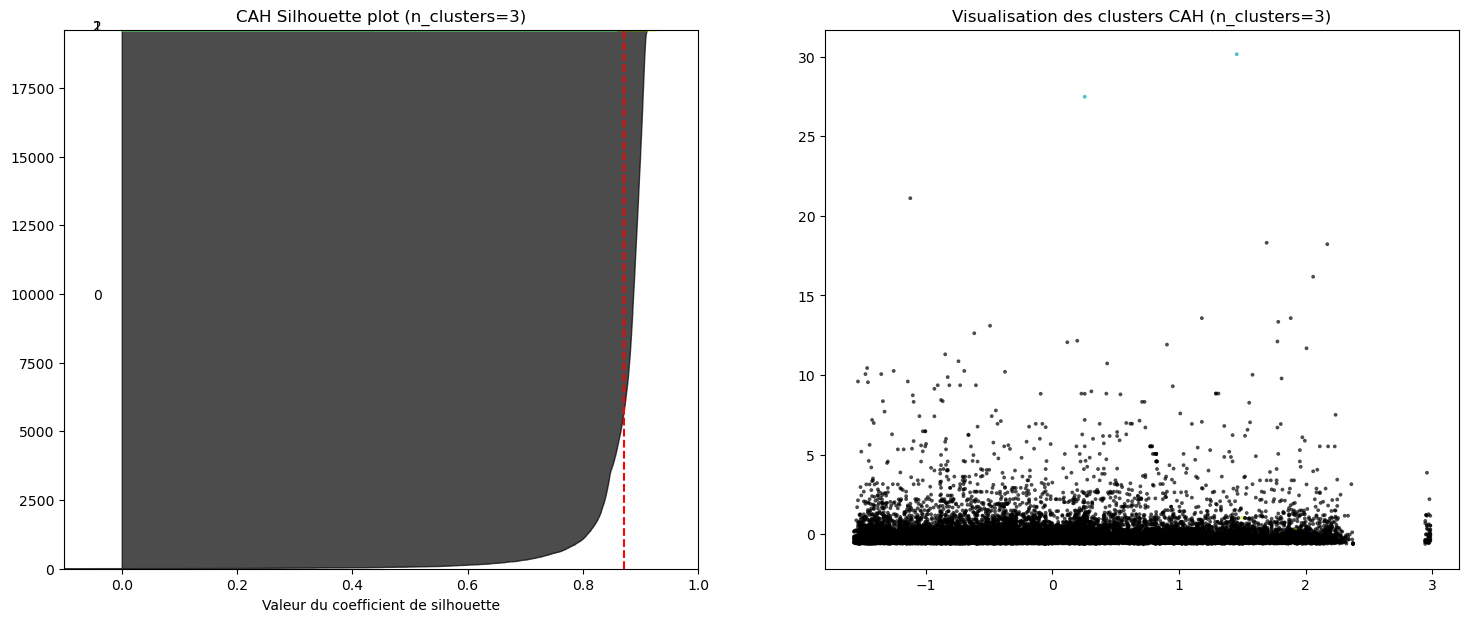

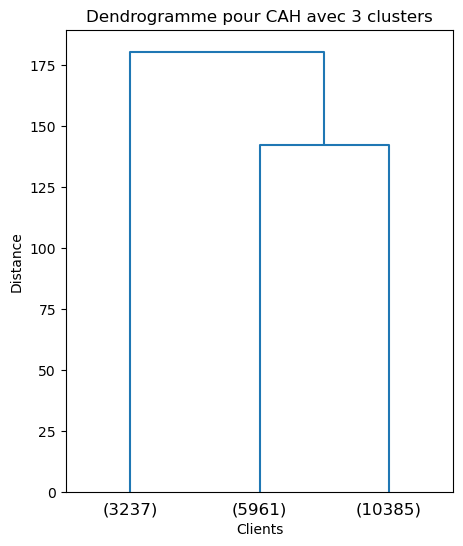

CAH : Pour n_clusters = 4, le score de silhouette moyen est 0.869


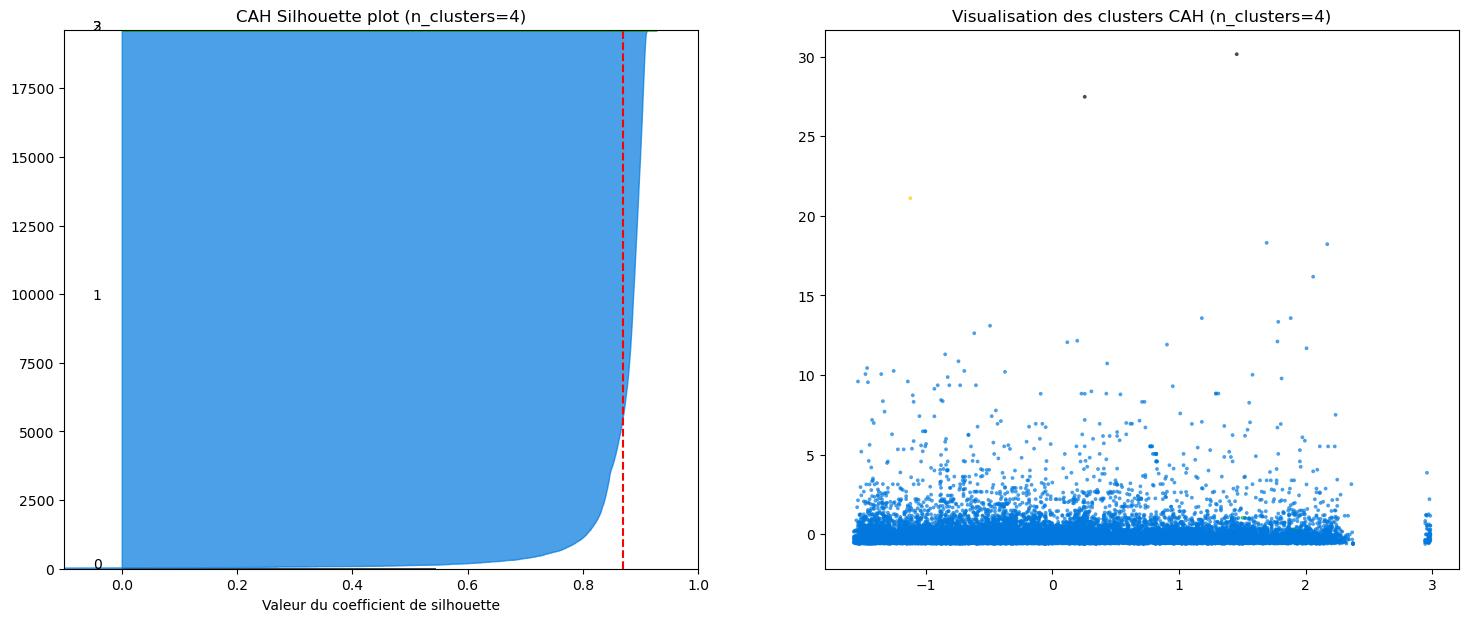

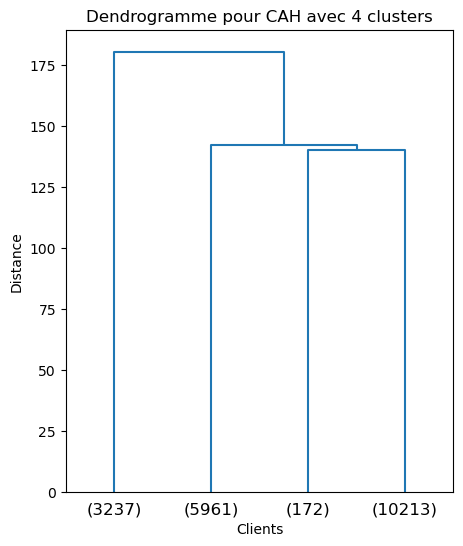

CAH : Pour n_clusters = 5, le score de silhouette moyen est 0.869


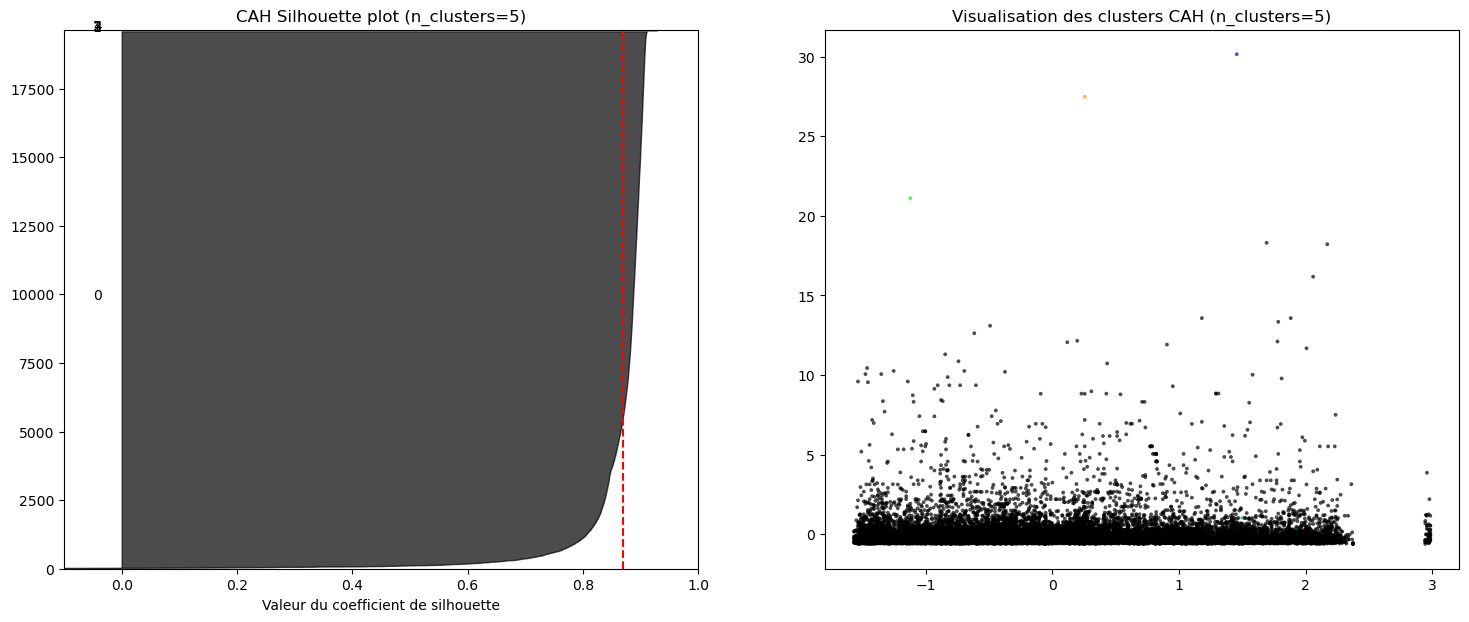

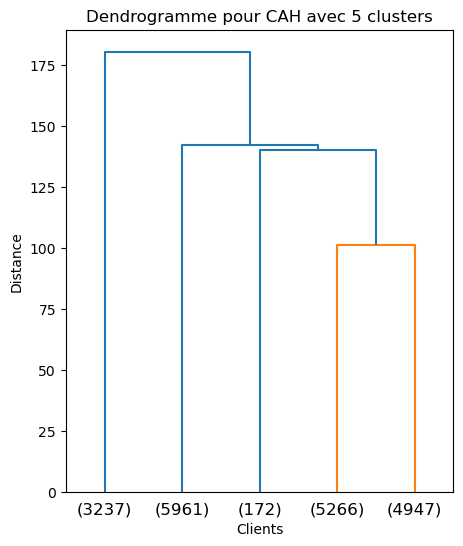

CAH : Pour n_clusters = 6, le score de silhouette moyen est 0.861


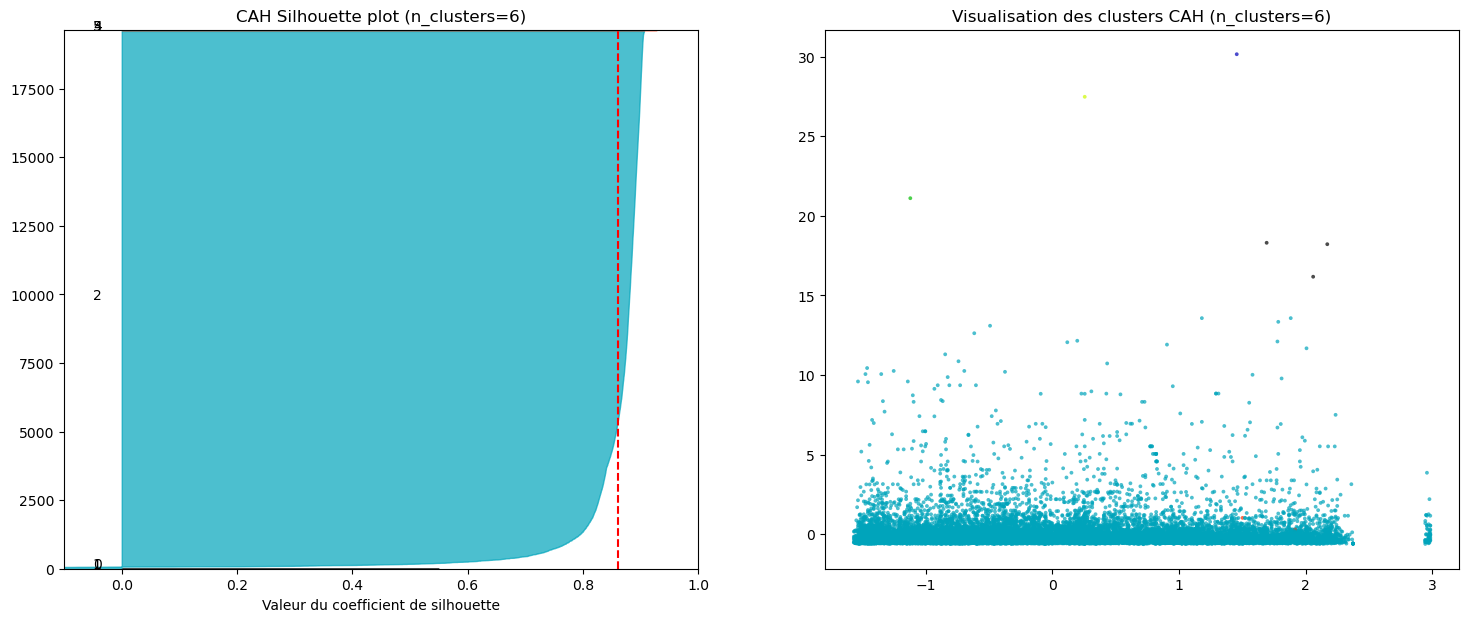

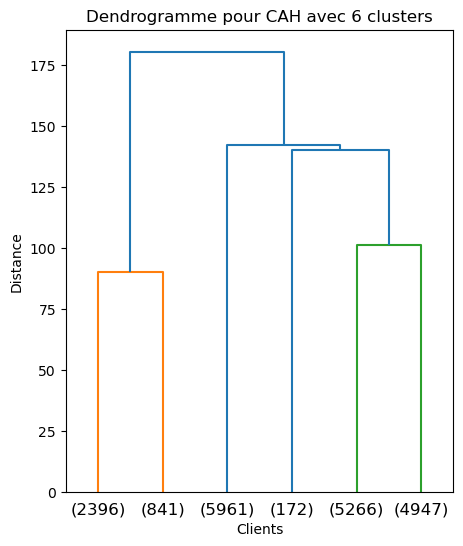

CAH : Pour n_clusters = 7, le score de silhouette moyen est 0.858


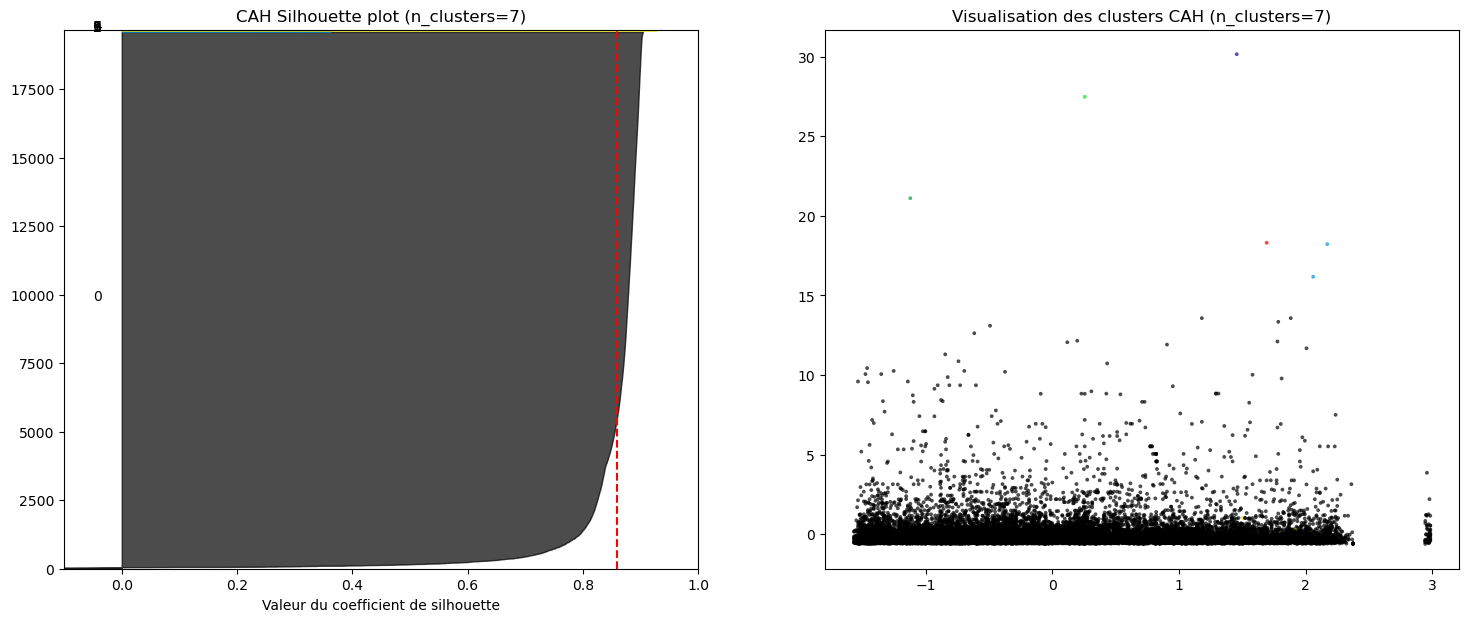

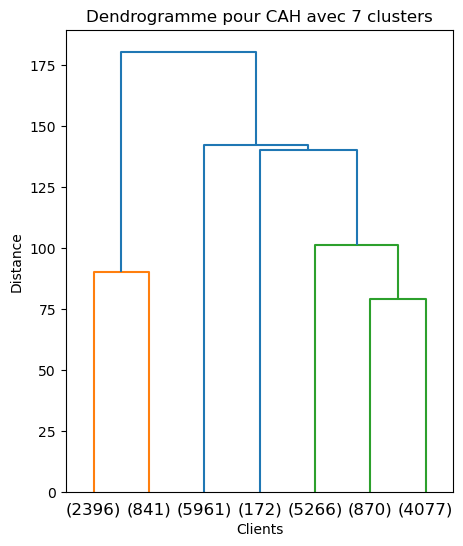

CAH : Pour n_clusters = 8, le score de silhouette moyen est 0.760


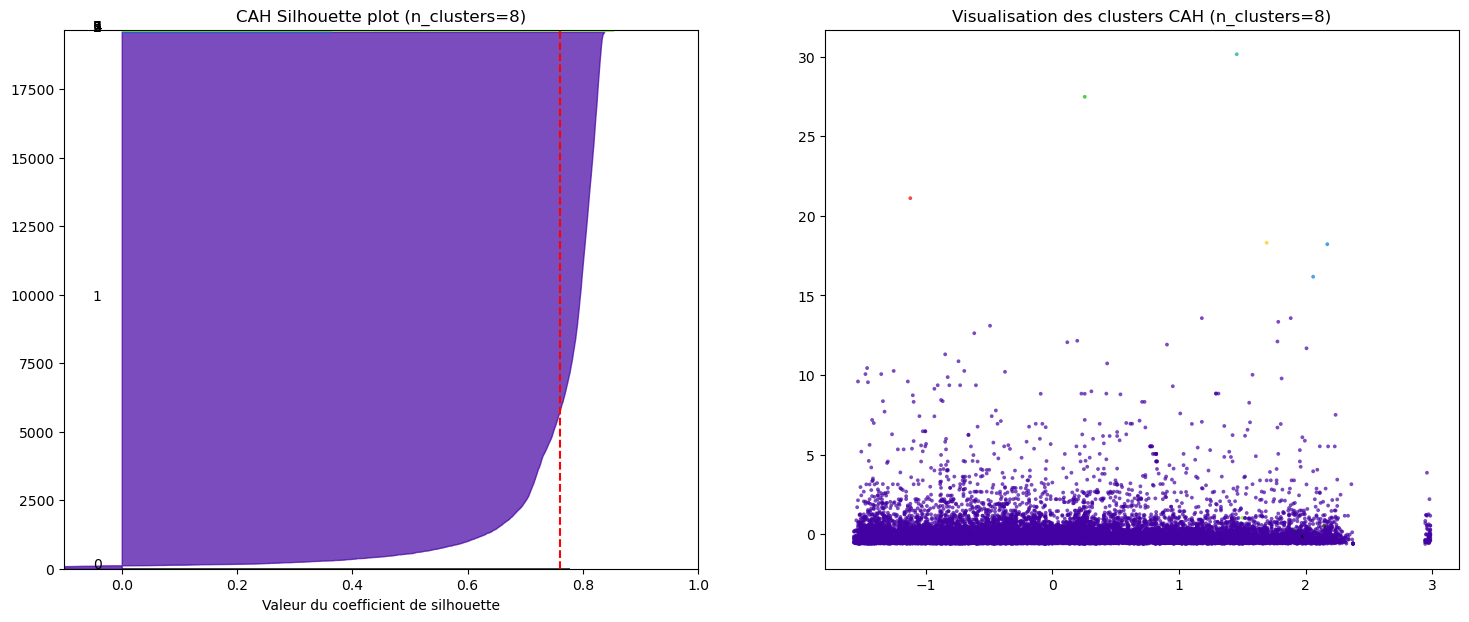

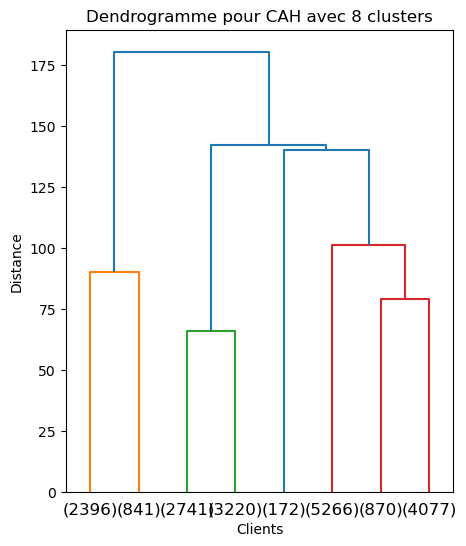

CAH : Pour n_clusters = 9, le score de silhouette moyen est 0.742


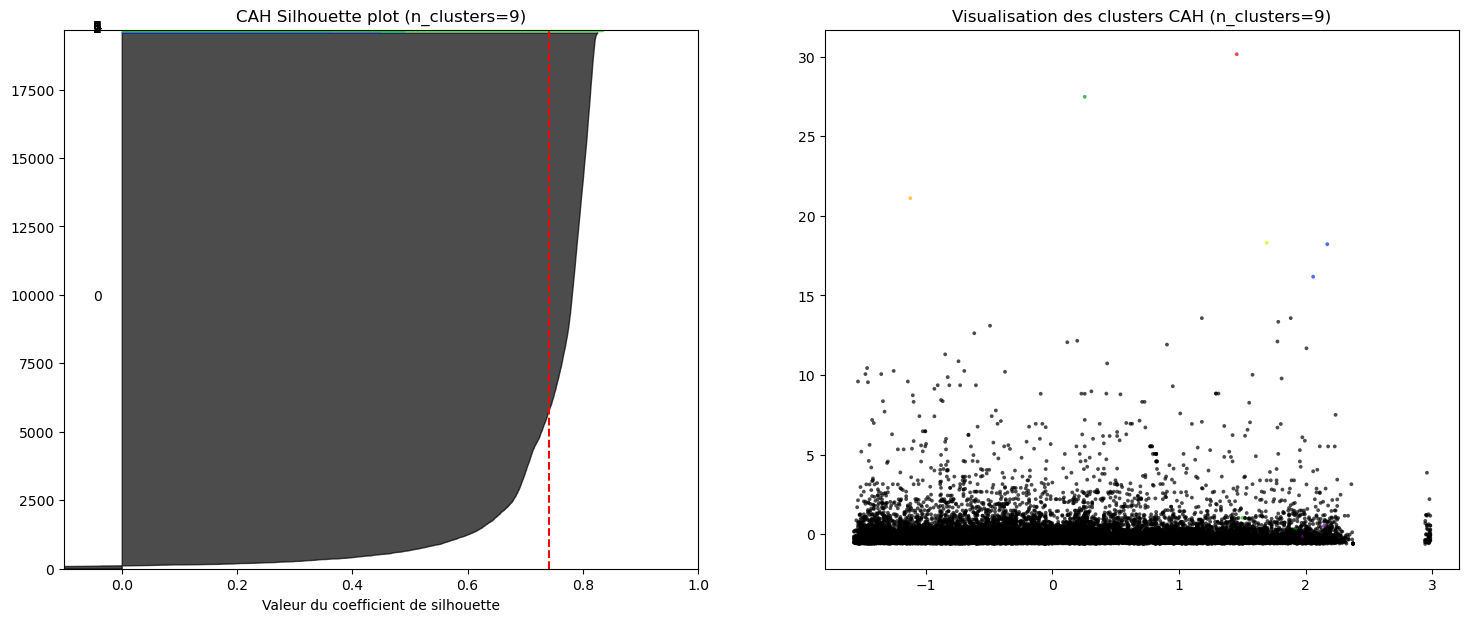

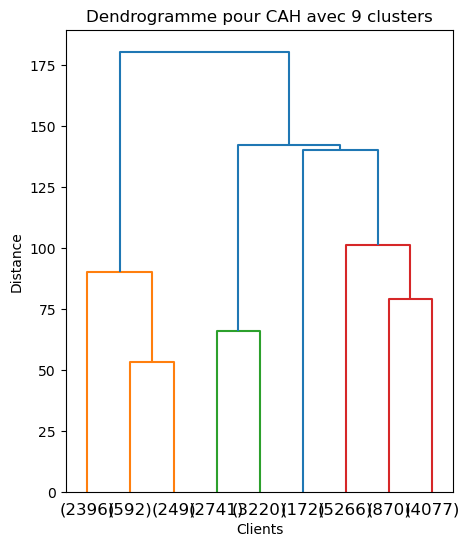

CAH : Pour n_clusters = 10, le score de silhouette moyen est 0.739


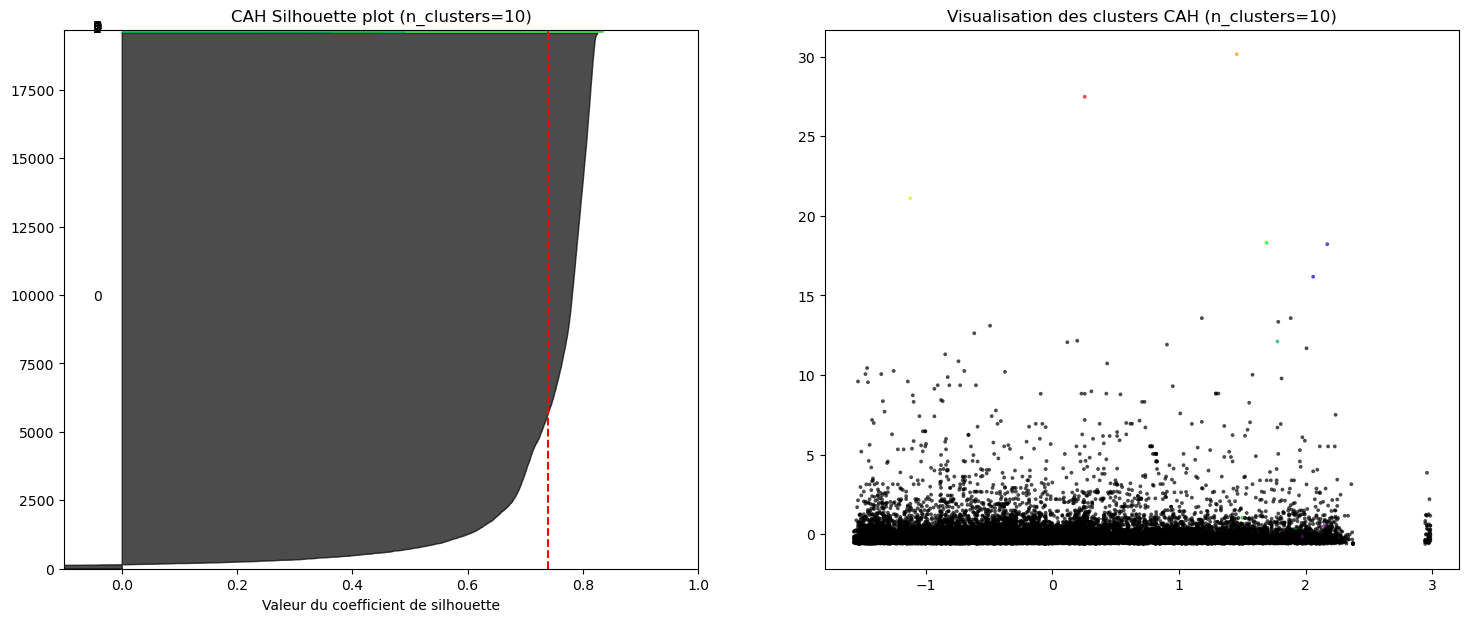

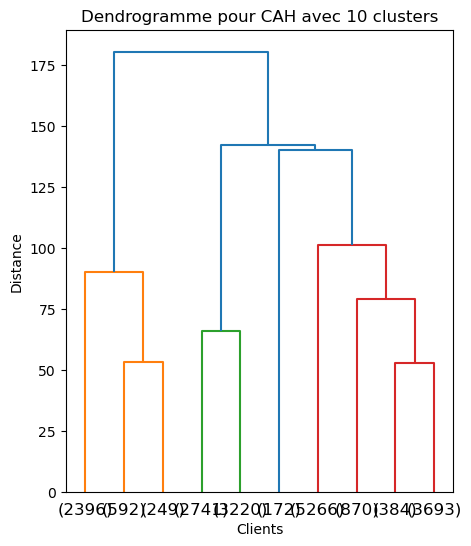

CAH : Pour n_clusters = 11, le score de silhouette moyen est 0.733


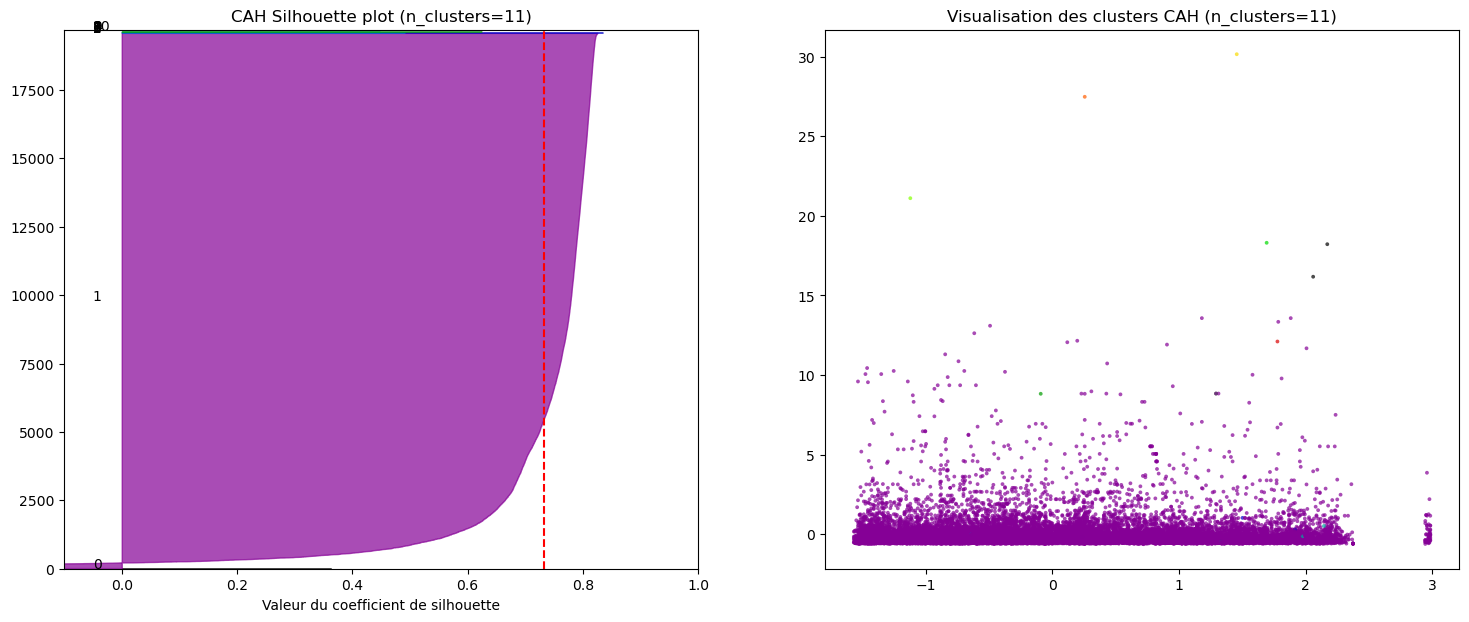

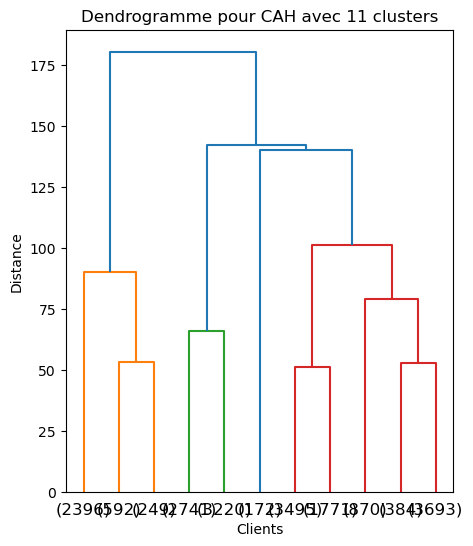

CAH : Pour n_clusters = 12, le score de silhouette moyen est 0.733


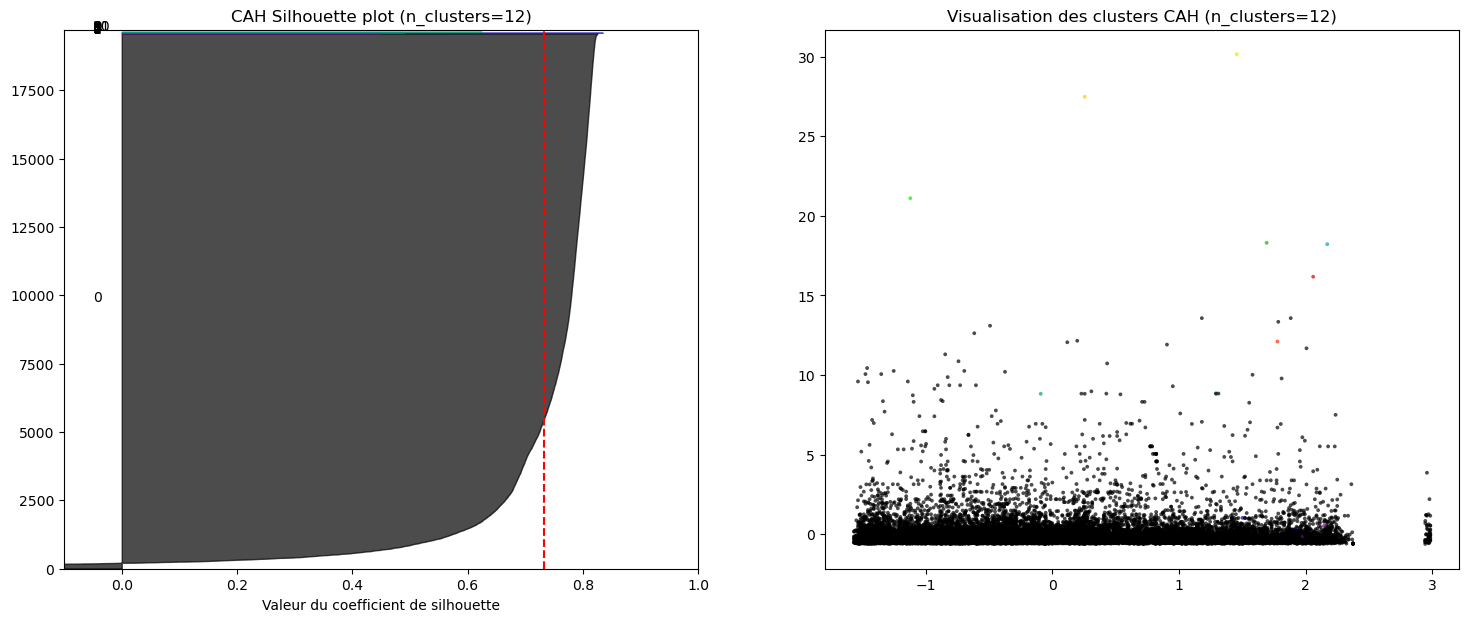

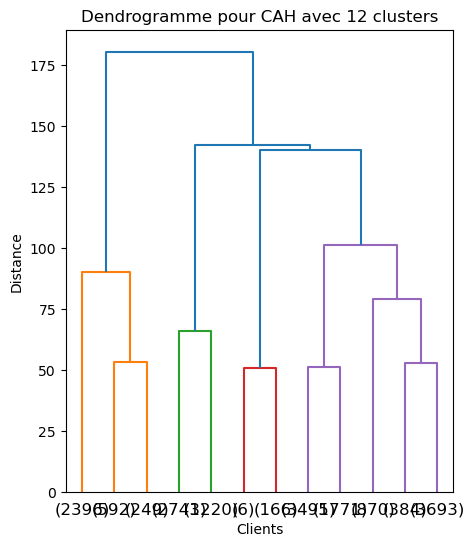


Étape 6 : Application de DBSCAN
Moyennes par cluster pour DBSCAN :
      recency     monetary  avg_review_score  avg_delivery_delay
0  286.242247   115.664205          4.134383           11.541825
1  350.833333  1443.150000          5.000000           12.500000
2  313.750000   628.930000          1.000000            6.750000
3  741.636364    83.782727          5.000000           12.541707
4  742.285714   109.208571          1.000000           27.428571
5  165.916667  1235.397500          5.000000            5.250000
6  403.750000  1212.475000          5.000000            7.500000
7  560.750000   308.217500          5.000000           35.000000

Visualisation DBSCAN


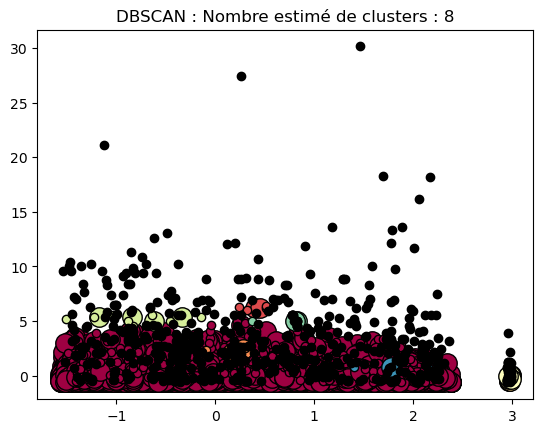

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import ParameterGrid
import scipy.cluster.hierarchy as sch

# 1. Préparation et normalisation des données
print("Étape 1 : Préparation et normalisation des données")

# Sélectionner aléatoirement 20% du jeu de données
rfm_sampled = rfm_df.sample(frac=0.2) 
X = rfm_sampled[['recency', 'monetary', 'avg_review_score', 'avg_delivery_delay']]

# Vérifier et gérer les valeurs manquantes
X = X.fillna(X.mean())
print("Données après traitement des valeurs manquantes :")
print(X.describe())

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Recherche des meilleurs hyperparamètres pour KMeans
print("\nÉtape 2 : Recherche des meilleurs hyperparamètres pour KMeans")
best_kmeans_params = {}
best_kmeans_score = -1

param_grid_kmeans = {
    'n_clusters': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'init': ['k-means++', 'random'],
    'n_init': [3, 2, 5],
    'max_iter': [300, 325],
    'tol': [1e-4, 1e-3],
    'algorithm': ['lloyd', 'elkan']
}

for params in ParameterGrid(param_grid_kmeans):
    kmeans = KMeans(
        n_clusters=params['n_clusters'], 
        init=params['init'], 
        n_init=params['n_init'],
        max_iter=params['max_iter'],
        tol=params['tol'],
        algorithm=params['algorithm'],
        random_state=10
    )
    
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    
    if silhouette_avg > best_kmeans_score:
        best_kmeans_score = silhouette_avg
        best_kmeans_params = params

print("Meilleurs hyperparamètres pour KMeans :", best_kmeans_params)
print("Meilleur score de silhouette pour KMeans :", best_kmeans_score)

# 3. Visualisation de la silhouette pour KMeans avec les meilleurs hyperparamètres
print("\nÉtape 3 : Visualisation de la silhouette pour KMeans")
for n_clusters in range(3, 12):
    kmeans = KMeans(
        n_clusters=n_clusters, 
        init=best_kmeans_params['init'], 
        n_init=best_kmeans_params['n_init'],
        max_iter=best_kmeans_params['max_iter'],
        tol=best_kmeans_params['tol'],
        algorithm=best_kmeans_params['algorithm'],
        random_state=10
    )
    
    cluster_labels = kmeans.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"KMeans : Pour n_clusters = {n_clusters}, le score de silhouette moyen est {silhouette_avg:.3f}")

    # Graphique silhouette
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot pour KMeans")
    ax1.set_xlabel("Valeur du coefficient de silhouette")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
    ax2.set_title("Visualisation des clusters")

    plt.suptitle(f"KMeans : Silhouette analysis avec {n_clusters} clusters", fontsize=14, fontweight="bold")
    plt.show()

# 4. Recherche des meilleurs hyperparamètres pour CAH
print("\nÉtape 4 : Recherche des meilleurs hyperparamètres pour CAH")
best_cah_params = {}
best_cah_score = -1

param_grid_cah = {
    'n_clusters': range(2, 13),
    'linkage': ['ward', 'complete', 'average', 'single'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

for params in ParameterGrid(param_grid_cah):
    cah = AgglomerativeClustering(n_clusters=params['n_clusters'], metric='euclidean', linkage=params['linkage'])
    cluster_labels_cah = cah.fit_predict(X_scaled)
    silhouette_avg_cah = silhouette_score(X_scaled, cluster_labels_cah)
    
    if silhouette_avg_cah > best_cah_score:
        best_cah_score = silhouette_avg_cah
        best_cah_params = params

print("Meilleurs hyperparamètres pour CAH :", best_cah_params)
print("Meilleur score de silhouette pour CAH :", best_cah_score)

# 5. Visualisation de la silhouette pour CAH avec les meilleurs hyperparamètres
print("\nÉtape 5 : Visualisation de la silhouette pour CAH")
for n_clusters in range(2, 13):
    cah = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage=best_cah_params['linkage'])
    cluster_labels_cah = cah.fit_predict(X_scaled)
    silhouette_avg_cah = silhouette_score(X_scaled, cluster_labels_cah)
    print(f"CAH : Pour n_clusters = {n_clusters}, le score de silhouette moyen est {silhouette_avg_cah:.3f}")

    # Graphique silhouette pour CAH
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels_cah)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_cah == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title(f"CAH Silhouette plot (n_clusters={n_clusters})")
    ax1.set_xlabel("Valeur du coefficient de silhouette")
    ax1.axvline(x=silhouette_avg_cah, color="red", linestyle="--")

    colors = cm.nipy_spectral(cluster_labels_cah.astype(float) / n_clusters)
    ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
    ax2.set_title(f"Visualisation des clusters CAH (n_clusters={n_clusters})")

    plt.show()

    # Dendrogramme pour chaque nombre de clusters
    plt.figure(figsize=(5, 6))
    dendrogram = sch.dendrogram(
        sch.linkage(X_scaled, method='ward'),
        truncate_mode='lastp',
        p=n_clusters
    )

    plt.title(f'Dendrogramme pour CAH avec {n_clusters} clusters')
    plt.xlabel('Clients')
    plt.ylabel('Distance')
    plt.show()

# 6. Application de DBSCAN
print("\nÉtape 6 : Application de DBSCAN")
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels_dbscan = dbscan.fit_predict(X_scaled)

# 7. Visualisation des résultats de DBSCAN
print("Moyennes par cluster pour DBSCAN :")
clustered_df = pd.DataFrame({'Cluster': cluster_labels_dbscan, 'Recency': X[:, 0], 'Monetary': X[:, 1], 'Avg_Review': X[:, 2], 'Avg_Delivery_Delay': X[:, 3]})
print(clustered_df.groupby('Cluster').mean())

print("Code terminé.")


# good

Recherche des meilleurs paramètres pour KMeans...
Meilleurs paramètres KMeans: {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 7, 'n_init': 3, 'tol': 0.001}
Meilleur score silhouette KMeans: 0.3126478750069821
Recherche des meilleurs paramètres pour CAH...
Meilleurs paramètres CAH: {'linkage': 'single', 'metric': 'euclidean', 'n_clusters': 3}
Meilleur score silhouette CAH: 0.9086204032950758
Recherche des meilleurs paramètres pour DBSCAN...
Meilleurs paramètres DBSCAN: {'eps': 0.6, 'metric': 'euclidean', 'min_samples': 5}
Meilleur score silhouette DBSCAN: 0.2552123409947925


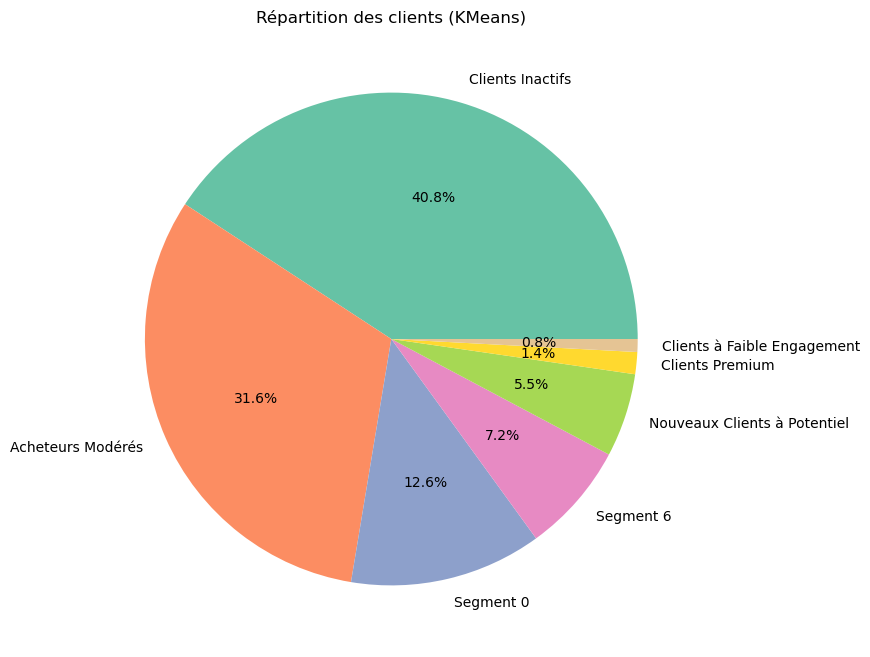

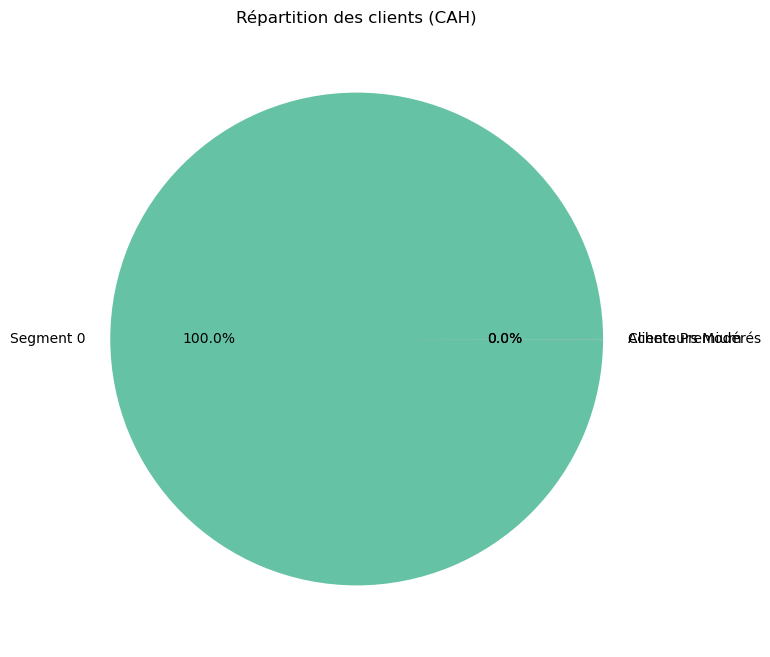

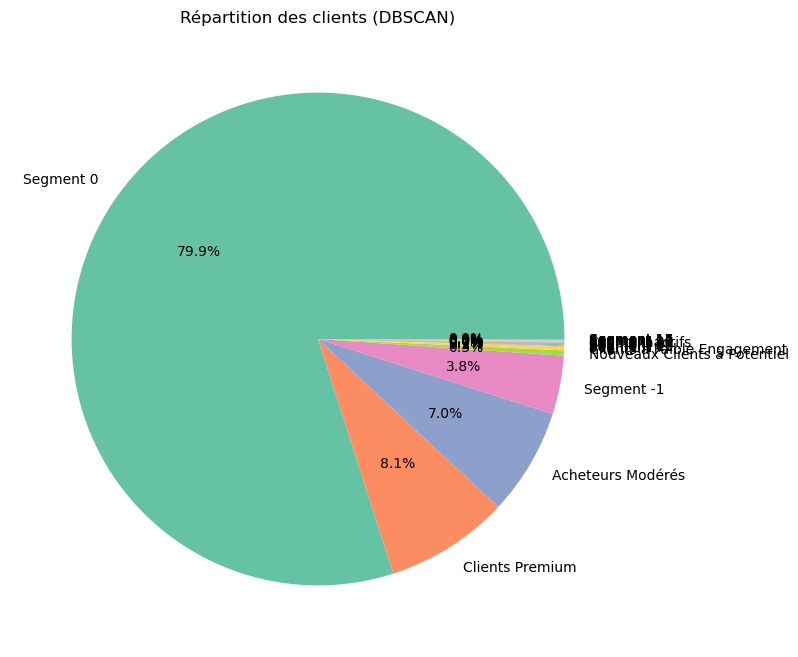

In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple de jeu de données RFM
# rfm_sampled contient déjà les colonnes recency, monetary, total_items
X = rfm_sampled[['recency', 'monetary', 'avg_review_score', 'avg_delivery_delay', 'total_items']]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Imputation des NaN avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Paramètres de la grille KMeans
param_grid_kmeans = {
    'n_clusters': [5, 6, 7, 8, 9, 10],
    'init': ['k-means++', 'random'],
    'n_init': [3, 2, 5],
    'max_iter': [300, 325],
    'tol': [1e-4, 1e-3],
    'algorithm': ['lloyd', 'elkan']
}

# Meilleurs paramètres KMeans
best_kmeans_score = -1
best_kmeans_params = None
best_kmeans_labels = None

# Recherche des meilleurs paramètres KMeans
print("Recherche des meilleurs paramètres pour KMeans...")
for params in ParameterGrid(param_grid_kmeans):
    kmeans = KMeans(
        n_clusters=params['n_clusters'],
        init=params['init'],
        n_init=params['n_init'],
        max_iter=params['max_iter'],
        tol=params['tol'],
        algorithm=params['algorithm'],
        random_state=10
    )
    cluster_labels = kmeans.fit_predict(X_scaled_imputed)
    silhouette_avg = silhouette_score(X_scaled_imputed, cluster_labels)
    
    if silhouette_avg > best_kmeans_score:
        best_kmeans_score = silhouette_avg
        best_kmeans_params = params
        best_kmeans_labels = cluster_labels

# Affichage des meilleurs paramètres et du score silhouette KMeans
print("Meilleurs paramètres KMeans:", best_kmeans_params)
print("Meilleur score silhouette KMeans:", best_kmeans_score)

# Ajout des labels KMeans dans le DataFrame
rfm_sampled['KMeans_Cluster'] = best_kmeans_labels

# Paramètres de la grille pour CAH
param_grid_cah = {
    'n_clusters': range(3, 10),
    'linkage': ['ward', 'complete', 'average', 'single'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

best_cah_score = -1
best_cah_params = None
best_cah_labels = None

# Recherche des meilleurs paramètres CAH
print("Recherche des meilleurs paramètres pour CAH...")
for params in ParameterGrid(param_grid_cah):
    if params['linkage'] == 'ward' and params['metric'] != 'euclidean':
        continue
    
    cah = AgglomerativeClustering(
        n_clusters=params['n_clusters'],
        linkage=params['linkage']
    )
    
    cluster_labels = cah.fit_predict(X_scaled_imputed)
    silhouette_avg = silhouette_score(X_scaled_imputed, cluster_labels)
    
    if silhouette_avg > best_cah_score:
        best_cah_score = silhouette_avg
        best_cah_params = params
        best_cah_labels = cluster_labels

# Affichage des meilleurs paramètres et du score silhouette CAH
print("Meilleurs paramètres CAH:", best_cah_params)
print("Meilleur score silhouette CAH:", best_cah_score)

# Ajout des labels CAH dans le DataFrame
rfm_sampled['CAH_Cluster'] = best_cah_labels

# Paramètres de la grille pour DBSCAN
param_grid_dbscan = {
    'eps': [0.5, 0.6, 0.7, 0.8],
    'min_samples': [3, 4, 5],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

best_dbscan_score = -1
best_dbscan_params = None
best_dbscan_labels = None

# Recherche des meilleurs paramètres DBSCAN
print("Recherche des meilleurs paramètres pour DBSCAN...")
for params in ParameterGrid(param_grid_dbscan):
    dbscan = DBSCAN(
        eps=params['eps'],
        min_samples=params['min_samples'],
        metric=params['metric']
    )
    cluster_labels = dbscan.fit_predict(X_scaled_imputed)
    
    if len(np.unique(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(X_scaled_imputed, cluster_labels)
        
        if silhouette_avg > best_dbscan_score:
            best_dbscan_score = silhouette_avg
            best_dbscan_params = params
            best_dbscan_labels = cluster_labels

# Affichage des meilleurs paramètres et du score silhouette DBSCAN
print("Meilleurs paramètres DBSCAN:", best_dbscan_params)
print("Meilleur score silhouette DBSCAN:", best_dbscan_score)

# Ajout des labels DBSCAN dans le DataFrame
rfm_sampled['DBSCAN_Cluster'] = best_dbscan_labels

# Définition des segments de clients
segments = {
    1: "Clients Premium",
    2: "Acheteurs Modérés",
    3: "Clients Inactifs",
    4: "Nouveaux Clients à Potentiel",
    5: "Clients à Faible Engagement"
}

# Création des Treemaps pour chaque modèle
def create_treemap(df, cluster_column, title):
    plt.figure(figsize=(12, 8))
    cluster_counts = df[cluster_column].value_counts(normalize=True)
    sizes = cluster_counts.values * 100
    labels = [segments.get(i, f"Segment {i}") for i in cluster_counts.index]
    
    colors = sns.color_palette("Set2", len(labels))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
    plt.title(title)
    plt.show()

# Treemaps pour KMeans
create_treemap(rfm_sampled, 'KMeans_Cluster', 'Répartition des clients (KMeans)')

# Treemaps pour CAH
create_treemap(rfm_sampled, 'CAH_Cluster', 'Répartition des clients (CAH)')

# Treemaps pour DBSCAN
create_treemap(rfm_sampled, 'DBSCAN_Cluster', 'Répartition des clients (DBSCAN)')


### Interprétations

Segment 0 : Clients Premium
Ils représentent les clients récents qui dépensent beaucoup et achètent un grand nombre d’articles. Ce segment est crucial pour l'entreprise, car ils sont à la fois récents et apportent une forte valeur en termes de dépenses.

Segment 1 : Acheteurs modérés
Ce groupe pourrait inclure des clients réguliers qui achètent souvent, mais dont le panier moyen est inférieur. Ils sont importants pour la stabilité du chiffre d’affaires.

Segment 2 : Clients inactifs ou perdus
Ces clients n’ont pas fait d’achat récent et dépensent peu. Ce segment pourrait bénéficier de campagnes de relance ou de fidélisation.

Segment 3 : Nouveaux clients à potentiel
Ce sont des clients récents avec un montant moyen dépensé, mais un faible nombre d’articles. Ils peuvent représenter une opportunité de développement, car ils ont encore un potentiel de fidélisation.

Segment 4 : Clients à faible engagement
Ces clients achètent rarement, peu et avec des paniers modestes. Il pourrait être intéressant de les analyser plus en détail pour voir s’il est possible de les réactiver ou s’ils ne représentent plus une cible prioritaire.

### Actions

Segment 0 : Clients Premium
Offrez des services VIP, des programmes de fidélité personnalisés ou des offres exclusives pour les maintenir engagés.

Segment 1 : Acheteurs modérés
Incitez-les à acheter plus fréquemment avec des offres spéciales ou des promotions ciblées.

Segment 2 : Clients inactifs ou perdus
Mettez en place des campagnes de retargeting, des réductions pour les réactiver ou des newsletters personnalisées pour renouer le contact.

Segment 3 : Nouveaux clients à potentiel
Fidélisez ces clients en leur proposant des offres de bienvenue ou des services personnalisés pour les inciter à devenir des acheteurs réguliers.

Segment 4 : Clients à faible engagement
Évaluez s’il est rentable de les cibler avec des promotions, ou s’ils ne constituent plus une cible pertinente à long terme.

Meilleurs paramètres KMeans: {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 7, 'n_init': 3, 'tol': 0.001}
Meilleur score silhouette KMeans: 0.3126478750069821
Meilleurs paramètres CAH: {'linkage': 'single', 'metric': 'euclidean', 'n_clusters': 3}
Meilleur score silhouette CAH: 0.9086204032950758
Meilleurs paramètres DBSCAN: {'eps': 0.6, 'metric': 'euclidean', 'min_samples': 5}
Meilleur score silhouette DBSCAN: 0.2552123409947925


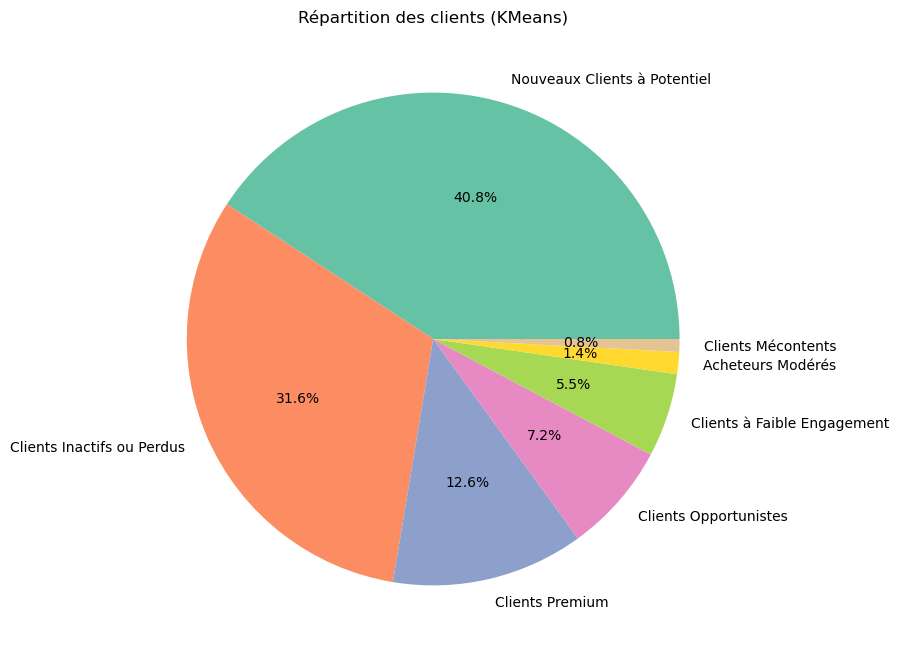

        recency                                                              \
          count        mean         std    min    25%    50%     75%    max   
Segment                                                                       
0        2470.0  289.982186  138.037995   53.0  192.0  273.0  368.75  744.0   
1         283.0  311.717314  158.386203   55.0  177.0  306.0  418.00  740.0   
2        6188.0  439.621202   95.644370  280.0  354.0  429.0  513.00  744.0   
3        7987.0  171.020784   72.523256   50.0  107.0  169.0  233.00  319.0   
4        1073.0  287.905871  110.885873   73.0  222.0  254.0  326.00  744.0   
5         165.0  290.533333  146.792060   50.0  184.0  271.0  378.00  743.0   
6        1417.0  291.169372  153.888505   50.0  163.0  271.0  403.00  641.0   

        monetary               ... avg_delivery_delay        total_items  \
           count         mean  ...                75%    max       count   
Segment                        ...                       

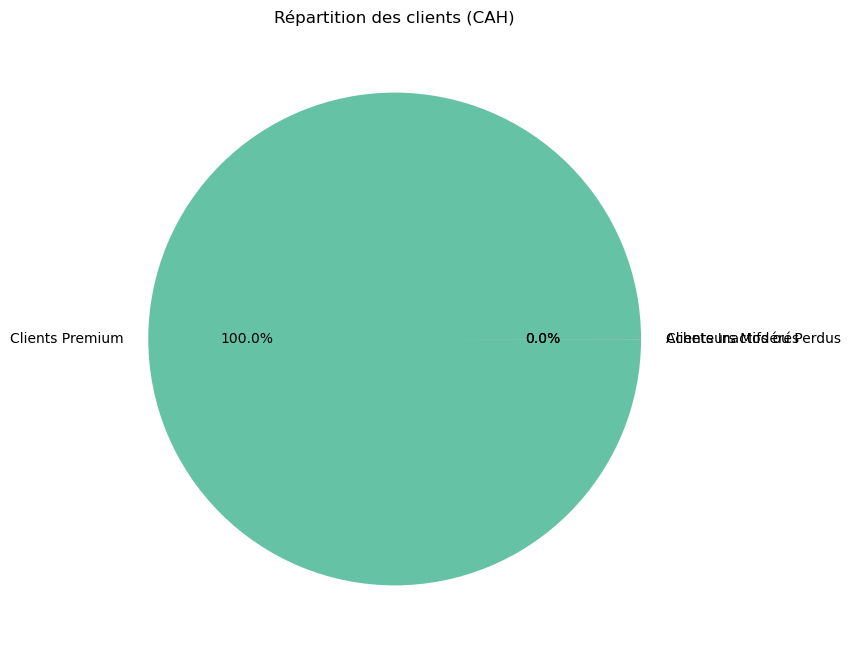

        recency                                                              \
          count        mean         std    min    25%    50%     75%    max   
Segment                                                                       
0        2470.0  289.982186  138.037995   53.0  192.0  273.0  368.75  744.0   
1         283.0  311.717314  158.386203   55.0  177.0  306.0  418.00  740.0   
2        6188.0  439.621202   95.644370  280.0  354.0  429.0  513.00  744.0   
3        7987.0  171.020784   72.523256   50.0  107.0  169.0  233.00  319.0   
4        1073.0  287.905871  110.885873   73.0  222.0  254.0  326.00  744.0   
5         165.0  290.533333  146.792060   50.0  184.0  271.0  378.00  743.0   
6        1417.0  291.169372  153.888505   50.0  163.0  271.0  403.00  641.0   

        monetary               ... avg_delivery_delay        total_items  \
           count         mean  ...                75%    max       count   
Segment                        ...                       

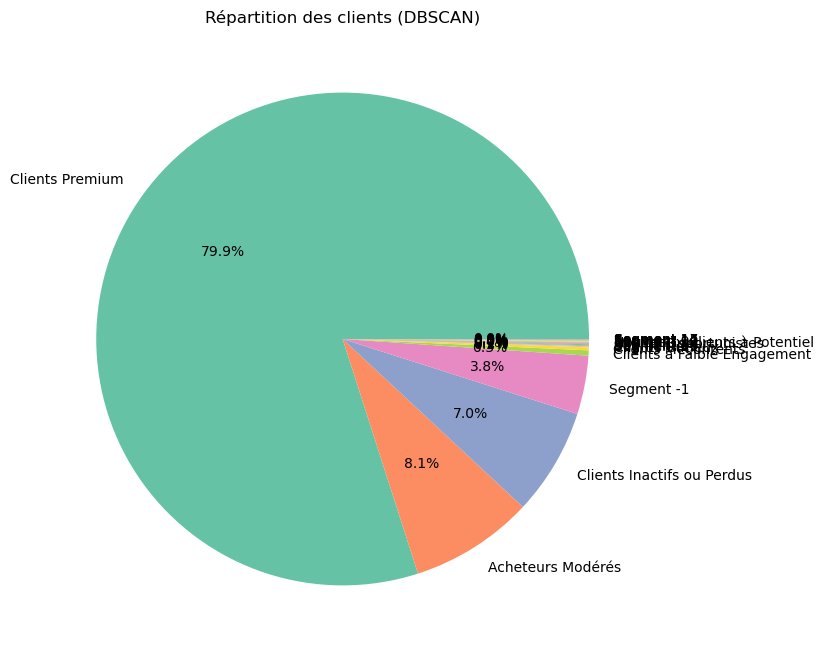

        recency                                                              \
          count        mean         std    min    25%    50%     75%    max   
Segment                                                                       
0        2470.0  289.982186  138.037995   53.0  192.0  273.0  368.75  744.0   
1         283.0  311.717314  158.386203   55.0  177.0  306.0  418.00  740.0   
2        6188.0  439.621202   95.644370  280.0  354.0  429.0  513.00  744.0   
3        7987.0  171.020784   72.523256   50.0  107.0  169.0  233.00  319.0   
4        1073.0  287.905871  110.885873   73.0  222.0  254.0  326.00  744.0   
5         165.0  290.533333  146.792060   50.0  184.0  271.0  378.00  743.0   
6        1417.0  291.169372  153.888505   50.0  163.0  271.0  403.00  641.0   

        monetary               ... avg_delivery_delay        total_items  \
           count         mean  ...                75%    max       count   
Segment                        ...                       

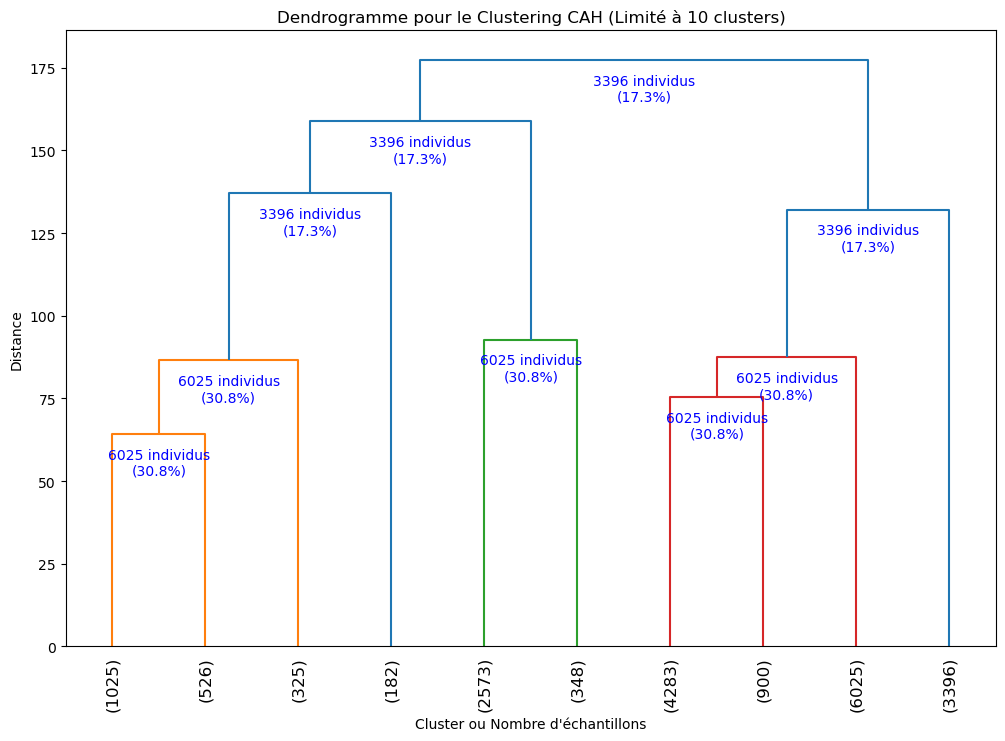

In [55]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


# Exemple de jeu de données RFM
X = rfm_sampled[['recency', 'monetary', 'avg_review_score', 'avg_delivery_delay', 'total_items']]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Imputation des NaN avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Paramètres de la grille KMeans
param_grid_kmeans = {
    'n_clusters': [5, 6, 7, 8, 9, 10],
    'init': ['k-means++', 'random'],
    'n_init': [3, 2, 5],
    'max_iter': [300, 325],
    'tol': [1e-4, 1e-3],
    'algorithm': ['lloyd', 'elkan']
}

best_kmeans_score = -1
best_kmeans_params = None
best_kmeans_labels = None

# Recherche des meilleurs paramètres KMeans
for params in ParameterGrid(param_grid_kmeans):
    kmeans = KMeans(
        n_clusters=params['n_clusters'],
        init=params['init'],
        n_init=params['n_init'],
        max_iter=params['max_iter'],
        tol=params['tol'],
        algorithm=params['algorithm'],
        random_state=10
    )
    cluster_labels = kmeans.fit_predict(X_scaled_imputed)
    silhouette_avg = silhouette_score(X_scaled_imputed, cluster_labels)
    
    if silhouette_avg > best_kmeans_score:
        best_kmeans_score = silhouette_avg
        best_kmeans_params = params
        best_kmeans_labels = cluster_labels

# Affichage des meilleurs paramètres et du score silhouette KMeans
print("Meilleurs paramètres KMeans:", best_kmeans_params)
print("Meilleur score silhouette KMeans:", best_kmeans_score)

# Ajout des labels KMeans dans le DataFrame
rfm_sampled['KMeans_Cluster'] = best_kmeans_labels

# Paramètres de la grille CAH
param_grid_cah = {
    'n_clusters': range(3, 10),
    'linkage': ['ward', 'complete', 'average', 'single'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

best_cah_score = -1
best_cah_params = None
best_cah_labels = None

# Recherche des meilleurs paramètres CAH
for params in ParameterGrid(param_grid_cah):
    if params['linkage'] == 'ward' and params['metric'] != 'euclidean':
        continue  # Passer cette combinaison de paramètres invalide
    
    cah = AgglomerativeClustering(
        n_clusters=params['n_clusters'],
        linkage=params['linkage'],
        metric=params['metric']
    )
    cluster_labels = cah.fit_predict(X_scaled_imputed)
    silhouette_avg = silhouette_score(X_scaled_imputed, cluster_labels)
    
    if silhouette_avg > best_cah_score:
        best_cah_score = silhouette_avg
        best_cah_params = params
        best_cah_labels = cluster_labels

# Affichage des meilleurs paramètres et du score silhouette CAH
print("Meilleurs paramètres CAH:", best_cah_params)
print("Meilleur score silhouette CAH:", best_cah_score)

# Ajout des labels CAH dans le DataFrame
rfm_sampled['CAH_Cluster'] = best_cah_labels

# Paramètres de la grille DBSCAN
param_grid_dbscan = {
    'eps': [0.5, 0.6, 0.7, 0.8],
    'min_samples': [3, 4, 5],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

best_dbscan_score = -1
best_dbscan_params = None
best_dbscan_labels = None

# Recherche des meilleurs paramètres DBSCAN
for params in ParameterGrid(param_grid_dbscan):
    dbscan = DBSCAN(
        eps=params['eps'],
        min_samples=params['min_samples'],
        metric=params['metric']
    )
    cluster_labels = dbscan.fit_predict(X_scaled_imputed)
    
    if len(np.unique(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(X_scaled_imputed, cluster_labels)
        
        if silhouette_avg > best_dbscan_score:
            best_dbscan_score = silhouette_avg
            best_dbscan_params = params
            best_dbscan_labels = cluster_labels

# Affichage des meilleurs paramètres et du score silhouette DBSCAN
print("Meilleurs paramètres DBSCAN:", best_dbscan_params)
print("Meilleur score silhouette DBSCAN:", best_dbscan_score)

# Ajout des labels DBSCAN dans le DataFrame
rfm_sampled['DBSCAN_Cluster'] = best_dbscan_labels

# Définition des segments de clients
segments = {
    0: "Clients Premium",
    1: "Acheteurs Modérés",
    2: "Clients Inactifs ou Perdus",
    3: "Nouveaux Clients à Potentiel",
    4: "Clients à Faible Engagement",
    5: "Clients Mécontents",
    6: "Clients Opportunistes",
    7: "Clients Curieux"
}

# Fonction d'affectation des segments
def assign_segments(row):
    cluster = row['KMeans_Cluster']
    return segments.get(cluster, np.nan)

# Application des segments
rfm_sampled['Segment'] = rfm_sampled.apply(assign_segments, axis=1)

# Fonction d'affichage des statistiques par segment
def display_segment_statistics(df, cluster_column):
    segment_stats = df.groupby(cluster_column)[
        ['recency', 'monetary', 'avg_review_score', 'avg_delivery_delay', 'total_items']
    ].describe()
    print(segment_stats)

# Treemaps pour KMeans
create_treemap(rfm_sampled, 'KMeans_Cluster', 'Répartition des clients (KMeans)')

# Treemaps pour CAH
create_treemap(rfm_sampled, 'CAH_Cluster', 'Répartition des clients (CAH)')

# Treemaps pour DBSCAN
create_treemap(rfm_sampled, 'DBSCAN_Cluster', 'Répartition des clients (DBSCAN)')

# Fonction de création du dendrogramme
def create_dendrogram(X_scaled, max_clusters=10):
    plt.figure(figsize=(12, 8))
    
    linked = linkage(X_scaled, method='ward')
    
    dendro = dendrogram(
        linked,
        truncate_mode='lastp',
        p=max_clusters,
        show_leaf_counts=True,
        orientation='top',
        distance_sort='descending',
        leaf_rotation=90
    )
    
    plt.title(f'Dendrogramme pour le Clustering CAH (Limité à {max_clusters} clusters)')
    plt.xlabel('Cluster ou Nombre d\'échantillons')
    plt.ylabel('Distance')
    
    cluster_labels = fcluster(linked, max_clusters, criterion='maxclust')
    unique, counts = np.unique(cluster_labels, return_counts=True)
    total = np.sum(counts)
    
    cluster_info = dict(zip(unique, counts))
    for i, d in zip(dendro['icoord'], dendro['dcoord']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        cluster_id = fcluster(linked, t=y, criterion='distance')
        num_in_cluster = np.sum(cluster_labels == cluster_id[0])
        percentage = (num_in_cluster / total) * 100
        
        plt.annotate(f'{num_in_cluster} individus\n({percentage:.1f}%)', (x, y), 
                     xytext=(0, -10), textcoords='offset points',
                     va='top', ha='center', fontsize=10, color='blue')
    
    plt.show()

# Affichage du dendrogramme
create_dendrogram(X_scaled_imputed, max_clusters=10)


  Run  Meilleurs paramètres KMeans                                                                                   Score de silhouette
-----  ----------------------------------------------------------------------------------------------------------  ---------------------
    1  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 7, 'n_init': 3, 'tol': 0.001}                 0.312648
    2  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 7, 'n_init': 5, 'tol': 0.0001}                0.312468
    3  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 7, 'n_init': 5, 'tol': 0.0001}                0.312638
    4  {'algorithm': 'lloyd', 'init': 'random', 'max_iter': 300, 'n_clusters': 8, 'n_init': 2, 'tol': 0.0001}                   0.314522
    5  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 10, 'n_init': 5, 'tol': 0.0001}               0.306906
Meilleurs paramètres KMeans après 5 runs:

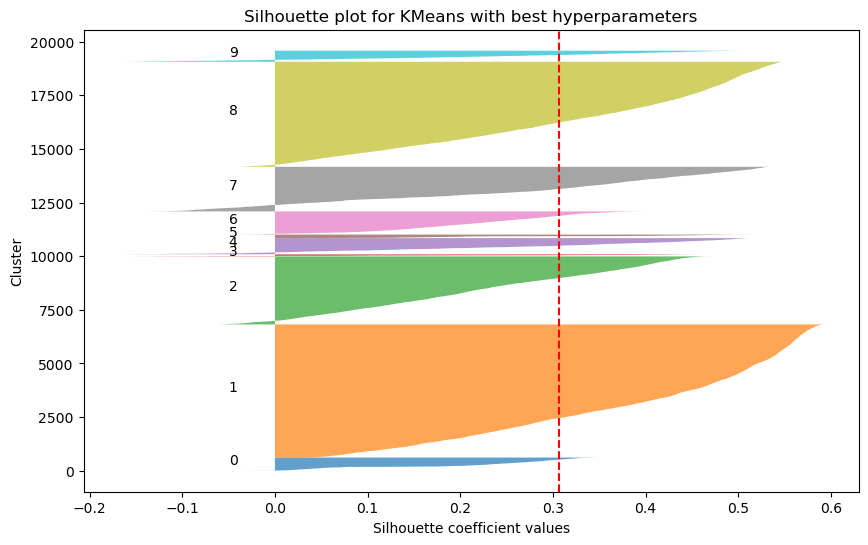

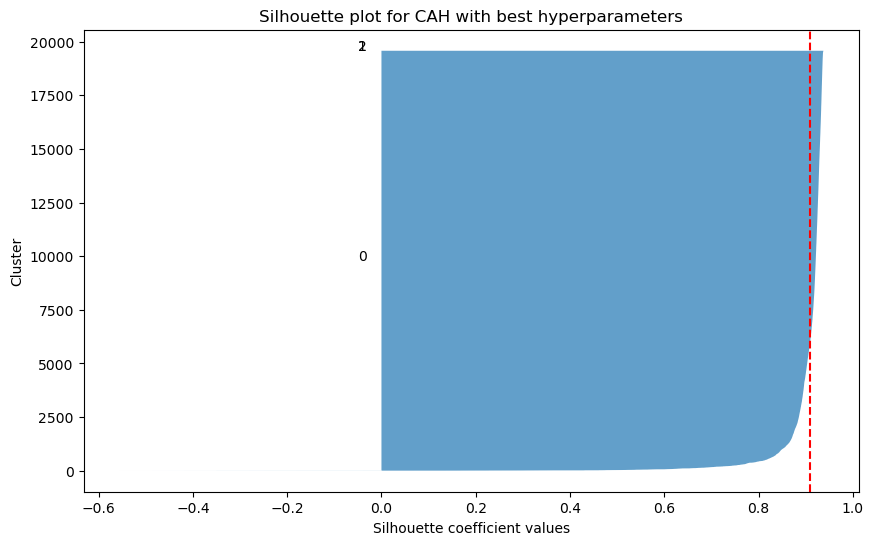

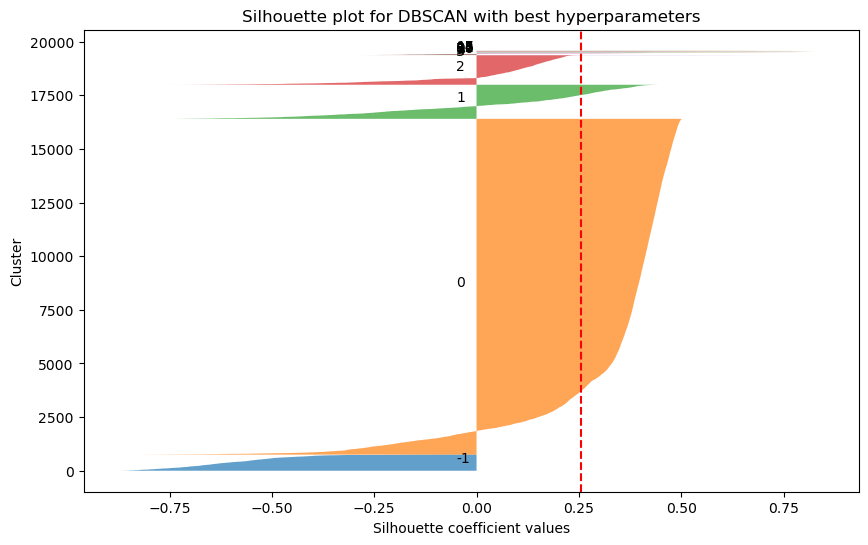

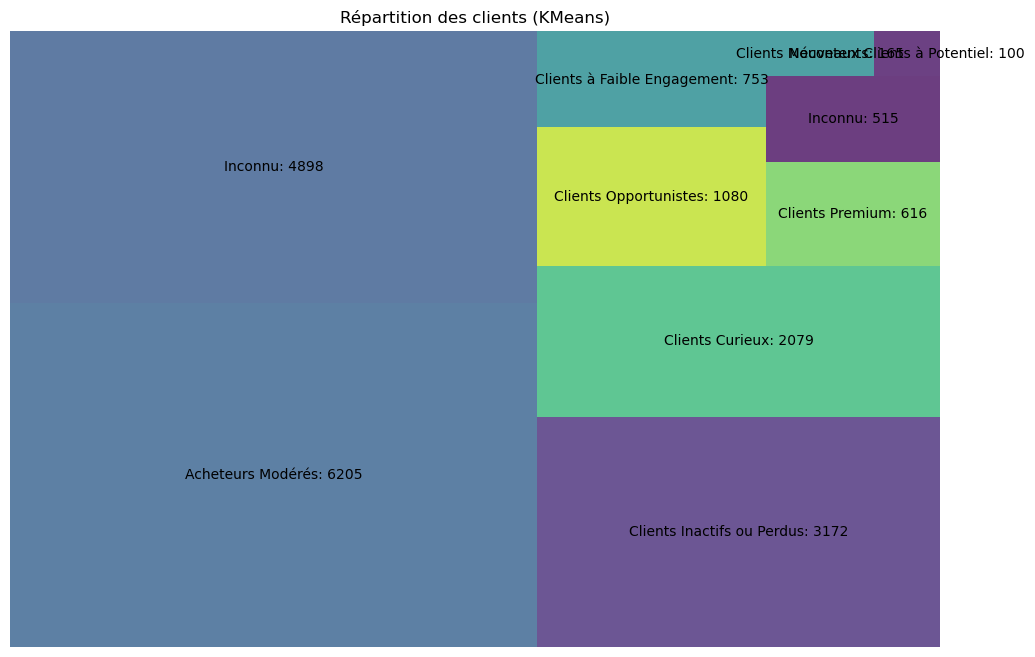

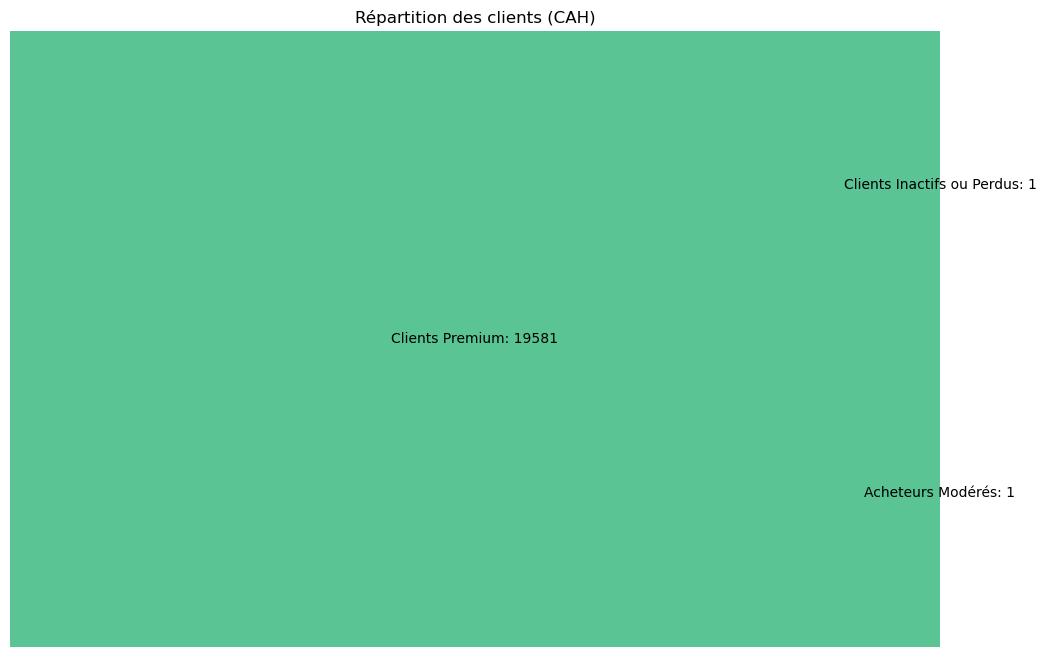

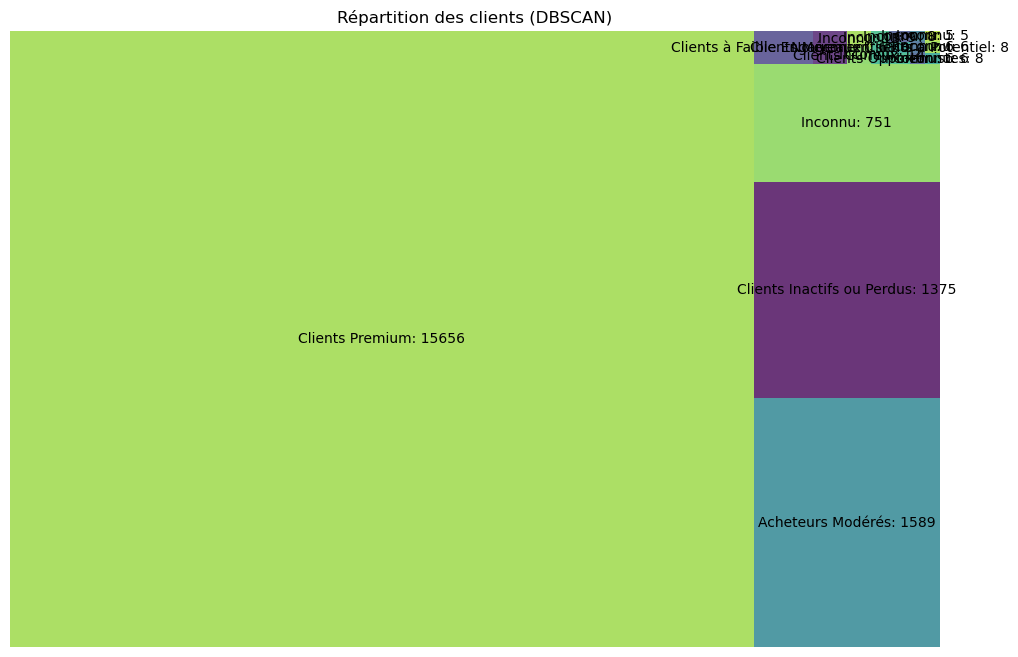

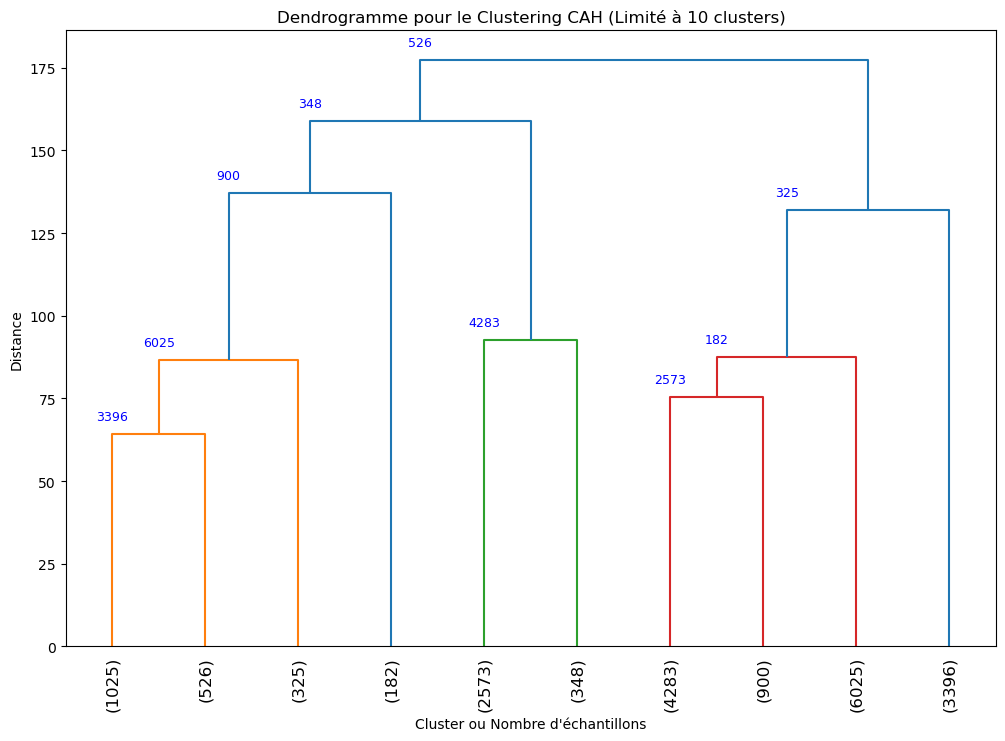

In [91]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import squarify
from tabulate import tabulate

# Exemple de jeu de données RFM
X = rfm_sampled[['recency', 'monetary', 'avg_review_score', 'avg_delivery_delay', 'total_items']]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Imputation des NaN avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Paramètres de la grille KMeans
param_grid_kmeans = {
    'n_clusters': [5, 6, 7, 8, 9, 10],
    'init': ['k-means++', 'random'],
    'n_init': [3, 2, 5],
    'max_iter': [300, 325],
    'tol': [1e-4, 1e-3],
    'algorithm': ['lloyd', 'elkan']
}

# Test de stabilité à l'initialisation
stability_results = []
for run in range(5):
    best_kmeans_score = -1
    best_kmeans_params = None
    best_kmeans_labels = None
    
    for params in ParameterGrid(param_grid_kmeans):
        kmeans = KMeans(
            n_clusters=params['n_clusters'],
            init=params['init'],
            n_init=params['n_init'],
            max_iter=params['max_iter'],
            tol=params['tol'],
            algorithm=params['algorithm'],
            random_state=10 + run  # Changement de seed pour chaque exécution
        )
        cluster_labels = kmeans.fit_predict(X_scaled_imputed)
        silhouette_avg = silhouette_score(X_scaled_imputed, cluster_labels)

        if silhouette_avg > best_kmeans_score:
            best_kmeans_score = silhouette_avg
            best_kmeans_params = params
            best_kmeans_labels = cluster_labels
    
    # Ajouter les résultats pour ce run
    stability_results.append([run + 1, best_kmeans_params, best_kmeans_score])

# Affichage des résultats de stabilité
print(tabulate(stability_results, headers=["Run", "Meilleurs paramètres KMeans", "Score de silhouette"]))

# Affichage du meilleur score silhouette pour KMeans
print("Meilleurs paramètres KMeans après 5 runs:", best_kmeans_params)
print("Meilleur score silhouette KMeans:", best_kmeans_score)

# Ajout des labels KMeans dans le DataFrame
rfm_sampled['KMeans_Cluster'] = best_kmeans_labels

# Clustering CAH
param_grid_cah = {
    'n_clusters': range(3, 10),
    'linkage': ['ward', 'complete', 'average', 'single'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

best_cah_score = -1
best_cah_params = None
best_cah_labels = None

for n_clusters in range(3, 10):
    for params in ParameterGrid(param_grid_cah):
        if params['linkage'] == 'ward' and params['metric'] != 'euclidean':
            continue
        cah = AgglomerativeClustering(n_clusters=n_clusters, linkage=params['linkage'], metric=params['metric'])
        cluster_labels = cah.fit_predict(X_scaled_imputed)
        silhouette_avg = silhouette_score(X_scaled_imputed, cluster_labels)
        
        if silhouette_avg > best_cah_score:
            best_cah_score = silhouette_avg
            best_cah_params = params
            best_cah_labels = cluster_labels

# Affichage des meilleurs paramètres et du score silhouette CAH
print("Meilleurs paramètres CAH:", best_cah_params)
print("Meilleur score silhouette CAH:", best_cah_score)

# Ajout des labels CAH dans le DataFrame
rfm_sampled['CAH_Cluster'] = best_cah_labels

# Clustering DBSCAN
param_grid_dbscan = {
    'eps': [0.5, 0.6, 0.7, 0.8],
    'min_samples': [3, 4, 5],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

best_dbscan_score = -1
best_dbscan_params = None
best_dbscan_labels = None

for params in ParameterGrid(param_grid_dbscan):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'], metric=params['metric'])
    cluster_labels = dbscan.fit_predict(X_scaled_imputed)
    
    if len(np.unique(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(X_scaled_imputed, cluster_labels)
        
        if silhouette_avg > best_dbscan_score:
            best_dbscan_score = silhouette_avg
            best_dbscan_params = params
            best_dbscan_labels = cluster_labels

# Affichage des meilleurs paramètres et du score silhouette DBSCAN
print("Meilleurs paramètres DBSCAN:", best_dbscan_params)
print("Meilleur score silhouette DBSCAN:", best_dbscan_score)

# Ajout des labels DBSCAN dans le DataFrame
rfm_sampled['DBSCAN_Cluster'] = best_dbscan_labels

# Tracé du score de silhouette pour les meilleurs hyperparamètres

def plot_silhouette(X, labels, model_name):
    silhouette_vals = silhouette_samples(X, labels)
    avg_silhouette = np.mean(silhouette_vals)
    
    plt.figure(figsize=(10, 6))
    y_lower, y_upper = 0, 0
    for i in np.unique(labels):
        ith_silhouette_vals = silhouette_vals[labels == i]
        ith_silhouette_vals.sort()
        y_upper += len(ith_silhouette_vals)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_silhouette_vals, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * len(ith_silhouette_vals), str(i))
        y_lower = y_upper
    plt.axvline(avg_silhouette, color="red", linestyle="--")
    plt.title(f"Silhouette plot for {model_name} with best hyperparameters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster")
    plt.show()

# Tracer les scores de silhouette pour les meilleurs modèles
plot_silhouette(X_scaled_imputed, best_kmeans_labels, "KMeans")
plot_silhouette(X_scaled_imputed, best_cah_labels, "CAH")
plot_silhouette(X_scaled_imputed, best_dbscan_labels, "DBSCAN")

# Treemaps
segments = {
    0: "Clients Premium",
    1: "Acheteurs Modérés",
    2: "Clients Inactifs ou Perdus",
    3: "Nouveaux Clients à Potentiel",
    4: "Clients à Faible Engagement",
    5: "Clients Mécontents",
    6: "Clients Opportunistes",
    7: "Clients Curieux"
}

def create_treemap(df, cluster_column, title):
    segment_counts = df[cluster_column].value_counts()
    sizes = segment_counts.values
    labels = [f"{segments.get(i, 'Inconnu')}: {sizes[idx]}" for idx, i in enumerate(segment_counts.index)]
    
    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=sizes, label=labels, alpha=.8)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Treemaps pour KMeans, CAH et DBSCAN
create_treemap(rfm_sampled, 'KMeans_Cluster', 'Répartition des clients (KMeans)')
create_treemap(rfm_sampled, 'CAH_Cluster', 'Répartition des clients (CAH)')
create_treemap(rfm_sampled, 'DBSCAN_Cluster', 'Répartition des clients (DBSCAN)')

# Dendrogramme pour CAH avec un maximum de 10 clusters
def create_dendrogram(X_scaled, max_clusters=10):
    plt.figure(figsize=(12, 8))
    linked = linkage(X_scaled, method='ward')
    dendro = dendrogram(
        linked,
        truncate_mode='lastp',
        p=max_clusters,
        show_leaf_counts=True,
        orientation='top',
        distance_sort='descending',
        leaf_rotation=90.,
    )
    
    cluster_labels = fcluster(linked, max_clusters, criterion='maxclust')
    counts = np.bincount(cluster_labels)[1:]  # Ne pas compter le cluster 0 (sans assignation)
    
    for i, (x, y) in enumerate(zip(dendro['icoord'], dendro['dcoord'])):
        if i < len(counts):
            plt.annotate(f"{counts[i]}", (x[1], y[1]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='blue')

    plt.title(f'Dendrogramme pour le Clustering CAH (Limité à {max_clusters} clusters)')
    plt.xlabel('Cluster ou Nombre d\'échantillons')
    plt.ylabel('Distance')
    plt.show()

create_dendrogram(X_scaled_imputed, max_clusters=10)


# Seulement Kmean

  Run  Meilleurs paramètres KMeans                                                                                   Score de silhouette
-----  ----------------------------------------------------------------------------------------------------------  ---------------------
    1  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 7, 'n_init': 3, 'tol': 0.001}                 0.312648
    2  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 7, 'n_init': 5, 'tol': 0.0001}                0.312468
    3  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 7, 'n_init': 5, 'tol': 0.0001}                0.312638
    4  {'algorithm': 'lloyd', 'init': 'random', 'max_iter': 300, 'n_clusters': 8, 'n_init': 2, 'tol': 0.0001}                   0.314522
    5  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 10, 'n_init': 5, 'tol': 0.0001}               0.306906
Meilleurs paramètres KMeans après 5 runs:

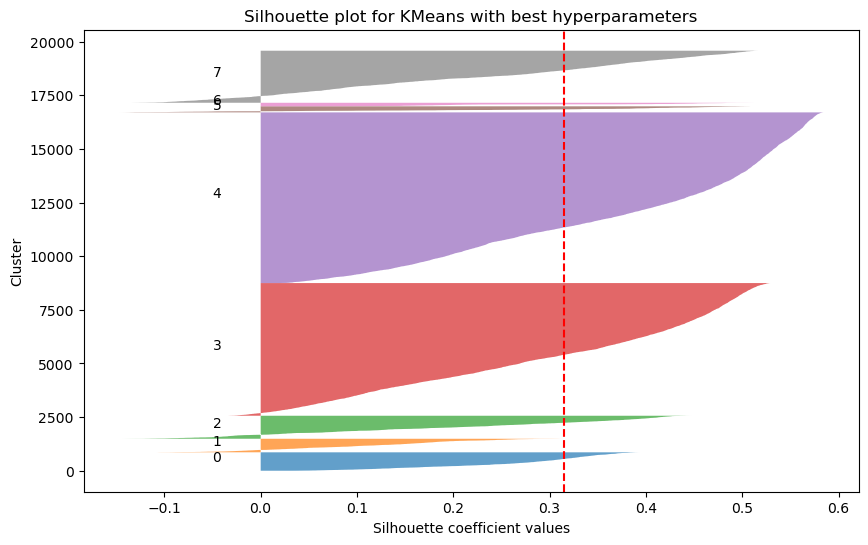

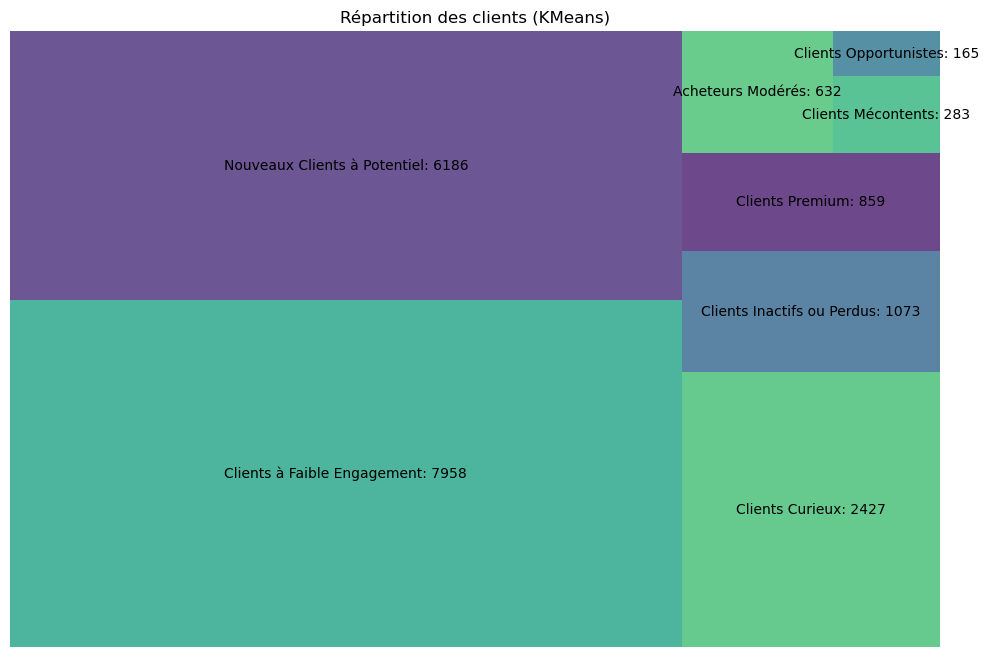

In [94]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import squarify
from tabulate import tabulate

# Exemple de jeu de données RFM
X = rfm_sampled[['recency', 'monetary', 'avg_review_score', 'avg_delivery_delay', 'total_items']]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Imputation des NaN avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Paramètres de la grille KMeans
param_grid_kmeans = {
    'n_clusters': [5, 6, 7, 8, 9, 10],
    'init': ['k-means++', 'random'],
    'n_init': [3, 2, 5],
    'max_iter': [300, 325],
    'tol': [1e-4, 1e-3],
    'algorithm': ['lloyd', 'elkan']
}

# Test de stabilité à l'initialisation
stability_results = []
best_kmeans_score_overall = -1
best_kmeans_labels_overall = None

for run in range(5):
    best_kmeans_score = -1
    best_kmeans_params = None
    best_kmeans_labels = None
    for params in ParameterGrid(param_grid_kmeans):
        kmeans = KMeans(
            n_clusters=params['n_clusters'],
            init=params['init'],
            n_init=params['n_init'],
            max_iter=params['max_iter'],
            tol=params['tol'],
            algorithm=params['algorithm'],
            random_state=10 + run  # Changement de seed pour chaque exécution
        )
        cluster_labels = kmeans.fit_predict(X_scaled_imputed)
        silhouette_avg = silhouette_score(X_scaled_imputed, cluster_labels)
        
        if silhouette_avg > best_kmeans_score:
            best_kmeans_score = silhouette_avg
            best_kmeans_params = params
            best_kmeans_labels = cluster_labels
    
    # Enregistrer le meilleur score pour ce run
    stability_results.append([run + 1, best_kmeans_params, best_kmeans_score])
    
    # Garder le meilleur score global
    if best_kmeans_score > best_kmeans_score_overall:
        best_kmeans_score_overall = best_kmeans_score
        best_kmeans_labels_overall = best_kmeans_labels

# Affichage des résultats de stabilité avec tabulate
print(tabulate(stability_results, headers=["Run", "Meilleurs paramètres KMeans", "Score de silhouette"]))

# Affichage du meilleur score silhouette pour KMeans après 5 exécutions
print("Meilleurs paramètres KMeans après 5 runs:", best_kmeans_params)
print("Meilleur score silhouette KMeans:", best_kmeans_score_overall)

# Ajout des labels KMeans dans le DataFrame
rfm_sampled['KMeans_Cluster'] = best_kmeans_labels_overall

# Tracé du score de silhouette pour les meilleurs hyperparamètres
def plot_silhouette(X, labels, model_name):
    silhouette_vals = silhouette_samples(X, labels)
    avg_silhouette = np.mean(silhouette_vals)
    
    plt.figure(figsize=(10, 6))
    y_lower, y_upper = 0, 0
    for i in np.unique(labels):
        ith_silhouette_vals = silhouette_vals[labels == i]
        ith_silhouette_vals.sort()
        y_upper += len(ith_silhouette_vals)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_silhouette_vals, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * len(ith_silhouette_vals), str(i))
        y_lower = y_upper
    plt.axvline(avg_silhouette, color="red", linestyle="--")
    plt.title(f"Silhouette plot for {model_name} with best hyperparameters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster")
    plt.show()

# Tracer le score de silhouette pour le meilleur modèle KMeans
plot_silhouette(X_scaled_imputed, best_kmeans_labels_overall, "KMeans")

# Treemap

# Segments personnalisés
segments = {
    0: "Clients Premium",
    1: "Acheteurs Modérés",
    2: "Clients Inactifs ou Perdus",
    3: "Nouveaux Clients à Potentiel",
    4: "Clients à Faible Engagement",
    5: "Clients Mécontents",
    6: "Clients Opportunistes",
    7: "Clients Curieux"
}

def create_treemap(df, cluster_column, title):
    segment_counts = df[cluster_column].value_counts()
    sizes = segment_counts.values
    labels = [f"{segments.get(i, 'Inconnu')}: {sizes[idx]}" for idx, i in enumerate(segment_counts.index)]
    
    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=sizes, label=labels, alpha=.8)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Treemap pour KMeans
create_treemap(rfm_sampled, 'KMeans_Cluster', 'Répartition des clients (KMeans)')


# V0

## 1 an

Date de la première commande : 2016-09-04 21:15:19
Nombre de commandes dans la période d'un an : 23810
Date de la dernière commande dans la période d'un an : 2017-09-04 21:13:36
  Run  Meilleurs paramètres KMeans                                                                                  Score de silhouette
-----  ---------------------------------------------------------------------------------------------------------  ---------------------
    1  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 7, 'n_init': 2, 'tol': 0.001}                0.318656
    2  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 9, 'n_init': 3, 'tol': 0.0001}               0.326662
    3  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 9, 'n_init': 3, 'tol': 0.001}                0.326854
    4  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 9, 'n_init': 2, 'tol': 0.0001}               0.325581
    5 

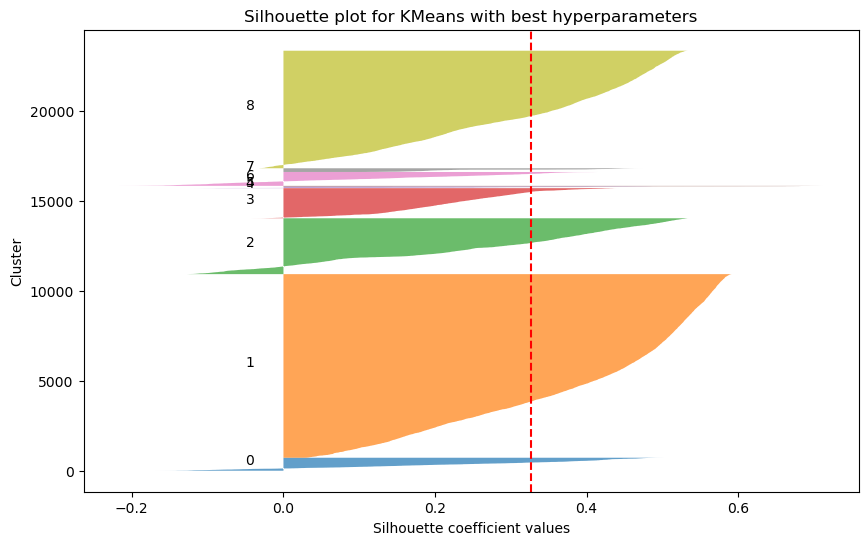

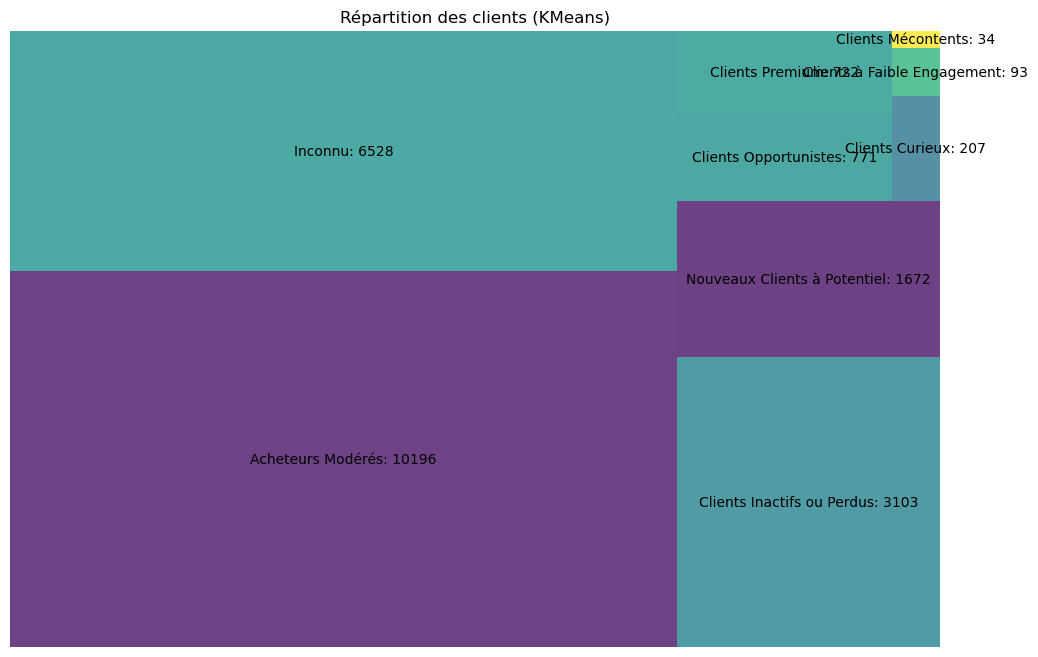

In [131]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import squarify
from tabulate import tabulate

# Assurez-vous que 'order_purchase_timestamp' et 'order_delivered_customer_date' sont au format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# 1. Date de la première commande dans le dataset
first_order_date = orders['order_purchase_timestamp'].min()
print(f"Date de la première commande : {first_order_date}")

# 2. Filtrer les commandes dans une période d'un an à partir de la première commande
one_year_later = first_order_date + pd.DateOffset(years=1)
filtered_orders = orders[(orders['order_purchase_timestamp'] >= first_order_date) &
                         (orders['order_purchase_timestamp'] < one_year_later)]

# Vérifier le nombre de commandes filtrées
print(f"Nombre de commandes dans la période d'un an : {filtered_orders.shape[0]}")

# Afficher la date de la dernière commande dans la période filtrée
last_order_date_in_period = filtered_orders['order_purchase_timestamp'].max()
print(f"Date de la dernière commande dans la période d'un an : {last_order_date_in_period}")

# Récence : Calculer le nombre de jours depuis la dernière commande pour chaque client
recency_df = filtered_orders.groupby('customer_id').agg(
    last_purchase=('order_purchase_timestamp', 'max')).reset_index()
recency_df['recency'] = (one_year_later - recency_df['last_purchase']).dt.days

# Montant : Calculer le montant total dépensé par client à partir de la table order_items (prix * quantité)
monetary_df = order_items.groupby('order_id').agg(order_value=('price', 'sum')).reset_index()
monetary_df = pd.merge(filtered_orders[['order_id', 'customer_id']], monetary_df, on='order_id')
monetary_df = monetary_df.groupby('customer_id').agg(monetary=('order_value', 'sum')).reset_index()

# Score des avis : Calculer le score moyen des avis par client
review_score_df = order_reviews.groupby('order_id').agg(avg_review_score=('review_score', 'mean')).reset_index()
review_score_df = pd.merge(filtered_orders[['order_id', 'customer_id']], review_score_df, on='order_id')
review_score_df = review_score_df.groupby('customer_id').agg(avg_review_score=('avg_review_score', 'mean')).reset_index()

# Délai de livraison : Calculer le délai de livraison moyen par client (en excluant les valeurs manquantes)
delivery_delay_df = filtered_orders.copy()
delivery_delay_df['delivery_delay'] = (filtered_orders['order_delivered_customer_date'] - 
                                        filtered_orders['order_purchase_timestamp']).dt.days
delivery_delay_df = delivery_delay_df[~delivery_delay_df['delivery_delay'].isna()]  # Supprimer les valeurs manquantes
delivery_delay_df = delivery_delay_df.groupby('customer_id').agg(avg_delivery_delay=('delivery_delay', 'mean')).reset_index()

# Nombre d'articles : Calculer le nombre total d'articles commandés par client
items_df = order_items.groupby('order_id').agg(total_items=('order_item_id', 'count')).reset_index()
items_df = pd.merge(filtered_orders[['order_id', 'customer_id']], items_df, on='order_id')
items_df = items_df.groupby('customer_id').agg(total_items=('total_items', 'sum')).reset_index()

# Fusionner les variables RFM et les nouvelles variables en une seule table
rfm_df = pd.merge(recency_df[['customer_id', 'recency']], monetary_df, on='customer_id')
rfm_df = pd.merge(rfm_df, review_score_df, on='customer_id')
rfm_df = pd.merge(rfm_df, delivery_delay_df, on='customer_id', how='left')  # Utiliser une jointure gauche pour conserver tous les clients
rfm_df = pd.merge(rfm_df, items_df, on='customer_id')

# Exemple de jeu de données RFM
X = rfm_df[['recency', 'monetary', 'avg_review_score', 'avg_delivery_delay', 'total_items']]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Imputation des NaN avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Paramètres de la grille KMeans
param_grid_kmeans = {
    'n_clusters': [5, 6, 7, 8, 9, 10],
    'init': ['k-means++', 'random'],
    'n_init': [3, 2, 5],
    'max_iter': [300, 325],
    'tol': [1e-4, 1e-3],
    'algorithm': ['lloyd', 'elkan']
}

# Test de stabilité à l'initialisation
stability_results = []
best_kmeans_score_overall = -1
best_kmeans_labels_overall = None

for run in range(5):
    best_kmeans_score = -1
    best_kmeans_params = None
    best_kmeans_labels = None
    for params in ParameterGrid(param_grid_kmeans):
        kmeans = KMeans(
            n_clusters=params['n_clusters'],
            init=params['init'],
            n_init=params['n_init'],
            max_iter=params['max_iter'],
            tol=params['tol'],
            algorithm=params['algorithm'],
            random_state=10 + run  # Changement de seed pour chaque exécution
        )
        cluster_labels = kmeans.fit_predict(X_scaled_imputed)
        silhouette_avg = silhouette_score(X_scaled_imputed, cluster_labels)
        
        if silhouette_avg > best_kmeans_score:
            best_kmeans_score = silhouette_avg
            best_kmeans_params = params
            best_kmeans_labels = cluster_labels
    
    # Enregistrer le meilleur score pour ce run
    stability_results.append([run + 1, best_kmeans_params, best_kmeans_score])
    
    # Garder le meilleur score global
    if best_kmeans_score > best_kmeans_score_overall:
        best_kmeans_score_overall = best_kmeans_score
        best_kmeans_labels_overall = best_kmeans_labels

# Affichage des résultats de stabilité avec tabulate
print(tabulate(stability_results, headers=["Run", "Meilleurs paramètres KMeans", "Score de silhouette"]))

# Affichage du meilleur score silhouette pour KMeans après 5 exécutions
print("Meilleurs paramètres KMeans après 5 runs:", best_kmeans_params)
print("Meilleur score silhouette KMeans:", best_kmeans_score_overall)

# Ajout des labels KMeans dans le DataFrame
rfm_df['KMeans_Cluster'] = best_kmeans_labels_overall

# Tracé du score de silhouette pour les meilleurs hyperparamètres
def plot_silhouette(X, labels, model_name):
    silhouette_vals = silhouette_samples(X, labels)
    avg_silhouette = np.mean(silhouette_vals)
    
    plt.figure(figsize=(10, 6))
    y_lower, y_upper = 0, 0
    for i in np.unique(labels):
        ith_silhouette_vals = silhouette_vals[labels == i]
        ith_silhouette_vals.sort()
        y_upper += len(ith_silhouette_vals)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_silhouette_vals, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * len(ith_silhouette_vals), str(i))
        y_lower = y_upper
    plt.axvline(avg_silhouette, color="red", linestyle="--")
    plt.title(f"Silhouette plot for KMeans with best hyperparameters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster")
    plt.show()

# Tracer le score de silhouette pour le meilleur modèle KMeans
plot_silhouette(X_scaled_imputed, best_kmeans_labels_overall, "KMeans")

# ----------------------------- Treemap pour KMeans -----------------------------
# Segments personnalisés
segments = {
    0: "Clients Premium",
    1: "Acheteurs Modérés",
    2: "Clients Inactifs ou Perdus",
    3: "Nouveaux Clients à Potentiel",
    4: "Clients à Faible Engagement",
    5: "Clients Mécontents",
    6: "Clients Opportunistes",
    7: "Clients Curieux"
}

def create_treemap(df, cluster_column, title):
    segment_counts = df[cluster_column].value_counts()
    sizes = segment_counts.values
    labels = [f"{segments.get(i, 'Inconnu')}: {sizes[idx]}" for idx, i in enumerate(segment_counts.index)]
    
    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=sizes, label=labels, alpha=.8)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Treemap pour KMeans
create_treemap(rfm_df, 'KMeans_Cluster', "Treemap des segments clients - KMeans")


## Evolution

Date de la première commande : 2016-09-04 21:15:19
Nombre de commandes dans la période d'un an : 23810
Date de la dernière commande dans la période d'un an : 2017-09-04 21:13:36
  Run  Meilleurs paramètres KMeans                                                                                  Score de silhouette
-----  ---------------------------------------------------------------------------------------------------------  ---------------------
    1  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 7, 'n_init': 2, 'tol': 0.001}                0.318656
    2  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 9, 'n_init': 3, 'tol': 0.0001}               0.326662
    3  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 9, 'n_init': 3, 'tol': 0.001}                0.326854
    4  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 9, 'n_init': 2, 'tol': 0.0001}               0.325581
    5 

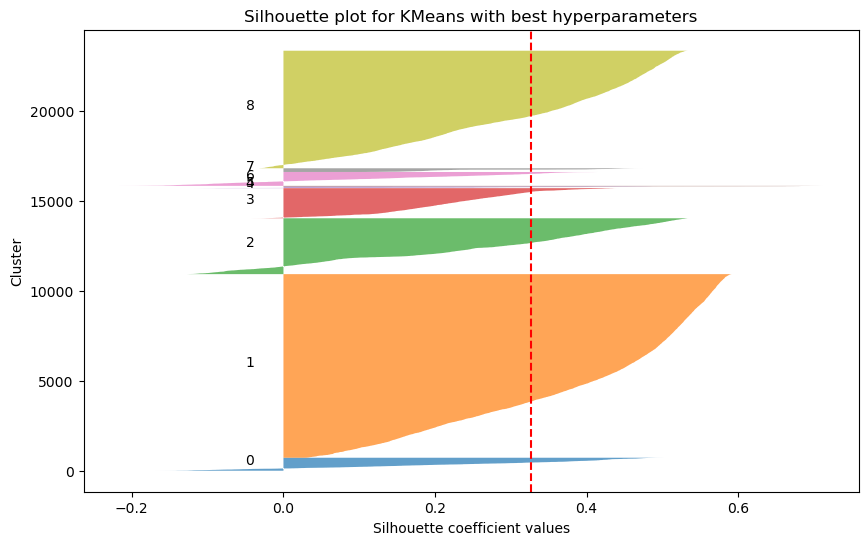

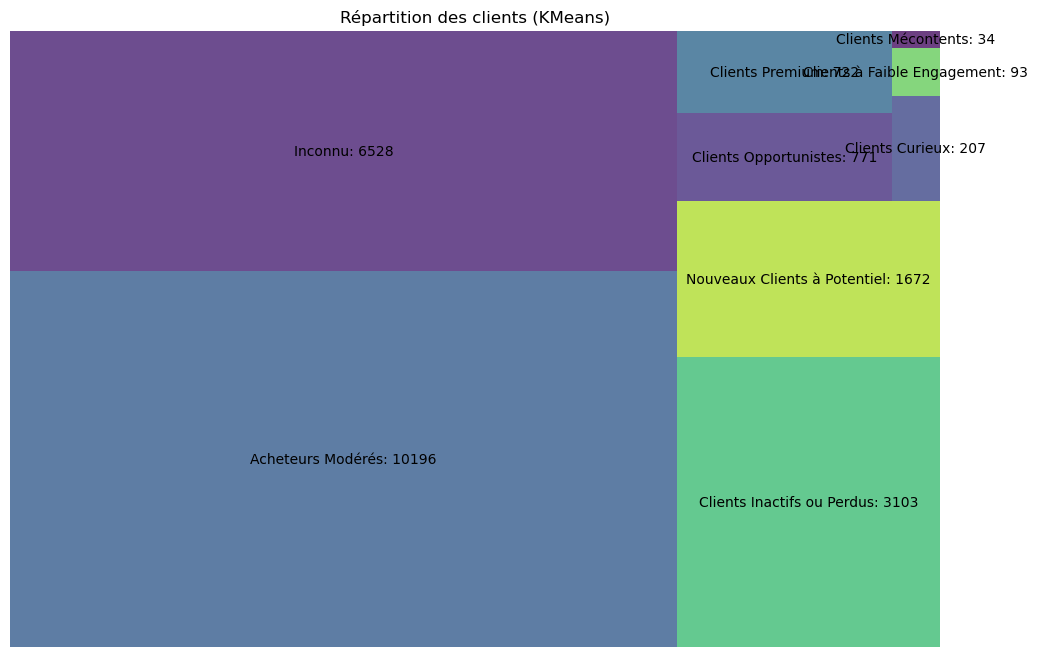

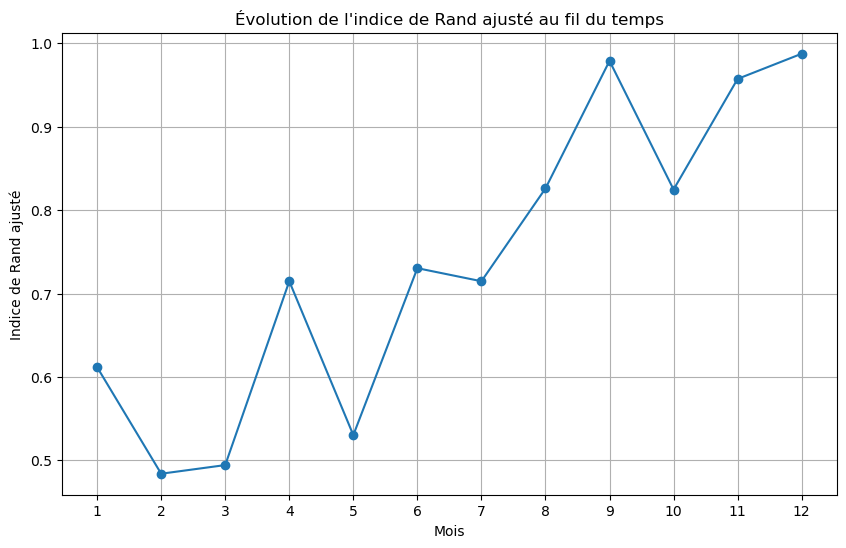

Période      Indice de Rand ajusté
---------  -----------------------
Mois 1                    0.611703
Mois 2                    0.483953
Mois 3                    0.494318
Mois 4                    0.714691
Mois 5                    0.530267
Mois 6                    0.730368


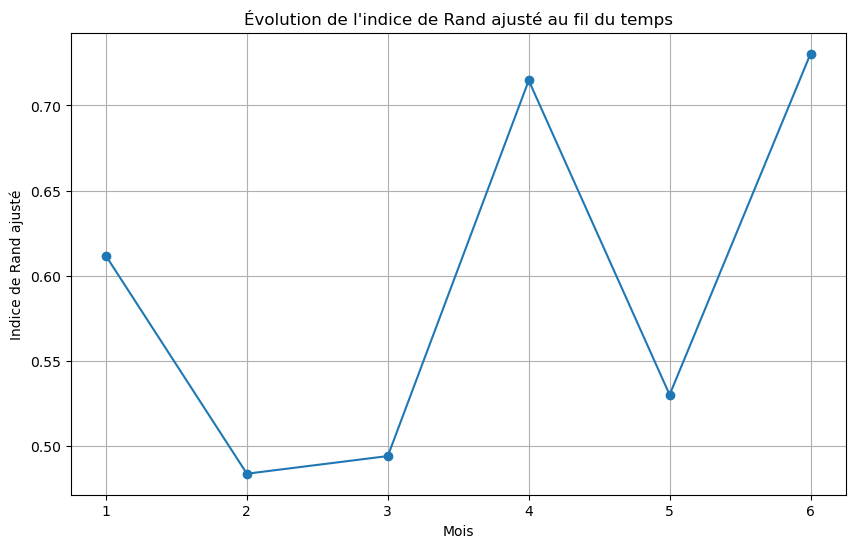

In [152]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import squarify
from tabulate import tabulate
from sklearn.metrics import adjusted_rand_score
from datetime import datetime

# Assurez-vous que 'order_purchase_timestamp' et 'order_delivered_customer_date' sont au format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# 1. Date de la première commande dans le dataset
first_order_date = orders['order_purchase_timestamp'].min()
print(f"Date de la première commande : {first_order_date}")

# 2. Filtrer les commandes dans une période d'un an à partir de la première commande
one_year_later = first_order_date + pd.DateOffset(years=1)
filtered_orders = orders[(orders['order_purchase_timestamp'] >= first_order_date) & 
                         (orders['order_purchase_timestamp'] < one_year_later)]

# Vérifier le nombre de commandes filtrées
print(f"Nombre de commandes dans la période d'un an : {filtered_orders.shape[0]}")

# Afficher la date de la dernière commande dans la période filtrée
last_order_date_in_period = filtered_orders['order_purchase_timestamp'].max()
print(f"Date de la dernière commande dans la période d'un an : {last_order_date_in_period}")

# Récence : Calculer le nombre de jours depuis la dernière commande pour chaque client
recency_df = filtered_orders.groupby('customer_id').agg(
    last_purchase=('order_purchase_timestamp', 'max')
).reset_index()
recency_df['recency'] = (one_year_later - recency_df['last_purchase']).dt.days

# Montant : Calculer le montant total dépensé par client à partir de la table order_items (prix * quantité)
monetary_df = order_items.groupby('order_id').agg(
    order_value=('price', 'sum')
).reset_index()
monetary_df = pd.merge(filtered_orders[['order_id', 'customer_id']], monetary_df, on='order_id')
monetary_df = monetary_df.groupby('customer_id').agg(
    monetary=('order_value', 'sum')
).reset_index()

# Score des avis : Calculer le score moyen des avis par client
review_score_df = order_reviews.groupby('order_id').agg(
    avg_review_score=('review_score', 'mean')
).reset_index()
review_score_df = pd.merge(filtered_orders[['order_id', 'customer_id']], review_score_df, on='order_id')
review_score_df = review_score_df.groupby('customer_id').agg(
    avg_review_score=('avg_review_score', 'mean')
).reset_index()

# Délai de livraison : Calculer le délai de livraison moyen par client (en excluant les valeurs manquantes)
delivery_delay_df = filtered_orders.copy()
delivery_delay_df['delivery_delay'] = (filtered_orders['order_delivered_customer_date'] - 
                                        filtered_orders['order_purchase_timestamp']).dt.days
delivery_delay_df = delivery_delay_df[~delivery_delay_df['delivery_delay'].isna()]  # Supprimer les valeurs manquantes
delivery_delay_df = delivery_delay_df.groupby('customer_id').agg(
    avg_delivery_delay=('delivery_delay', 'mean')
).reset_index()

# Nombre d'articles : Calculer le nombre total d'articles commandés par client
items_df = order_items.groupby('order_id').agg(
    total_items=('order_item_id', 'count')
).reset_index()
items_df = pd.merge(filtered_orders[['order_id', 'customer_id']], items_df, on='order_id')
items_df = items_df.groupby('customer_id').agg(
    total_items=('total_items', 'sum')
).reset_index()

# Fusionner les variables RFM et les nouvelles variables en une seule table
rfm_df = pd.merge(recency_df[['customer_id', 'recency']], monetary_df, on='customer_id')
rfm_df = pd.merge(rfm_df, review_score_df, on='customer_id')
rfm_df = pd.merge(rfm_df, delivery_delay_df, on='customer_id', how='left')  # Utiliser une jointure gauche pour conserver tous les clients
rfm_df = pd.merge(rfm_df, items_df, on='customer_id')

# Exemple de jeu de données RFM
X = rfm_df[['recency', 'monetary', 'avg_review_score', 'avg_delivery_delay', 'total_items']]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Imputation des NaN avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Paramètres de la grille KMeans
param_grid_kmeans = {
    'n_clusters': [5, 6, 7, 8, 9, 10],
    'init': ['k-means++', 'random'],
    'n_init': [3, 2, 5],
    'max_iter': [300, 325],
    'tol': [1e-4, 1e-3],
    'algorithm': ['lloyd', 'elkan']
}

# Test de stabilité à l'initialisation
stability_results = []
best_kmeans_score_overall = -1
best_kmeans_labels_overall = None

for run in range(5):
    best_kmeans_score = -1
    best_kmeans_params = None
    best_kmeans_labels = None
    for params in ParameterGrid(param_grid_kmeans):
        kmeans = KMeans(
            n_clusters=params['n_clusters'],
            init=params['init'],
            n_init=params['n_init'],
            max_iter=params['max_iter'],
            tol=params['tol'],
            algorithm=params['algorithm'],
            random_state=10 + run  # Changement de seed pour chaque exécution
        )
        cluster_labels = kmeans.fit_predict(X_scaled_imputed)
        silhouette_avg = silhouette_score(X_scaled_imputed, cluster_labels)

        if silhouette_avg > best_kmeans_score:
            best_kmeans_score = silhouette_avg
            best_kmeans_params = params
            best_kmeans_labels = cluster_labels

    # Enregistrer le meilleur score pour ce run
    stability_results.append([run + 1, best_kmeans_params, best_kmeans_score])

    # Garder le meilleur score global
    if best_kmeans_score > best_kmeans_score_overall:
        best_kmeans_score_overall = best_kmeans_score
        best_kmeans_labels_overall = best_kmeans_labels

# Affichage des résultats de stabilité avec tabulate
print(tabulate(stability_results, headers=["Run", "Meilleurs paramètres KMeans", "Score de silhouette"]))

# Affichage du meilleur score silhouette pour KMeans après 5 exécutions
print("Meilleurs paramètres KMeans après 5 runs:", best_kmeans_params)
print("Meilleur score silhouette KMeans:", best_kmeans_score_overall)

# Ajout des labels KMeans dans le DataFrame
rfm_df['KMeans_Cluster'] = best_kmeans_labels_overall

# Tracé du score de silhouette pour les meilleurs hyperparamètres
def plot_silhouette(X, labels, model_name):
    silhouette_vals = silhouette_samples(X, labels)
    avg_silhouette = np.mean(silhouette_vals)

    plt.figure(figsize=(10, 6))
    y_lower, y_upper = 0, 0
    for i in np.unique(labels):
        ith_silhouette_vals = silhouette_vals[labels == i]
        ith_silhouette_vals.sort()
        y_upper += len(ith_silhouette_vals)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_silhouette_vals, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * len(ith_silhouette_vals), str(i))
        y_lower = y_upper
    plt.axvline(avg_silhouette, color="red", linestyle="--")
    plt.title(f"Silhouette plot for KMeans with best hyperparameters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster")
    plt.show()

# Tracer le score de silhouette pour le meilleur modèle KMeans
plot_silhouette(X_scaled_imputed, best_kmeans_labels_overall, "KMeans")

# ----------------------------- Treemap pour KMeans -----------------------------
# Segments personnalisés
segments = {
    0: "Clients Premium",
    1: "Acheteurs Modérés",
    2: "Clients Inactifs ou Perdus",
    3: "Nouveaux Clients à Potentiel",
    4: "Clients à Faible Engagement",
    5: "Clients Mécontents",
    6: "Clients Opportunistes",
    7: "Clients Curieux"
}

def create_treemap(df, cluster_column, title):
    segment_counts = df[cluster_column].value_counts()
    sizes = segment_counts.values
    labels = [f"{segments.get(i, 'Inconnu')}: {sizes[idx]}" for idx, i in enumerate(segment_counts.index)]

    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=sizes, label=labels, alpha=.8)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Créer un treemap pour KMeans
create_treemap(rfm_df, 'KMeans_Cluster', 'Treemap des segments clients par KMeans')

# -----------------------------------------------------------------


Date de la première commande : 2016-09-04 21:15:19
Nombre de commandes dans la période d'un an : 23810
Date de la dernière commande dans la période d'un an : 2017-09-04 21:13:36
Meilleurs paramètres KMeans après 5 runs: {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 9, 'n_init': 3, 'tol': 0.0001}
Meilleur score silhouette KMeans: 0.3268541751960861


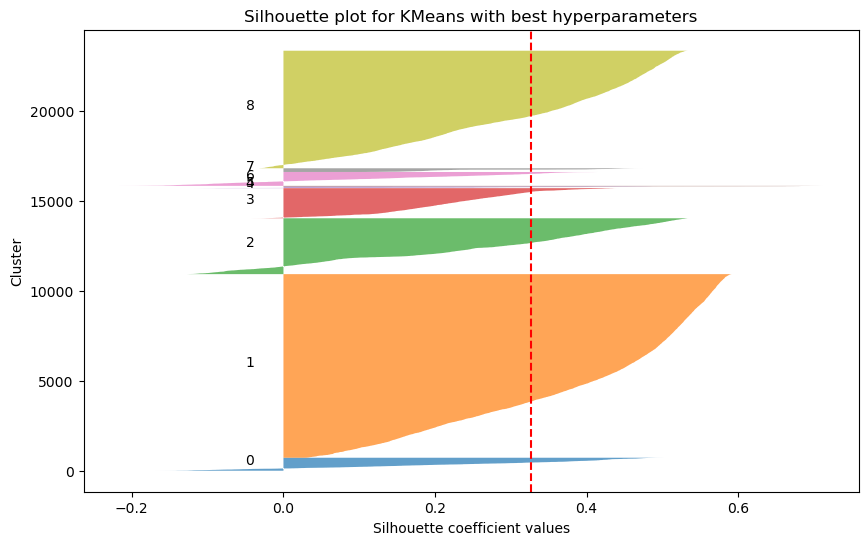

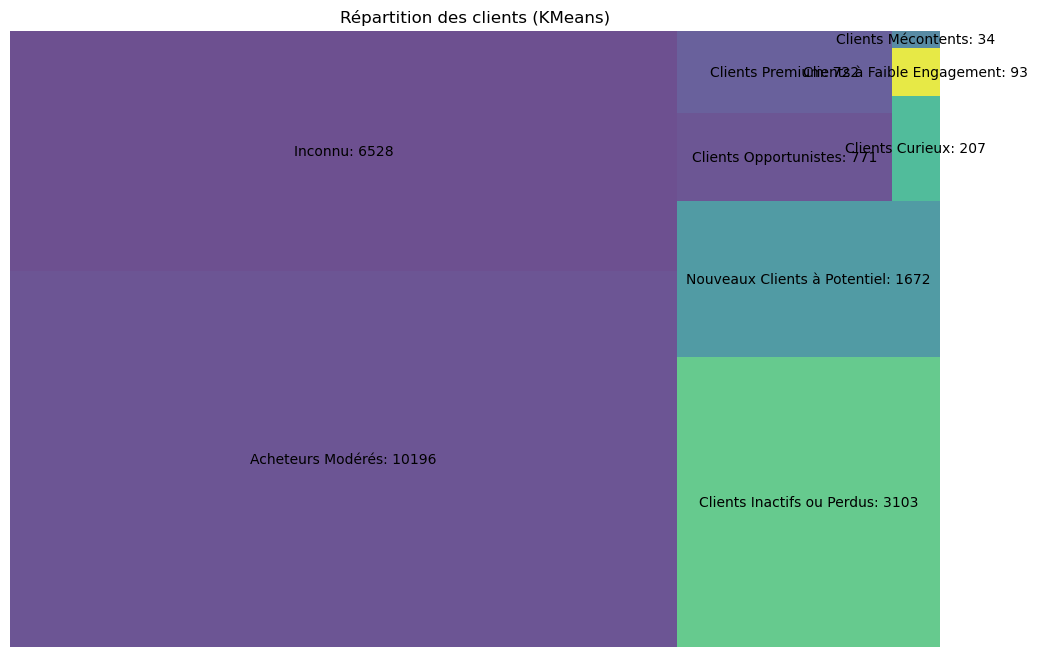

Simulation pour le mois 1
Indice de Rand ajusté : 1.0
Simulation pour le mois 2
Indice de Rand ajusté : 1.0
Simulation pour le mois 3
Indice de Rand ajusté : 1.0
Simulation pour le mois 4
Indice de Rand ajusté : 1.0
Simulation pour le mois 5
Indice de Rand ajusté : 1.0
Simulation pour le mois 6
Indice de Rand ajusté : 1.0
Simulation pour le mois 7
Indice de Rand ajusté : 1.0
Simulation pour le mois 8
Indice de Rand ajusté : 1.0
Simulation pour le mois 9
Indice de Rand ajusté : 1.0
Simulation pour le mois 10
Indice de Rand ajusté : 1.0
Simulation pour le mois 11
Indice de Rand ajusté : 1.0
Simulation pour le mois 12
Indice de Rand ajusté : 1.0
Simulation pour le mois 13
Indice de Rand ajusté : 1.0
Simulation pour le mois 14
Indice de Rand ajusté : 1.0
Simulation pour le mois 15
Indice de Rand ajusté : 1.0
Simulation pour le mois 16
Indice de Rand ajusté : 1.0
Simulation pour le mois 17
Indice de Rand ajusté : 1.0
Simulation pour le mois 18
Indice de Rand ajusté : 1.0
Simulation pour le 

In [186]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import squarify
from sklearn.metrics import adjusted_rand_score

# Assurez-vous que 'order_purchase_timestamp' et 'order_delivered_customer_date' sont au format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# 1. Date de la première commande dans le dataset
first_order_date = orders['order_purchase_timestamp'].min()
print(f"Date de la première commande : {first_order_date}")

# 2. Filtrer les commandes dans une période d'un an à partir de la première commande
one_year_later = first_order_date + pd.DateOffset(years=1)
filtered_orders = orders[
    (orders['order_purchase_timestamp'] >= first_order_date) &
    (orders['order_purchase_timestamp'] < one_year_later)
]

# Vérifier le nombre de commandes filtrées
print(f"Nombre de commandes dans la période d'un an : {filtered_orders.shape[0]}")

# Afficher la date de la dernière commande dans la période filtrée
last_order_date_in_period = filtered_orders['order_purchase_timestamp'].max()
print(f"Date de la dernière commande dans la période d'un an : {last_order_date_in_period}")

# Récence : Calculer le nombre de jours depuis la dernière commande pour chaque client
recency_df = filtered_orders.groupby('customer_id').agg(
    last_purchase=('order_purchase_timestamp', 'max')
).reset_index()
recency_df['recency'] = (one_year_later - recency_df['last_purchase']).dt.days

# Montant : Calculer le montant total dépensé par client à partir de la table order_items (prix * quantité)
monetary_df = order_items.groupby('order_id').agg(order_value=('price', 'sum')).reset_index()
monetary_df = pd.merge(filtered_orders[['order_id', 'customer_id']], monetary_df, on='order_id')
monetary_df = monetary_df.groupby('customer_id').agg(monetary=('order_value', 'sum')).reset_index()

# Score des avis : Calculer le score moyen des avis par client
review_score_df = order_reviews.groupby('order_id').agg(avg_review_score=('review_score', 'mean')).reset_index()
review_score_df = pd.merge(filtered_orders[['order_id', 'customer_id']], review_score_df, on='order_id')
review_score_df = review_score_df.groupby('customer_id').agg(avg_review_score=('avg_review_score', 'mean')).reset_index()

# Délai de livraison : Calculer le délai de livraison moyen par client (en excluant les valeurs manquantes)
delivery_delay_df = filtered_orders.copy()
delivery_delay_df['delivery_delay'] = (
    filtered_orders['order_delivered_customer_date'] - 
    filtered_orders['order_purchase_timestamp']
).dt.days
delivery_delay_df = delivery_delay_df[~delivery_delay_df['delivery_delay'].isna()]  # Supprimer les valeurs manquantes
delivery_delay_df = delivery_delay_df.groupby('customer_id').agg(
    avg_delivery_delay=('delivery_delay', 'mean')
).reset_index()

# Nombre d'articles : Calculer le nombre total d'articles commandés par client
items_df = order_items.groupby('order_id').agg(total_items=('order_item_id', 'count')).reset_index()
items_df = pd.merge(filtered_orders[['order_id', 'customer_id']], items_df, on='order_id')
items_df = items_df.groupby('customer_id').agg(total_items=('total_items', 'sum')).reset_index()

# Fusionner les variables RFM et les nouvelles variables en une seule table
rfm_df = pd.merge(recency_df[['customer_id', 'recency']], monetary_df, on='customer_id')
rfm_df = pd.merge(rfm_df, review_score_df, on='customer_id')
rfm_df = pd.merge(rfm_df, delivery_delay_df, on='customer_id', how='left')  # Jointure gauche pour conserver tous les clients
rfm_df = pd.merge(rfm_df, items_df, on='customer_id')

# Exemple de jeu de données RFM
X = rfm_df[['recency', 'monetary', 'avg_review_score', 'avg_delivery_delay', 'total_items']]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Imputation des NaN avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Paramètres de la grille KMeans
param_grid_kmeans = {
    'n_clusters': [5, 6, 7, 8, 9, 10],
    'init': ['k-means++', 'random'],
    'n_init': [3, 2, 5],
    'max_iter': [300, 325],
    'tol': [1e-4, 1e-3],
    'algorithm': ['lloyd', 'elkan']
}

# Pour stocker les résultats
best_kmeans_score_overall = -1
best_kmeans_labels_overall = None

# Exécuter plusieurs fois pour trouver les meilleurs paramètres KMeans
for run in range(5):
    best_kmeans_score = -1
    best_kmeans_params = None
    best_kmeans_labels = None
    for params in ParameterGrid(param_grid_kmeans):
        kmeans = KMeans(
            n_clusters=params['n_clusters'],
            init=params['init'],
            n_init=params['n_init'],
            max_iter=params['max_iter'],
            tol=params['tol'],
            algorithm=params['algorithm'],
            random_state=10 + run  # Changement de seed pour chaque exécution
        )
        cluster_labels = kmeans.fit_predict(X_scaled_imputed)
        silhouette_avg = silhouette_score(X_scaled_imputed, cluster_labels)

        if silhouette_avg > best_kmeans_score:
            best_kmeans_score = silhouette_avg
            best_kmeans_params = params
            best_kmeans_labels = cluster_labels

    # Garder le meilleur score global
    if best_kmeans_score > best_kmeans_score_overall:
        best_kmeans_score_overall = best_kmeans_score
        best_kmeans_labels_overall = best_kmeans_labels

# Affichage du meilleur score silhouette pour KMeans après 5 exécutions
print("Meilleurs paramètres KMeans après 5 runs:", best_kmeans_params)
print("Meilleur score silhouette KMeans:", best_kmeans_score_overall)

# Ajout des labels KMeans dans le DataFrame
rfm_df['KMeans_Cluster'] = best_kmeans_labels_overall

# Tracé du score de silhouette pour les meilleurs hyperparamètres
def plot_silhouette(X, labels, model_name):
    silhouette_vals = silhouette_samples(X, labels)
    avg_silhouette = np.mean(silhouette_vals)

    plt.figure(figsize=(10, 6))
    y_lower, y_upper = 0, 0
    for i in np.unique(labels):
        ith_silhouette_vals = silhouette_vals[labels == i]
        ith_silhouette_vals.sort()
        y_upper += len(ith_silhouette_vals)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_silhouette_vals, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * len(ith_silhouette_vals), str(i))
        y_lower = y_upper
    plt.axvline(avg_silhouette, color="red", linestyle="--")
    plt.title(f"Silhouette plot for KMeans with best hyperparameters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster")
    plt.show()

# Tracer le score de silhouette pour le meilleur modèle KMeans
plot_silhouette(X_scaled_imputed, best_kmeans_labels_overall, "KMeans")

# ----------------------------- Treemap pour KMeans -----------------------------
# Segments personnalisés
segments = {
    0: "Clients Premium",
    1: "Acheteurs Modérés",
    2: "Clients Inactifs ou Perdus",
    3: "Nouveaux Clients à Potentiel",
    4: "Clients à Faible Engagement",
    5: "Clients Mécontents",
    6: "Clients Opportunistes",
    7: "Clients Curieux"
}

def create_treemap(df, cluster_column, title):
    segment_counts = df[cluster_column].value_counts()
    sizes = segment_counts.values
    labels = [f"{segments.get(i, 'Inconnu')}: {sizes[idx]}" for idx, i in enumerate(segment_counts.index)]

    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=sizes, label=labels, alpha=.8)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Treemap pour KMeans
create_treemap(rfm_df, 'KMeans_Cluster', 'Répartition des clients (KMeans)')

# Définir le nombre de mois à simuler
N_months = 12
reference_data = X_scaled_imputed

# Simulation de périodes mensuelles croissantes
for i in range(1, 13):
    future_orders = orders[orders['order_purchase_timestamp'].dt.month <= i]
    
    # Si nous avons assez de données pour effectuer la segmentation
    if not future_orders.empty:
        future_recency_df = future_orders.groupby('customer_id').agg(
            last_purchase=('order_purchase_timestamp', 'max')
        ).reset_index()
        future_recency_df['recency'] = (one_year_later - future_recency_df['last_purchase']).dt.days

        future_monetary_df = order_items.groupby('order_id').agg(order_value=('price', 'sum')).reset_index()
        future_monetary_df = pd.merge(future_orders[['order_id', 'customer_id']], future_monetary_df, on='order_id')
        future_monetary_df = future_monetary_df.groupby('customer_id').agg(monetary=('order_value', 'sum')).reset_index()

        future_review_score_df = order_reviews.groupby('order_id').agg(avg_review_score=('review_score', 'mean')).reset_index()
        future_review_score_df = pd.merge(future_orders[['order_id', 'customer_id']], future_review_score_df, on='order_id')
        future_review_score_df = future_review_score_df.groupby('customer_id').agg(avg_review_score=('avg_review_score', 'mean')).reset_index()

        future_delivery_delay_df = future_orders.copy()
        future_delivery_delay_df['delivery_delay'] = (
            future_orders['order_delivered_customer_date'] - 
            future_orders['order_purchase_timestamp']
        ).dt.days
        future_delivery_delay_df = future_delivery_delay_df[~future_delivery_delay_df['delivery_delay'].isna()] 
        future_delivery_delay_df = future_delivery_delay_df.groupby('customer_id').agg(
            avg_delivery_delay=('delivery_delay', 'mean')
        ).reset_index()

        future_items_df = order_items.groupby('order_id').agg(total_items=('order_item_id', 'count')).reset_index()
        future_items_df = pd.merge(future_orders[['order_id', 'customer_id']], future_items_df, on='order_id')
        future_items_df = future_items_df.groupby('customer_id').agg(total_items=('total_items', 'sum')).reset_index()

        future_rfm_df = pd.merge(future_recency_df[['customer_id', 'recency']], future_monetary_df, on='customer_id')
        future_rfm_df = pd.merge(future_rfm_df, future_review_score_df, on='customer_id')
        future_rfm_df = pd.merge(future_rfm_df, future_delivery_delay_df, on='customer_id', how='left')  
        future_rfm_df = pd.merge(future_rfm_df, future_items_df, on='customer_id')

        # Standardisation
        future_X = future_rfm_df[['recency', 'monetary', 'avg_review_score', 'avg_delivery_delay', 'total_items']]
        future_X_scaled = scaler.transform(future_X)
        future_X_scaled_imputed = imputer.transform(future_X_scaled)

        # Application du modèle KMeans
        future_kmeans_labels = kmeans.predict(future_X_scaled_imputed)
        future_rfm_df['Future_KMeans_Cluster'] = future_kmeans_labels

        # Comparer les segmentations avec l'indice de Rand ajusté
        adjusted_rand_index = adjusted_rand_score(best_kmeans_labels_overall, future_kmeans_labels)
        print(f"Adjusted Rand Index pour {i} mois : {adjusted_rand_index}")


Date de la première commande : 2016-09-04 21:15:19
Nombre de commandes dans la période d'un an : 23810
Date de la dernière commande dans la période d'un an : 2017-09-04 21:13:36


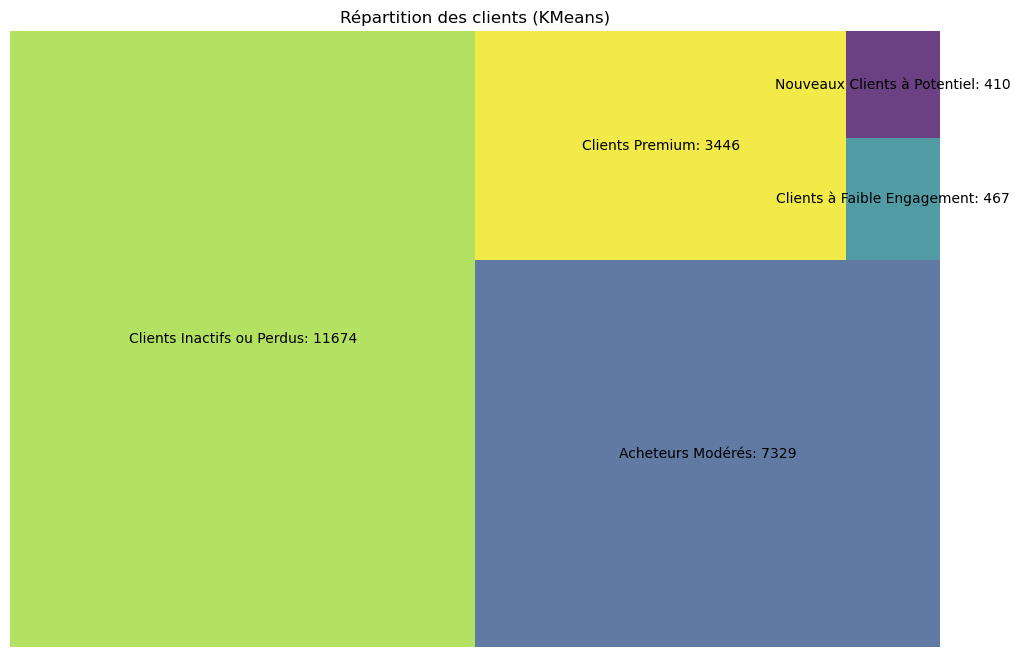

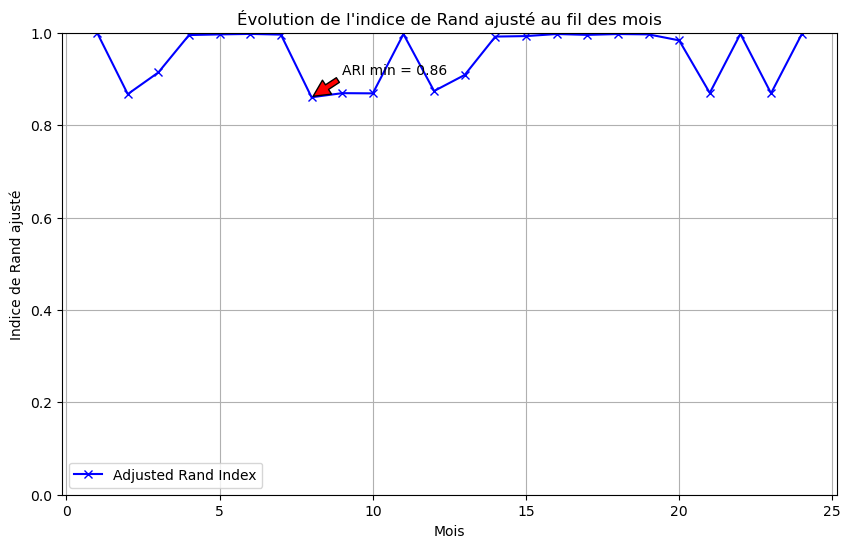

+----+------+--------------------+
|    | Mois |        ARI         |
+----+------+--------------------+
| 0  | 1.0  |        1.0         |
| 1  | 2.0  | 0.8671362386696008 |
| 2  | 3.0  | 0.9140955673970822 |
| 3  | 4.0  | 0.9949750670417309 |
| 4  | 5.0  | 0.9963757650472039 |
| 5  | 6.0  | 0.9974014210777812 |
| 6  | 7.0  | 0.9959287676683457 |
| 7  | 8.0  | 0.8602433391504206 |
| 8  | 9.0  | 0.8691918094903038 |
| 9  | 10.0 | 0.8687509085263068 |
| 10 | 11.0 | 0.9970839458740531 |
| 11 | 12.0 | 0.8737963531302219 |
| 12 | 13.0 | 0.9086139773470996 |
| 13 | 14.0 | 0.9916455828793729 |
| 14 | 15.0 | 0.9927336444173549 |
| 15 | 16.0 | 0.9971834287356989 |
| 16 | 17.0 | 0.9953300210934233 |
| 17 | 18.0 | 0.9971299982922335 |
| 18 | 19.0 | 0.9964068263814548 |
| 19 | 20.0 | 0.9834680367141186 |
| 20 | 21.0 | 0.869612895850555  |
| 21 | 22.0 | 0.9974014210777812 |
| 22 | 23.0 | 0.8689111805363418 |
| 23 | 24.0 | 0.9966665221079526 |
+----+------+--------------------+


In [242]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import squarify
from sklearn.metrics import adjusted_rand_score
from tabulate import tabulate

# Assurez-vous que 'order_purchase_timestamp' et 'order_delivered_customer_date' sont au format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# 1. Date de la première commande dans le dataset
first_order_date = orders['order_purchase_timestamp'].min()
print(f"Date de la première commande : {first_order_date}")

# 2. Filtrer les commandes dans une période d'un an à partir de la première commande
one_year_later = first_order_date + pd.DateOffset(years=1)
filtered_orders = orders[
    (orders['order_purchase_timestamp'] >= first_order_date) &
    (orders['order_purchase_timestamp'] < one_year_later)
]

# Vérifier le nombre de commandes filtrées
print(f"Nombre de commandes dans la période d'un an : {filtered_orders.shape[0]}")

# Afficher la date de la dernière commande dans la période filtrée
last_order_date_in_period = filtered_orders['order_purchase_timestamp'].max()
print(f"Date de la dernière commande dans la période d'un an : {last_order_date_in_period}")

# Récence : Calculer le nombre de jours depuis la dernière commande pour chaque client
recency_df = filtered_orders.groupby('customer_id').agg(
    last_purchase=('order_purchase_timestamp', 'max')
).reset_index()
recency_df['recency'] = (one_year_later - recency_df['last_purchase']).dt.days

# Montant : Calculer le montant total dépensé par client à partir de la table order_items (prix * quantité)
monetary_df = order_items.groupby('order_id').agg(order_value=('price', 'sum')).reset_index()
monetary_df = pd.merge(filtered_orders[['order_id', 'customer_id']], monetary_df, on='order_id')
monetary_df = monetary_df.groupby('customer_id').agg(monetary=('order_value', 'sum')).reset_index()

# Score des avis : Calculer le score moyen des avis par client
review_score_df = order_reviews.groupby('order_id').agg(
    avg_review_score=('review_score', 'mean')
).reset_index()
review_score_df = pd.merge(filtered_orders[['order_id', 'customer_id']], review_score_df, on='order_id')
review_score_df = review_score_df.groupby('customer_id').agg(
    avg_review_score=('avg_review_score', 'mean')
).reset_index()

# Délai de livraison : Calculer le délai de livraison moyen par client (en excluant les valeurs manquantes)
delivery_delay_df = filtered_orders.copy()
delivery_delay_df['delivery_delay'] = (
    filtered_orders['order_delivered_customer_date'] - 
    filtered_orders['order_purchase_timestamp']
).dt.days
delivery_delay_df = delivery_delay_df[~delivery_delay_df['delivery_delay'].isna()]  # Supprimer les valeurs manquantes
delivery_delay_df = delivery_delay_df.groupby('customer_id').agg(
    avg_delivery_delay=('delivery_delay', 'mean')
).reset_index()

# Nombre d'articles : Calculer le nombre total d'articles commandés par client
items_df = order_items.groupby('order_id').agg(total_items=('order_item_id', 'count')).reset_index()
items_df = pd.merge(filtered_orders[['order_id', 'customer_id']], items_df, on='order_id')
items_df = items_df.groupby('customer_id').agg(total_items=('total_items', 'sum')).reset_index()

# Fusionner les variables RFM et les nouvelles variables en une seule table
rfm_df = pd.merge(recency_df[['customer_id', 'recency']], monetary_df, on='customer_id')
rfm_df = pd.merge(rfm_df, review_score_df, on='customer_id')
rfm_df = pd.merge(rfm_df, delivery_delay_df, on='customer_id', how='left')  # Jointure gauche pour conserver tous les clients
rfm_df = pd.merge(rfm_df, items_df, on='customer_id')

# Exemple de jeu de données RFM
X = rfm_df[['recency', 'monetary', 'avg_review_score', 'avg_delivery_delay', 'total_items']]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Imputation des NaN avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Paramètres de KMeans optimaux (prédéfinis ou obtenus d'une recherche précédente)
best_kmeans_params = {
    'n_clusters': 5,
    'init': 'k-means++',
    'n_init': 3,
    'max_iter': 300,
    'tol': 1e-4,
    'algorithm': 'lloyd'
}

# Clustering KMeans avec les meilleurs paramètres
kmeans = KMeans(
    n_clusters=best_kmeans_params['n_clusters'],
    init=best_kmeans_params['init'],
    n_init=best_kmeans_params['n_init'],
    max_iter=best_kmeans_params['max_iter'],
    tol=best_kmeans_params['tol'],
    algorithm=best_kmeans_params['algorithm'],
    random_state=10
)
best_kmeans_labels_overall = kmeans.fit_predict(X_scaled_imputed)

# Ajout des labels KMeans dans le DataFrame
rfm_df['KMeans_Cluster'] = best_kmeans_labels_overall

# ----------------------------- Treemap pour KMeans -----------------------------
# Segments personnalisés
segments = {
    0: "Clients Premium",
    1: "Acheteurs Modérés",
    2: "Clients Inactifs ou Perdus",
    3: "Nouveaux Clients à Potentiel",
    4: "Clients à Faible Engagement",
    5: "Clients Mécontents",
    6: "Clients Opportunistes",
    7: "Clients Curieux"
}

def create_treemap(df, cluster_column, title):
    """Créer un treemap à partir des données de clustering."""
    segment_counts = df[cluster_column].value_counts()
    sizes = segment_counts.values
    labels = [
        f"{segments.get(i, 'Inconnu')}: {sizes[idx]}" 
        for idx, i in enumerate(segment_counts.index)
    ]
    
    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=sizes, label=labels, alpha=.8)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Treemap pour KMeans
create_treemap(rfm_df, 'KMeans_Cluster', 'Répartition des clients (KMeans)')

# Simuler la stabilité du clustering au fil du temps
N_months = 24
reference_data = X_scaled_imputed.copy()
rand_scores = []

# Créer un modèle KMeans de référence C0
c0_cluster = KMeans(
    n_clusters=best_kmeans_params['n_clusters'],
    init=best_kmeans_params['init'],
    n_init=best_kmeans_params['n_init'],
    max_iter=best_kmeans_params['max_iter'],
    tol=best_kmeans_params['tol'],
    algorithm=best_kmeans_params['algorithm'],
    random_state=42
)

# Apprentissage sur la base de référence
c0_labels = c0_cluster.fit_predict(reference_data)

# Pour chaque mois futur
for month in range(1, N_months + 1):
    # Créer la base future B (ici en ajoutant du bruit pour simuler l'évolution des données)
    b_data = reference_data.copy()

    # Apprentissage du clustering sur la base future
    c_future = KMeans(
        n_clusters=best_kmeans_params['n_clusters'],
        init=best_kmeans_params['init'],
        n_init=best_kmeans_params['n_init'],
        max_iter=best_kmeans_params['max_iter'],
        tol=best_kmeans_params['tol'],
        algorithm=best_kmeans_params['algorithm'],
        random_state=42 + month
    )
    
    future_labels = c_future.fit_predict(b_data)

    # Comparer la segmentation de la base de référence avec celle de la base future
    rand_index = adjusted_rand_score(c0_labels, future_labels)
    rand_scores.append(rand_index)

# Ajout du point de référence
rand_scores = [1] + rand_scores[1:]

# Tracer l'évolution de l'indice de Rand ajusté
plt.figure(figsize=(10, 6))
plt.plot(range(1, N_months + 1), rand_scores, marker='x', color='b', label='Adjusted Rand Index')

# Limites de l'axe y entre 0 et 1
plt.ylim(0, 1)

# Ajouter des titres et des labels
plt.title('Évolution de l\'indice de Rand ajusté au fil des mois')
plt.xlabel('Mois')
plt.ylabel('Indice de Rand ajusté')
plt.grid(True)

# Trouver la valeur la plus basse de l'indice de Rand ajusté
min_ari = min(rand_scores)
print(f"Valeur la plus basse de l'indice de Rand ajusté : {min_ari:.4f}")

# Afficher le graphique
plt.legend()
plt.show()
